In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import Nanoparticle as NP
import FCCLattice as FCC
import CuttingPlaneGenerator as CPG
import CuttingPlaneOperator as CPO

from ase.visualize import view
import numpy as np
import random

In [3]:
lattice = FCC.FCCLattice(15, 15, 15, 2)

cuttingPlaneGenerator = CPG.SphericalCuttingPlaneGenerator(6., 9.)
#particle.rectangularPrism(17, 17, 17, 'Cu')


populationSize = 25
best_individuals = 5
generations = 25

crossoverCuttingPlaneGenerator = CPG.SphericalCuttingPlaneGenerator(0., 3.)
cuttingPlaneOperator = CPO.CuttingPlaneOperator(crossoverCuttingPlaneGenerator)

population = list()
for i in range(populationSize):
    particle = NP.Nanoparticle(lattice)
    particle.convexShape([100, 100], ['Ag', 'Cu'], 9, 9, 9, cuttingPlaneGenerator)
    population.append(particle)
    
lowest_energies = list()

for gen in range(generations):
    print("gen", gen)
    energies = [p.getPotentialEnergyPerAtom() for p in population]

    zippedPopulation = list(zip(energies, population))
    zippedPopulation.sort(key=lambda x: x[0])
    
    energies, population = zip(*zippedPopulation)
    population = list(population)
    population = population[:best_individuals]
    lowest_energies.append(energies[0])
    best_individual = population[0]
    print(energies)
    
    newPopulation = list()  
    #make sure every particle gets selected at least once
    for i in range(best_individuals):
        particle1 = population[i]
        particle2 = population[random.randrange(best_individuals)]
        
        
        particle = cuttingPlaneOperator.cutAndReassembleNanoparticles(particle1, particle2)
        newPopulation.append(particle)
        
    while len(newPopulation) < populationSize:
        particle1 = population[random.randrange(best_individuals)]
        particle2 = population[random.randrange(best_individuals)]
        
        particle = cuttingPlaneOperator.cutAndReassembleNanoparticles(particle1, particle2)
        newPopulation.append(particle)
        
    population.clear()    
    population = newPopulation
    
view(best_individual.getASEAtoms(), viewer="x3d")
        
    

gen 0
      Step     Time          Energy         fmax
BFGS:    0 03:45:45       87.904633        1.8607
BFGS:    1 03:45:45       86.026893        1.8198
BFGS:    2 03:45:45       83.420217        1.7321
BFGS:    3 03:45:45       81.053135        1.6081
BFGS:    4 03:45:46       78.918864        1.4429
BFGS:    5 03:45:46       77.014011        1.2352
BFGS:    6 03:45:46       75.337460        1.0586
BFGS:    7 03:45:46       73.889320        0.9541
BFGS:    8 03:45:47       72.668127        0.8384
BFGS:    9 03:45:47       71.731844        1.0747
BFGS:   10 03:45:47       70.998082        1.2349
BFGS:   11 03:45:47       70.366790        1.3000
BFGS:   12 03:45:48       69.761276        1.2679
BFGS:   13 03:45:48       69.139016        1.1473
BFGS:   14 03:45:48       68.484416        1.1376
BFGS:   15 03:45:49       67.815159        1.1085
BFGS:   16 03:45:49       67.189208        0.9979
BFGS:   17 03:45:49       66.639719        0.8228
BFGS:   18 03:45:49       66.164502        0.

BFGS:   92 03:46:32       61.225434        0.2049
BFGS:   93 03:46:32       61.218723        0.1894
BFGS:   94 03:46:32       61.212383        0.1596
BFGS:   95 03:46:32       61.205218        0.1213
BFGS:   96 03:46:33       61.197343        0.0840
BFGS:   97 03:46:33       61.190790        0.0844
BFGS:   98 03:46:33       61.185970        0.0836
BFGS:   99 03:46:34       61.181535        0.0789
BFGS:  100 03:46:34       61.176311        0.0806
      Step     Time          Energy         fmax
BFGS:    0 03:46:34       88.338490        1.8584
BFGS:    1 03:46:34       86.481504        1.7860
BFGS:    2 03:46:35       83.835028        1.6677
BFGS:    3 03:46:35       81.369776        1.5696
BFGS:    4 03:46:35       79.143501        1.4435
BFGS:    5 03:46:36       77.168072        1.3168
BFGS:    6 03:46:36       75.442926        1.1798
BFGS:    7 03:46:36       73.965382        1.0116
BFGS:    8 03:46:37       72.744558        0.8127
BFGS:    9 03:46:37       71.743232        0.8464
B

BFGS:   60 03:47:18       62.443117        0.0449
      Step     Time          Energy         fmax
BFGS:    0 03:47:18       87.297906        1.6406
BFGS:    1 03:47:18       85.546719        1.6170
BFGS:    2 03:47:18       82.814091        1.5683
BFGS:    3 03:47:19       80.380461        1.5029
BFGS:    4 03:47:19       78.241934        1.4182
BFGS:    5 03:47:19       76.390350        1.3117
BFGS:    6 03:47:19       74.810495        1.1811
BFGS:    7 03:47:20       73.478951        1.0239
BFGS:    8 03:47:20       72.364173        0.9263
BFGS:    9 03:47:20       71.427777        1.0796
BFGS:   10 03:47:21       70.626376        1.1854
BFGS:   11 03:47:21       69.913291        1.2229
BFGS:   12 03:47:21       69.241721        1.1769
BFGS:   13 03:47:21       68.570165        1.1563
BFGS:   14 03:47:22       67.885132        1.2243
BFGS:   15 03:47:22       67.238933        1.1948
BFGS:   16 03:47:22       66.604204        1.0776
BFGS:   17 03:47:22       66.004369        0.8954
B

BFGS:   60 03:48:05       61.238865        0.0695
BFGS:   61 03:48:05       61.228936        0.1351
BFGS:   62 03:48:05       61.220760        0.1724
BFGS:   63 03:48:05       61.214033        0.1360
BFGS:   64 03:48:06       61.206713        0.0853
BFGS:   65 03:48:06       61.198273        0.0675
BFGS:   66 03:48:06       61.190787        0.1320
BFGS:   67 03:48:07       61.185524        0.1204
BFGS:   68 03:48:07       61.181017        0.0820
BFGS:   69 03:48:07       61.175559        0.0768
BFGS:   70 03:48:07       61.169647        0.1142
BFGS:   71 03:48:08       61.164896        0.1397
BFGS:   72 03:48:08       61.161418        0.1046
BFGS:   73 03:48:08       61.158092        0.0538
BFGS:   74 03:48:09       61.154368        0.0522
BFGS:   75 03:48:09       61.150951        0.1040
BFGS:   76 03:48:09       61.148352        0.1028
BFGS:   77 03:48:09       61.146044        0.0659
BFGS:   78 03:48:10       61.143394        0.0416
      Step     Time          Energy         fmax
B

BFGS:   66 03:48:52       62.320652        0.1027
BFGS:   67 03:48:53       62.308673        0.1291
BFGS:   68 03:48:53       62.300067        0.1232
BFGS:   69 03:48:53       62.291872        0.0888
BFGS:   70 03:48:53       62.282687        0.0989
BFGS:   71 03:48:54       62.272233        0.0793
BFGS:   72 03:48:54       62.263949        0.0837
BFGS:   73 03:48:54       62.257011        0.0883
BFGS:   74 03:48:55       62.251573        0.0762
BFGS:   75 03:48:55       62.241582        0.0789
BFGS:   76 03:48:55       62.233410        0.0902
BFGS:   77 03:48:55       62.226849        0.0890
BFGS:   78 03:48:56       62.221058        0.0890
BFGS:   79 03:48:56       62.213392        0.0825
BFGS:   80 03:48:56       62.204932        0.0841
BFGS:   81 03:48:56       62.197990        0.0984
BFGS:   82 03:48:57       62.192850        0.1006
BFGS:   83 03:48:57       62.187578        0.0778
BFGS:   84 03:48:57       62.181029        0.0767
BFGS:   85 03:48:58       62.174480        0.0930


BFGS:   26 03:49:38       62.415464        0.4566
BFGS:   27 03:49:39       62.231414        0.5926
BFGS:   28 03:49:39       62.086953        0.5384
BFGS:   29 03:49:39       61.942633        0.3128
BFGS:   30 03:49:40       61.809907        0.2540
BFGS:   31 03:49:40       61.682211        0.2907
BFGS:   32 03:49:40       61.571589        0.3829
BFGS:   33 03:49:40       61.488680        0.3939
BFGS:   34 03:49:41       61.412411        0.3428
BFGS:   35 03:49:41       61.321874        0.2454
BFGS:   36 03:49:41       61.245773        0.2205
BFGS:   37 03:49:41       61.181069        0.2718
BFGS:   38 03:49:42       61.127870        0.2731
BFGS:   39 03:49:42       61.083164        0.2033
BFGS:   40 03:49:42       61.019534        0.1510
BFGS:   41 03:49:43       60.969446        0.1881
BFGS:   42 03:49:43       60.932860        0.1973
BFGS:   43 03:49:43       60.904620        0.1657
BFGS:   44 03:49:43       60.869728        0.1296
BFGS:   45 03:49:44       60.832278        0.1276


BFGS:   32 03:50:25       62.923718        0.3086
BFGS:   33 03:50:25       62.859347        0.2921
BFGS:   34 03:50:26       62.793160        0.2310
BFGS:   35 03:50:26       62.739195        0.3532
BFGS:   36 03:50:26       62.697973        0.3342
BFGS:   37 03:50:26       62.659568        0.1994
BFGS:   38 03:50:27       62.618780        0.1201
BFGS:   39 03:50:27       62.580905        0.1871
BFGS:   40 03:50:27       62.554820        0.2193
BFGS:   41 03:50:28       62.536957        0.1564
BFGS:   42 03:50:28       62.518257        0.1024
BFGS:   43 03:50:28       62.497543        0.0881
BFGS:   44 03:50:29       62.481264        0.1373
BFGS:   45 03:50:29       62.470521        0.1115
BFGS:   46 03:50:29       62.461054        0.0900
BFGS:   47 03:50:30       62.449532        0.0737
BFGS:   48 03:50:30       62.437324        0.1222
BFGS:   49 03:50:30       62.427725        0.1282
BFGS:   50 03:50:30       62.420376        0.0856
BFGS:   51 03:50:31       62.412417        0.0710


BFGS:   13 03:51:12       68.602986        1.1491
BFGS:   14 03:51:13       67.971892        0.9965
BFGS:   15 03:51:13       67.368262        0.9262
BFGS:   16 03:51:13       66.780555        0.9022
BFGS:   17 03:51:13       66.224145        0.8200
BFGS:   18 03:51:14       65.702447        0.7440
BFGS:   19 03:51:14       65.219130        0.7831
BFGS:   20 03:51:14       64.820959        0.7270
BFGS:   21 03:51:15       64.489996        0.7062
BFGS:   22 03:51:15       64.207302        0.5773
BFGS:   23 03:51:15       63.937682        0.4137
BFGS:   24 03:51:15       63.714151        0.3802
BFGS:   25 03:51:16       63.561041        0.5207
BFGS:   26 03:51:16       63.446518        0.4352
BFGS:   27 03:51:16       63.342399        0.2903
BFGS:   28 03:51:17       63.245355        0.2763
BFGS:   29 03:51:17       63.153242        0.3530
BFGS:   30 03:51:17       63.074987        0.3884
BFGS:   31 03:51:17       63.017950        0.2656
BFGS:   32 03:51:18       62.971930        0.1596


BFGS:   21 03:51:59       64.550259        0.5732
BFGS:   22 03:51:59       64.133629        0.5733
BFGS:   23 03:52:00       63.794896        0.5585
BFGS:   24 03:52:00       63.512804        0.5027
BFGS:   25 03:52:00       63.244439        0.4325
BFGS:   26 03:52:01       63.000831        0.3145
BFGS:   27 03:52:01       62.844971        0.3970
BFGS:   28 03:52:01       62.723597        0.4322
BFGS:   29 03:52:01       62.608322        0.3329
BFGS:   30 03:52:02       62.493105        0.2640
BFGS:   31 03:52:02       62.376821        0.2489
BFGS:   32 03:52:02       62.268150        0.2679
BFGS:   33 03:52:03       62.194804        0.2716
BFGS:   34 03:52:03       62.130062        0.2383
BFGS:   35 03:52:03       62.056532        0.2104
BFGS:   36 03:52:03       61.983941        0.1969
BFGS:   37 03:52:04       61.929731        0.2417
BFGS:   38 03:52:04       61.891592        0.1860
BFGS:   39 03:52:04       61.853429        0.1339
BFGS:   40 03:52:05       61.812211        0.1280


BFGS:   92 03:52:46       61.429516        0.0770
BFGS:   93 03:52:46       61.425449        0.0761
BFGS:   94 03:52:47       61.421703        0.0598
BFGS:   95 03:52:47       61.416834        0.0635
BFGS:   96 03:52:47       61.411041        0.0651
BFGS:   97 03:52:47       61.406114        0.0759
BFGS:   98 03:52:48       61.402615        0.0659
BFGS:   99 03:52:48       61.399324        0.0511
BFGS:  100 03:52:48       61.395154        0.0594
      Step     Time          Energy         fmax
BFGS:    0 03:52:48       88.745747        2.0465
BFGS:    1 03:52:49       87.083300        2.0285
BFGS:    2 03:52:49       84.985446        1.9839
BFGS:    3 03:52:49       83.068310        1.9124
BFGS:    4 03:52:50       81.319806        1.8098
BFGS:    5 03:52:50       79.728301        1.6721
BFGS:    6 03:52:50       78.282429        1.4967
BFGS:    7 03:52:50       76.971021        1.2818
BFGS:    8 03:52:51       75.782806        1.0757
BFGS:    9 03:52:51       74.706326        0.9478
B

BFGS:   52 03:53:31       63.193300        0.0907
BFGS:   53 03:53:32       63.181698        0.1463
BFGS:   54 03:53:32       63.171904        0.1690
BFGS:   55 03:53:32       63.162921        0.1312
BFGS:   56 03:53:32       63.152692        0.0825
BFGS:   57 03:53:33       63.141741        0.0817
BFGS:   58 03:53:33       63.132772        0.1265
BFGS:   59 03:53:33       63.126046        0.1166
BFGS:   60 03:53:34       63.119162        0.0819
BFGS:   61 03:53:34       63.110584        0.0775
BFGS:   62 03:53:34       63.101929        0.1149
BFGS:   63 03:53:34       63.095051        0.1391
BFGS:   64 03:53:35       63.089126        0.1095
BFGS:   65 03:53:35       63.082195        0.0820
BFGS:   66 03:53:35       63.073905        0.0695
BFGS:   67 03:53:36       63.066079        0.1322
BFGS:   68 03:53:36       63.059713        0.1356
BFGS:   69 03:53:36       63.053576        0.0919
BFGS:   70 03:53:36       63.046405        0.0612
BFGS:   71 03:53:37       63.039194        0.0851


BFGS:   30 03:54:18       64.448644        0.3713
BFGS:   31 03:54:18       64.378313        0.3852
BFGS:   32 03:54:19       64.296322        0.3215
BFGS:   33 03:54:19       64.213216        0.2433
BFGS:   34 03:54:19       64.144682        0.3534
BFGS:   35 03:54:20       64.086537        0.3549
BFGS:   36 03:54:20       64.037640        0.2622
BFGS:   37 03:54:20       63.986506        0.1800
BFGS:   38 03:54:20       63.928353        0.2288
BFGS:   39 03:54:21       63.886687        0.3130
BFGS:   40 03:54:21       63.858073        0.2557
BFGS:   41 03:54:21       63.831387        0.1410
BFGS:   42 03:54:22       63.798687        0.1203
BFGS:   43 03:54:22       63.768651        0.2416
BFGS:   44 03:54:22       63.745974        0.2742
BFGS:   45 03:54:22       63.726522        0.1949
BFGS:   46 03:54:23       63.704852        0.1237
BFGS:   47 03:54:23       63.681579        0.1447
BFGS:   48 03:54:23       63.661689        0.2388
BFGS:   49 03:54:24       63.645797        0.2213


BFGS:   17 03:55:04       67.255032        0.8149
BFGS:   18 03:55:04       66.728639        0.7446
BFGS:   19 03:55:05       66.210144        0.6360
BFGS:   20 03:55:05       65.711095        0.5567
BFGS:   21 03:55:05       65.249727        0.7161
BFGS:   22 03:55:05       64.885912        0.8199
BFGS:   23 03:55:06       64.589422        0.7826
BFGS:   24 03:55:06       64.342316        0.5721
BFGS:   25 03:55:06       64.074967        0.4420
BFGS:   26 03:55:07       63.832098        0.3674
BFGS:   27 03:55:07       63.667922        0.4898
BFGS:   28 03:55:07       63.546118        0.5231
BFGS:   29 03:55:07       63.439022        0.3440
BFGS:   30 03:55:08       63.346086        0.2468
BFGS:   31 03:55:08       63.265691        0.2489
BFGS:   32 03:55:08       63.187592        0.3777
BFGS:   33 03:55:09       63.123649        0.3301
BFGS:   34 03:55:09       63.078308        0.1698
BFGS:   35 03:55:09       63.035609        0.1574
BFGS:   36 03:55:09       62.987209        0.2985


BFGS:   36 03:55:50       62.364208        0.2477
BFGS:   37 03:55:50       62.325761        0.3037
BFGS:   38 03:55:50       62.296213        0.2386
BFGS:   39 03:55:51       62.270956        0.1601
BFGS:   40 03:55:51       62.244142        0.1112
BFGS:   41 03:55:51       62.217106        0.2169
BFGS:   42 03:55:52       62.196385        0.2309
BFGS:   43 03:55:52       62.181209        0.1646
BFGS:   44 03:55:52       62.165524        0.1187
BFGS:   45 03:55:52       62.147690        0.0921
BFGS:   46 03:55:53       62.131877        0.1685
BFGS:   47 03:55:53       62.119998        0.1593
BFGS:   48 03:55:53       62.109650        0.1237
BFGS:   49 03:55:54       62.098237        0.0933
BFGS:   50 03:55:54       62.086509        0.1398
BFGS:   51 03:55:54       62.076962        0.1744
BFGS:   52 03:55:54       62.069126        0.1442
BFGS:   53 03:55:55       62.060467        0.0887
BFGS:   54 03:55:55       62.050566        0.0854
BFGS:   55 03:55:55       62.041749        0.1102


BFGS:   45 03:56:43       60.623530        0.1138
BFGS:   46 03:56:44       60.602285        0.1682
BFGS:   47 03:56:44       60.588363        0.1627
BFGS:   48 03:56:44       60.576713        0.1064
BFGS:   49 03:56:44       60.562991        0.0983
BFGS:   50 03:56:45       60.548629        0.1013
BFGS:   51 03:56:45       60.537707        0.1233
BFGS:   52 03:56:45       60.529798        0.0977
BFGS:   53 03:56:46       60.521639        0.0959
BFGS:   54 03:56:46       60.512346        0.0631
BFGS:   55 03:56:46       60.504460        0.0988
BFGS:   56 03:56:47       60.499048        0.0950
BFGS:   57 03:56:47       60.494387        0.0720
BFGS:   58 03:56:47       60.488737        0.0680
BFGS:   59 03:56:48       60.482749        0.0846
BFGS:   60 03:56:48       60.478086        0.0930
BFGS:   61 03:56:48       60.474629        0.0658
BFGS:   62 03:56:49       60.470991        0.0633
BFGS:   63 03:56:49       60.466613        0.0677
BFGS:   64 03:56:49       60.462423        0.0949


BFGS:    5 03:57:30       72.506367        1.1149
BFGS:    6 03:57:30       71.044397        0.9441
BFGS:    7 03:57:30       69.768228        0.8089
BFGS:    8 03:57:30       68.656742        0.8967
BFGS:    9 03:57:31       67.693469        1.0613
BFGS:   10 03:57:31       66.867983        1.1910
BFGS:   11 03:57:31       66.128464        1.2619
BFGS:   12 03:57:31       65.421236        1.3379
BFGS:   13 03:57:32       64.706660        1.4214
BFGS:   14 03:57:32       63.979011        1.3941
BFGS:   15 03:57:32       63.317280        1.2774
BFGS:   16 03:57:33       62.705985        1.1054
BFGS:   17 03:57:33       62.132968        0.9269
BFGS:   18 03:57:33       61.598098        0.7278
BFGS:   19 03:57:33       61.106368        0.6264
BFGS:   20 03:57:34       60.665190        0.5445
BFGS:   21 03:57:34       60.282364        0.4907
BFGS:   22 03:57:34       59.963017        0.5642
BFGS:   23 03:57:35       59.752811        0.4944
BFGS:   24 03:57:35       59.544922        0.4579


BFGS:   96 03:58:16       60.029336        0.0821
BFGS:   97 03:58:16       60.023348        0.0763
BFGS:   98 03:58:17       60.020803        0.0776
BFGS:   99 03:58:17       60.014369        0.0592
BFGS:  100 03:58:17       60.009672        0.0612
      Step     Time          Energy         fmax
BFGS:    0 03:58:17       84.878072        1.6124
BFGS:    1 03:58:18       83.159239        1.5834
BFGS:    2 03:58:18       80.412630        1.5202
BFGS:    3 03:58:18       77.943444        1.4384
BFGS:    4 03:58:19       75.749401        1.3353
BFGS:    5 03:58:19       73.828019        1.2088
BFGS:    6 03:58:19       72.173573        1.0615
BFGS:    7 03:58:20       70.774499        0.9284
BFGS:    8 03:58:20       69.610816        0.9099
BFGS:    9 03:58:20       68.669196        1.1115
BFGS:   10 03:58:20       67.904885        1.2336
BFGS:   11 03:58:21       67.251263        1.2594
BFGS:   12 03:58:21       66.640911        1.1865
BFGS:   13 03:58:21       66.023595        1.0271
B

BFGS:   24 03:59:04       61.704620        0.4991
BFGS:   25 03:59:04       61.478345        0.5089
BFGS:   26 03:59:05       61.242165        0.4475
BFGS:   27 03:59:05       61.050406        0.4989
BFGS:   28 03:59:05       60.903137        0.5487
BFGS:   29 03:59:06       60.771318        0.4864
BFGS:   30 03:59:06       60.650470        0.4154
BFGS:   31 03:59:06       60.531466        0.3774
BFGS:   32 03:59:06       60.410345        0.3419
BFGS:   33 03:59:07       60.308467        0.3594
BFGS:   34 03:59:07       60.228089        0.2880
BFGS:   35 03:59:07       60.143106        0.2553
BFGS:   36 03:59:08       60.046657        0.2079
BFGS:   37 03:59:08       59.967189        0.2795
BFGS:   38 03:59:08       59.906298        0.2508
BFGS:   39 03:59:08       59.859422        0.1725
BFGS:   40 03:59:09       59.806961        0.1582
BFGS:   41 03:59:09       59.756073        0.2158
BFGS:   42 03:59:09       59.714664        0.2529
BFGS:   43 03:59:10       59.685189        0.1881


BFGS:   15 03:59:50       66.696765        1.1019
BFGS:   16 03:59:51       65.973780        1.0289
BFGS:   17 03:59:51       65.304651        0.9700
BFGS:   18 03:59:51       64.697550        0.8687
BFGS:   19 03:59:52       64.141613        0.7148
BFGS:   20 03:59:52       63.633969        0.5853
BFGS:   21 03:59:52       63.179189        0.5983
BFGS:   22 03:59:52       62.784959        0.6216
BFGS:   23 03:59:53       62.438661        0.5574
BFGS:   24 03:59:53       62.173385        0.5076
BFGS:   25 03:59:53       61.891915        0.4084
BFGS:   26 03:59:54       61.621245        0.3976
BFGS:   27 03:59:54       61.438938        0.4414
BFGS:   28 03:59:54       61.314861        0.4283
BFGS:   29 03:59:54       61.203141        0.3138
BFGS:   30 03:59:55       61.097160        0.2808
BFGS:   31 03:59:55       60.991391        0.2976
BFGS:   32 03:59:55       60.903002        0.4015
BFGS:   33 03:59:56       60.841455        0.4230
BFGS:   34 03:59:56       60.785534        0.3516


BFGS:    2 04:00:37       83.904765        1.8016
BFGS:    3 04:00:37       81.876216        1.6811
BFGS:    4 04:00:38       80.006527        1.5243
BFGS:    5 04:00:38       78.289192        1.3303
BFGS:    6 04:00:38       76.719066        1.1014
BFGS:    7 04:00:39       75.292255        1.0039
BFGS:    8 04:00:39       74.005603        0.8836
BFGS:    9 04:00:39       72.855375        0.9329
BFGS:   10 04:00:40       71.876558        1.0802
BFGS:   11 04:00:40       71.040024        1.2129
BFGS:   12 04:00:40       70.297371        1.2524
BFGS:   13 04:00:41       69.598692        1.2000
BFGS:   14 04:00:41       68.901431        1.1138
BFGS:   15 04:00:41       68.211764        1.0413
BFGS:   16 04:00:42       67.534782        0.9579
BFGS:   17 04:00:42       66.854030        0.9158
BFGS:   18 04:00:42       66.215953        0.8305
BFGS:   19 04:00:42       65.631948        0.7137
BFGS:   20 04:00:43       65.115508        0.5874
BFGS:   21 04:00:43       64.687749        0.6651


BFGS:   64 04:01:24       61.771202        0.1226
BFGS:   65 04:01:24       61.766912        0.0936
BFGS:   66 04:01:24       61.761660        0.0578
BFGS:   67 04:01:25       61.755143        0.0604
BFGS:   68 04:01:25       61.748858        0.1005
BFGS:   69 04:01:25       61.743832        0.1035
BFGS:   70 04:01:25       61.739004        0.0838
BFGS:   71 04:01:26       61.732786        0.0631
BFGS:   72 04:01:26       61.725435        0.0712
BFGS:   73 04:01:26       61.718992        0.0985
BFGS:   74 04:01:27       61.714109        0.0805
BFGS:   75 04:01:27       61.709400        0.0704
BFGS:   76 04:01:27       61.703834        0.0585
BFGS:   77 04:01:27       61.698426        0.0777
BFGS:   78 04:01:28       61.694382        0.0787
BFGS:   79 04:01:28       61.691135        0.0639
BFGS:   80 04:01:28       61.687450        0.0617
BFGS:   81 04:01:29       61.683275        0.0596
BFGS:   82 04:01:29       61.679734        0.0861
BFGS:   83 04:01:29       61.677135        0.0762


BFGS:   82 04:02:09       60.093124        0.0446
      Step     Time          Energy         fmax
BFGS:    0 04:02:09       83.966339        1.6621
BFGS:    1 04:02:10       82.337782        1.6191
BFGS:    2 04:02:10       79.808357        1.5265
BFGS:    3 04:02:10       77.526622        1.4055
BFGS:    4 04:02:10       75.487135        1.2527
BFGS:    5 04:02:11       73.685504        1.1360
BFGS:    6 04:02:11       72.116184        1.0038
BFGS:    7 04:02:11       70.793967        0.8547
BFGS:    8 04:02:12       69.715911        0.8218
BFGS:    9 04:02:12       68.834785        0.9592
BFGS:   10 04:02:12       68.091642        1.0558
BFGS:   11 04:02:12       67.422098        1.1017
BFGS:   12 04:02:13       66.768600        1.1789
BFGS:   13 04:02:13       66.092876        1.2633
BFGS:   14 04:02:13       65.379632        1.2553
BFGS:   15 04:02:13       64.692014        1.1503
BFGS:   16 04:02:14       64.065508        0.9739
BFGS:   17 04:02:14       63.491228        0.7709
B

BFGS:   17 04:02:55       64.322963        0.8266
BFGS:   18 04:02:55       63.791398        0.7458
BFGS:   19 04:02:56       63.316753        0.7405
BFGS:   20 04:02:56       62.893686        0.6785
BFGS:   21 04:02:56       62.514644        0.6469
BFGS:   22 04:02:56       62.179417        0.7069
BFGS:   23 04:02:57       61.883242        0.5895
BFGS:   24 04:02:57       61.589124        0.4919
BFGS:   25 04:02:57       61.345497        0.4114
BFGS:   26 04:02:57       61.187726        0.4305
BFGS:   27 04:02:58       61.079134        0.4033
BFGS:   28 04:02:58       60.976698        0.3010
BFGS:   29 04:02:58       60.882053        0.2717
BFGS:   30 04:02:59       60.798983        0.3276
BFGS:   31 04:02:59       60.734026        0.3852
BFGS:   32 04:02:59       60.683471        0.2989
BFGS:   33 04:02:59       60.636426        0.2193
BFGS:   34 04:03:00       60.586600        0.2003
BFGS:   35 04:03:00       60.543474        0.2808
BFGS:   36 04:03:00       60.511971        0.2516


BFGS:   23 04:03:41       63.297726        0.5207
BFGS:   24 04:03:42       63.020443        0.5022
BFGS:   25 04:03:42       62.693586        0.4099
BFGS:   26 04:03:42       62.415464        0.4566
BFGS:   27 04:03:43       62.231414        0.5926
BFGS:   28 04:03:43       62.086953        0.5384
BFGS:   29 04:03:43       61.942633        0.3128
BFGS:   30 04:03:44       61.809907        0.2540
BFGS:   31 04:03:44       61.682211        0.2907
BFGS:   32 04:03:44       61.571589        0.3829
BFGS:   33 04:03:45       61.488680        0.3939
BFGS:   34 04:03:45       61.412411        0.3428
BFGS:   35 04:03:45       61.321874        0.2454
BFGS:   36 04:03:46       61.245773        0.2205
BFGS:   37 04:03:46       61.181069        0.2718
BFGS:   38 04:03:46       61.127870        0.2731
BFGS:   39 04:03:46       61.083164        0.2033
BFGS:   40 04:03:47       61.019534        0.1510
BFGS:   41 04:03:47       60.969446        0.1881
BFGS:   42 04:03:47       60.932860        0.1973


BFGS:   11 04:04:28       68.280417        1.1965
BFGS:   12 04:04:28       67.621461        1.2854
BFGS:   13 04:04:29       67.006674        1.2863
BFGS:   14 04:04:29       66.395628        1.1963
BFGS:   15 04:04:29       65.803230        1.0371
BFGS:   16 04:04:29       65.231740        0.9905
BFGS:   17 04:04:30       64.663976        0.9319
BFGS:   18 04:04:30       64.098276        0.8695
BFGS:   19 04:04:30       63.540530        0.7487
BFGS:   20 04:04:31       63.000511        0.6319
BFGS:   21 04:04:31       62.526023        0.6166
BFGS:   22 04:04:31       62.124868        0.6322
BFGS:   23 04:04:31       61.786265        0.5865
BFGS:   24 04:04:32       61.572569        0.4783
BFGS:   25 04:04:32       61.309926        0.3295
BFGS:   26 04:04:32       61.134709        0.3419
BFGS:   27 04:04:33       60.993085        0.3924
BFGS:   28 04:04:33       60.902539        0.4297
BFGS:   29 04:04:33       60.827280        0.3341
BFGS:   30 04:04:34       60.763562        0.1986


BFGS:   17 04:05:14       61.977007        0.9617
BFGS:   18 04:05:14       61.423245        0.8299
BFGS:   19 04:05:15       60.893267        0.7383
BFGS:   20 04:05:15       60.391529        0.7515
BFGS:   21 04:05:15       59.925193        0.7421
BFGS:   22 04:05:16       59.503333        0.6753
BFGS:   23 04:05:16       59.193413        0.6533
BFGS:   24 04:05:16       58.966364        0.5347
BFGS:   25 04:05:17       58.718896        0.4127
BFGS:   26 04:05:17       58.514136        0.3622
BFGS:   27 04:05:17       58.364998        0.3512
BFGS:   28 04:05:18       58.268233        0.3513
BFGS:   29 04:05:18       58.189519        0.2544
BFGS:   30 04:05:18       58.122400        0.2399
BFGS:   31 04:05:19       58.053476        0.1991
BFGS:   32 04:05:19       57.982942        0.2853
BFGS:   33 04:05:19       57.929294        0.2503
BFGS:   34 04:05:19       57.887890        0.1979
BFGS:   35 04:05:20       57.841616        0.1841
BFGS:   36 04:05:20       57.790860        0.2080


BFGS:   22 04:06:05       60.029652        0.5940
BFGS:   23 04:06:06       59.770926        0.5087
BFGS:   24 04:06:06       59.505508        0.4408
BFGS:   25 04:06:06       59.264564        0.4158
BFGS:   26 04:06:06       59.146988        0.3746
BFGS:   27 04:06:07       59.044111        0.3035
BFGS:   28 04:06:07       58.954522        0.2588
BFGS:   29 04:06:07       58.861749        0.2060
BFGS:   30 04:06:07       58.774414        0.3642
BFGS:   31 04:06:08       58.702228        0.3699
BFGS:   32 04:06:08       58.647231        0.2533
BFGS:   33 04:06:08       58.588319        0.1920
BFGS:   34 04:06:09       58.524447        0.1684
BFGS:   35 04:06:09       58.474225        0.2362
BFGS:   36 04:06:09       58.439943        0.2124
BFGS:   37 04:06:09       58.409147        0.1529
BFGS:   38 04:06:10       58.376093        0.1522
BFGS:   39 04:06:10       58.345900        0.2153
BFGS:   40 04:06:10       58.324637        0.2211
BFGS:   41 04:06:11       58.308987        0.1510


BFGS:   47 04:06:52       56.906864        0.1442
BFGS:   48 04:06:52       56.897725        0.1137
BFGS:   49 04:06:52       56.888718        0.1076
BFGS:   50 04:06:52       56.878279        0.1053
BFGS:   51 04:06:53       56.868343        0.1165
BFGS:   52 04:06:53       56.860498        0.1241
BFGS:   53 04:06:53       56.853453        0.1019
BFGS:   54 04:06:54       56.845301        0.1023
BFGS:   55 04:06:54       56.836742        0.1033
BFGS:   56 04:06:54       56.829747        0.1094
BFGS:   57 04:06:54       56.824034        0.1031
BFGS:   58 04:06:55       56.817794        0.1018
BFGS:   59 04:06:55       56.810519        0.1003
BFGS:   60 04:06:55       56.803791        0.0988
BFGS:   61 04:06:56       56.798567        0.1029
BFGS:   62 04:06:56       56.793668        0.0943
BFGS:   63 04:06:56       56.787656        0.0895
BFGS:   64 04:06:56       56.781162        0.0817
BFGS:   65 04:06:57       56.775942        0.1039
BFGS:   66 04:06:57       56.771977        0.1001


BFGS:   82 04:07:38       57.511252        0.1303
BFGS:   83 04:07:39       57.504212        0.1423
BFGS:   84 04:07:39       57.494624        0.1332
BFGS:   85 04:07:39       57.482047        0.1494
BFGS:   86 04:07:39       57.469389        0.1619
BFGS:   87 04:07:40       57.454451        0.1770
BFGS:   88 04:07:40       57.439166        0.1886
BFGS:   89 04:07:40       57.425309        0.2093
BFGS:   90 04:07:41       57.412662        0.1927
BFGS:   91 04:07:41       57.397728        0.1929
BFGS:   92 04:07:41       57.378812        0.1876
BFGS:   93 04:07:41       57.367068        0.1872
BFGS:   94 04:07:42       57.348336        0.2291
BFGS:   95 04:07:42       57.337724        0.2323
BFGS:   96 04:07:42       57.321750        0.1540
BFGS:   97 04:07:43       57.306798        0.1028
BFGS:   98 04:07:43       57.295348        0.1135
BFGS:   99 04:07:43       57.288008        0.1312
BFGS:  100 04:07:43       57.282560        0.1037
      Step     Time          Energy         fmax
B

BFGS:   42 04:08:25       58.679758        0.1570
BFGS:   43 04:08:25       58.648637        0.1470
BFGS:   44 04:08:25       58.620601        0.2025
BFGS:   45 04:08:25       58.598223        0.2201
BFGS:   46 04:08:26       58.579594        0.1648
BFGS:   47 04:08:26       58.557641        0.1153
BFGS:   48 04:08:26       58.536197        0.1648
BFGS:   49 04:08:27       58.519484        0.2042
BFGS:   50 04:08:27       58.508445        0.1466
BFGS:   51 04:08:27       58.498767        0.0777
BFGS:   52 04:08:28       58.488913        0.0796
BFGS:   53 04:08:28       58.480727        0.1387
BFGS:   54 04:08:28       58.474480        0.1289
BFGS:   55 04:08:29       58.468456        0.0804
BFGS:   56 04:08:29       58.461683        0.0551
BFGS:   57 04:08:29       58.455122        0.1054
BFGS:   58 04:08:30       58.449709        0.1220
BFGS:   59 04:08:30       58.444749        0.0891
BFGS:   60 04:08:30       58.438947        0.0683
BFGS:   61 04:08:31       58.432437        0.0643


BFGS:   51 04:09:12       57.313365        0.0572
BFGS:   52 04:09:12       57.306795        0.0506
BFGS:   53 04:09:13       57.300868        0.0777
BFGS:   54 04:09:13       57.296681        0.0867
BFGS:   55 04:09:13       57.293282        0.0660
BFGS:   56 04:09:13       57.289408        0.0457
      Step     Time          Energy         fmax
BFGS:    0 04:09:14       83.910562        1.6055
BFGS:    1 04:09:14       82.365542        1.5760
BFGS:    2 04:09:14       79.869652        1.5120
BFGS:    3 04:09:14       77.607613        1.4302
BFGS:    4 04:09:15       75.576617        1.3284
BFGS:    5 04:09:15       73.771854        1.2046
BFGS:    6 04:09:15       72.184855        1.0572
BFGS:    7 04:09:15       70.802342        0.8833
BFGS:    8 04:09:16       69.605277        0.9539
BFGS:    9 04:09:16       68.568778        1.1665
BFGS:   10 04:09:16       67.662067        1.3292
BFGS:   11 04:09:17       66.856971        1.4215
BFGS:   12 04:09:17       66.131997        1.4278
B

BFGS:    1 04:10:05       80.544518        1.6423
BFGS:    2 04:10:05       78.125984        1.5868
BFGS:    3 04:10:05       75.944782        1.5144
BFGS:    4 04:10:06       73.995835        1.4231
BFGS:    5 04:10:06       72.273364        1.3109
BFGS:    6 04:10:06       70.768721        1.1767
BFGS:    7 04:10:06       69.468900        1.0198
BFGS:    8 04:10:07       68.355644        0.8409
BFGS:    9 04:10:07       67.404972        0.8324
BFGS:   10 04:10:07       66.586931        1.0003
BFGS:   11 04:10:08       65.865581        1.1252
BFGS:   12 04:10:08       65.199849        1.1941
BFGS:   13 04:10:08       64.546874        1.1960
BFGS:   14 04:10:08       63.877175        1.1237
BFGS:   15 04:10:09       63.190210        1.0740
BFGS:   16 04:10:09       62.547615        0.9893
BFGS:   17 04:10:09       61.939121        0.8500
BFGS:   18 04:10:10       61.365405        0.7371
BFGS:   19 04:10:10       60.825779        0.7346
BFGS:   20 04:10:10       60.325631        0.6780


BFGS:   11 04:10:50       63.758694        1.0430
BFGS:   12 04:10:51       63.079096        1.2043
BFGS:   13 04:10:51       62.451157        1.2904
BFGS:   14 04:10:51       61.829899        1.2815
BFGS:   15 04:10:51       61.226205        1.1771
BFGS:   16 04:10:52       60.659804        1.0055
BFGS:   17 04:10:52       60.105262        0.8308
BFGS:   18 04:10:52       59.565294        0.7715
BFGS:   19 04:10:53       59.042326        0.7721
BFGS:   20 04:10:53       58.542737        0.8324
BFGS:   21 04:10:53       58.076636        0.8334
BFGS:   22 04:10:53       57.686128        0.7391
BFGS:   23 04:10:54       57.399038        0.6154
BFGS:   24 04:10:54       57.164384        0.4342
BFGS:   25 04:10:54       56.930968        0.3804
BFGS:   26 04:10:55       56.725159        0.3386
BFGS:   27 04:10:55       56.581761        0.3068
BFGS:   28 04:10:55       56.492009        0.3316
BFGS:   29 04:10:55       56.412351        0.2937
BFGS:   30 04:10:56       56.336991        0.1871


BFGS:   10 04:11:36       67.299446        0.7864
BFGS:   11 04:11:36       66.539824        0.9197
BFGS:   12 04:11:37       65.882706        0.9935
BFGS:   13 04:11:37       65.252478        0.9958
BFGS:   14 04:11:37       64.617392        0.9782
BFGS:   15 04:11:37       63.949190        0.9461
BFGS:   16 04:11:38       63.242651        0.9546
BFGS:   17 04:11:38       62.572394        0.8901
BFGS:   18 04:11:38       61.954950        0.7801
BFGS:   19 04:11:38       61.397651        0.8334
BFGS:   20 04:11:39       60.916035        0.7982
BFGS:   21 04:11:39       60.545156        0.6349
BFGS:   22 04:11:39       60.272261        0.4425
BFGS:   23 04:11:40       60.024793        0.4066
BFGS:   24 04:11:40       59.761625        0.4489
BFGS:   25 04:11:40       59.563363        0.3766
BFGS:   26 04:11:40       59.425275        0.3808
BFGS:   27 04:11:41       59.319592        0.3183
BFGS:   28 04:11:41       59.220548        0.3018
BFGS:   29 04:11:41       59.122594        0.2448


BFGS:   47 04:12:22       58.794268        0.0756
BFGS:   48 04:12:22       58.784274        0.0833
BFGS:   49 04:12:22       58.773662        0.1584
BFGS:   50 04:12:23       58.765404        0.1621
BFGS:   51 04:12:23       58.759302        0.1053
BFGS:   52 04:12:23       58.752671        0.0583
BFGS:   53 04:12:23       58.744142        0.1099
BFGS:   54 04:12:24       58.735526        0.1863
BFGS:   55 04:12:24       58.728675        0.1771
BFGS:   56 04:12:24       58.722723        0.1067
BFGS:   57 04:12:25       58.715639        0.0623
BFGS:   58 04:12:25       58.707170        0.1692
BFGS:   59 04:12:25       58.699047        0.2317
BFGS:   60 04:12:25       58.692114        0.2039
BFGS:   61 04:12:26       58.685082        0.1091
BFGS:   62 04:12:26       58.676746        0.0882
BFGS:   63 04:12:26       58.667895        0.1664
BFGS:   64 04:12:27       58.659843        0.2106
BFGS:   65 04:12:27       58.652196        0.1640
BFGS:   66 04:12:27       58.643588        0.0861


BFGS:   46 04:13:07       58.906411        0.1414
BFGS:   47 04:13:08       58.894484        0.1162
BFGS:   48 04:13:08       58.879124        0.1232
BFGS:   49 04:13:08       58.862894        0.1787
BFGS:   50 04:13:09       58.849552        0.1761
BFGS:   51 04:13:09       58.837957        0.1479
BFGS:   52 04:13:09       58.823541        0.1628
BFGS:   53 04:13:09       58.807936        0.1820
BFGS:   54 04:13:10       58.792288        0.2045
BFGS:   55 04:13:10       58.777424        0.2298
BFGS:   56 04:13:10       58.763650        0.2565
BFGS:   57 04:13:11       58.750346        0.2832
BFGS:   58 04:13:11       58.736889        0.3093
BFGS:   59 04:13:11       58.722987        0.3342
BFGS:   60 04:13:11       58.708501        0.3570
BFGS:   61 04:13:12       58.693290        0.3759
BFGS:   62 04:13:12       58.677141        0.3888
BFGS:   63 04:13:12       58.659735        0.3922
BFGS:   64 04:13:13       58.640627        0.3818
BFGS:   65 04:13:13       58.619198        0.3520


BFGS:    6 04:13:54       71.624020        0.9713
BFGS:    7 04:13:54       70.303248        0.9736
BFGS:    8 04:13:54       69.185903        1.1151
BFGS:    9 04:13:54       68.254649        1.2131
BFGS:   10 04:13:55       67.465084        1.2640
BFGS:   11 04:13:55       66.766095        1.2657
BFGS:   12 04:13:55       66.107580        1.2185
BFGS:   13 04:13:56       65.450361        1.2621
BFGS:   14 04:13:56       64.771912        1.2602
BFGS:   15 04:13:56       64.102950        1.1832
BFGS:   16 04:13:56       63.450962        1.1359
BFGS:   17 04:13:57       62.814437        1.0632
BFGS:   18 04:13:57       62.223075        0.9379
BFGS:   19 04:13:57       61.676589        0.7656
BFGS:   20 04:13:58       61.186299        0.6202
BFGS:   21 04:13:58       60.767101        0.6045
BFGS:   22 04:13:58       60.406850        0.5829
BFGS:   23 04:13:58       60.089734        0.5832
BFGS:   24 04:13:59       59.834930        0.5280
BFGS:   25 04:13:59       59.604503        0.4446


BFGS:   52 04:14:39       56.460604        0.1042
BFGS:   53 04:14:39       56.454548        0.0674
BFGS:   54 04:14:39       56.447510        0.0770
BFGS:   55 04:14:40       56.440862        0.1333
BFGS:   56 04:14:40       56.435401        0.1335
BFGS:   57 04:14:40       56.430079        0.0863
BFGS:   58 04:14:41       56.423687        0.0579
BFGS:   59 04:14:41       56.416820        0.0990
BFGS:   60 04:14:41       56.411029        0.1366
BFGS:   61 04:14:41       56.406368        0.1150
BFGS:   62 04:14:42       56.401519        0.0594
BFGS:   63 04:14:42       56.395817        0.0645
BFGS:   64 04:14:42       56.390235        0.1078
BFGS:   65 04:14:43       56.385514        0.1244
BFGS:   66 04:14:43       56.381076        0.0907
BFGS:   67 04:14:43       56.376198        0.0628
BFGS:   68 04:14:43       56.371343        0.0993
BFGS:   69 04:14:44       56.367381        0.1096
BFGS:   70 04:14:44       56.364002        0.0792
BFGS:   71 04:14:44       56.360205        0.0616


BFGS:   28 04:15:29       56.452446        0.2331
BFGS:   29 04:15:29       56.405360        0.2234
BFGS:   30 04:15:29       56.359537        0.1747
BFGS:   31 04:15:29       56.321293        0.2293
BFGS:   32 04:15:30       56.296612        0.2015
BFGS:   33 04:15:30       56.277082        0.1371
BFGS:   34 04:15:30       56.254509        0.1255
BFGS:   35 04:15:31       56.231763        0.1271
BFGS:   36 04:15:31       56.214675        0.1439
BFGS:   37 04:15:31       56.202025        0.1095
BFGS:   38 04:15:31       56.189172        0.0815
BFGS:   39 04:15:32       56.175342        0.0751
BFGS:   40 04:15:32       56.164355        0.1025
BFGS:   41 04:15:32       56.157512        0.0927
BFGS:   42 04:15:33       56.151829        0.0631
BFGS:   43 04:15:33       56.144839        0.0494
      Step     Time          Energy         fmax
BFGS:    0 04:15:33       81.091942        1.5343
BFGS:    1 04:15:33       79.647172        1.5109
BFGS:    2 04:15:34       77.226510        1.4579
B

BFGS:   46 04:16:14       55.638291        0.0950
BFGS:   47 04:16:15       55.633918        0.0809
BFGS:   48 04:16:15       55.630371        0.0524
BFGS:   49 04:16:15       55.626265        0.0436
      Step     Time          Energy         fmax
BFGS:    0 04:16:15       79.801160        1.5862
BFGS:    1 04:16:16       78.410604        1.5614
BFGS:    2 04:16:16       76.140926        1.5048
BFGS:    3 04:16:16       74.079726        1.4295
BFGS:    4 04:16:16       72.217275        1.3324
BFGS:    5 04:16:17       70.544977        1.2110
BFGS:    6 04:16:17       69.053717        1.0634
BFGS:    7 04:16:17       67.732738        0.8886
BFGS:    8 04:16:18       66.568617        0.8250
BFGS:    9 04:16:18       65.544055        1.0388
BFGS:   10 04:16:18       64.636775        1.2226
BFGS:   11 04:16:18       63.818192        1.3574
BFGS:   12 04:16:19       63.072701        1.4195
BFGS:   13 04:16:19       62.367810        1.3935
BFGS:   14 04:16:19       61.680370        1.2783
B

BFGS:   25 04:17:00       56.832682        0.3789
BFGS:   26 04:17:00       56.744532        0.3152
BFGS:   27 04:17:01       56.671936        0.2021
BFGS:   28 04:17:01       56.603417        0.1668
BFGS:   29 04:17:01       56.530872        0.2721
BFGS:   30 04:17:01       56.472019        0.2916
BFGS:   31 04:17:02       56.427418        0.2254
BFGS:   32 04:17:02       56.381502        0.1536
BFGS:   33 04:17:02       56.327463        0.1878
BFGS:   34 04:17:03       56.281293        0.2672
BFGS:   35 04:17:03       56.251373        0.2443
BFGS:   36 04:17:03       56.228659        0.1517
BFGS:   37 04:17:03       56.203491        0.1271
BFGS:   38 04:17:04       56.176642        0.1902
BFGS:   39 04:17:04       56.156406        0.2347
BFGS:   40 04:17:04       56.143840        0.1755
BFGS:   41 04:17:04       56.132745        0.0927
BFGS:   42 04:17:05       56.119877        0.0833
BFGS:   43 04:17:05       56.108588        0.1779
BFGS:   44 04:17:05       56.100579        0.1843


BFGS:   24 04:17:45       58.444561        0.5016
BFGS:   25 04:17:45       58.231501        0.4243
BFGS:   26 04:17:46       58.040871        0.3511
BFGS:   27 04:17:46       57.925912        0.2919
BFGS:   28 04:17:46       57.846334        0.2723
BFGS:   29 04:17:46       57.780981        0.2290
BFGS:   30 04:17:47       57.720162        0.1784
BFGS:   31 04:17:47       57.652736        0.2129
BFGS:   32 04:17:47       57.592072        0.2552
BFGS:   33 04:17:48       57.551256        0.1958
BFGS:   34 04:17:48       57.517434        0.1522
BFGS:   35 04:17:48       57.477215        0.1373
BFGS:   36 04:17:48       57.437680        0.2087
BFGS:   37 04:17:49       57.408499        0.2362
BFGS:   38 04:17:49       57.387113        0.1742
BFGS:   39 04:17:49       57.366558        0.0944
BFGS:   40 04:17:50       57.344976        0.0860
BFGS:   41 04:17:50       57.327553        0.1446
BFGS:   42 04:17:50       57.316430        0.1336
BFGS:   43 04:17:50       57.306939        0.0861


BFGS:   27 04:18:31       57.551768        0.3108
BFGS:   28 04:18:32       57.419489        0.3038
BFGS:   29 04:18:32       57.331210        0.2927
BFGS:   30 04:18:32       57.277193        0.2841
BFGS:   31 04:18:33       57.233429        0.1971
BFGS:   32 04:18:33       57.190488        0.1653
BFGS:   33 04:18:33       57.143156        0.1522
BFGS:   34 04:18:33       57.109471        0.2237
BFGS:   35 04:18:34       57.089117        0.2229
BFGS:   36 04:18:34       57.070220        0.1700
BFGS:   37 04:18:34       57.047169        0.0897
BFGS:   38 04:18:35       57.026880        0.1256
BFGS:   39 04:18:35       57.013110        0.1259
BFGS:   40 04:18:35       57.002584        0.1034
BFGS:   41 04:18:35       56.991145        0.0734
BFGS:   42 04:18:36       56.979497        0.0709
BFGS:   43 04:18:36       56.971146        0.0910
BFGS:   44 04:18:36       56.965587        0.0859
BFGS:   45 04:18:37       56.959672        0.0614
BFGS:   46 04:18:37       56.952042        0.0519


BFGS:    3 04:19:17       72.844259        1.5081
BFGS:    4 04:19:17       70.989060        1.3956
BFGS:    5 04:19:18       69.314049        1.2583
BFGS:    6 04:19:18       67.814421        1.0988
BFGS:    7 04:19:18       66.484494        0.9247
BFGS:    8 04:19:19       65.316466        0.7676
BFGS:    9 04:19:19       64.299295        0.7453
BFGS:   10 04:19:19       63.416646        0.8988
BFGS:   11 04:19:19       62.643648        1.0244
BFGS:   12 04:19:20       61.946876        1.1059
BFGS:   13 04:19:20       61.290739        1.1536
BFGS:   14 04:19:20       60.634017        1.1789
BFGS:   15 04:19:21       59.949524        1.1126
BFGS:   16 04:19:21       59.280251        0.9730
BFGS:   17 04:19:21       58.617335        0.9083
BFGS:   18 04:19:21       57.960065        1.0426
BFGS:   19 04:19:22       57.331962        1.1190
BFGS:   20 04:19:22       56.752258        1.1072
BFGS:   21 04:19:22       56.238536        0.9779
BFGS:   22 04:19:23       55.857644        0.7444


BFGS:   24 04:20:03       58.240549        0.4984
BFGS:   25 04:20:03       58.001308        0.3390
BFGS:   26 04:20:03       57.851005        0.3218
BFGS:   27 04:20:04       57.756811        0.3619
BFGS:   28 04:20:04       57.688995        0.3058
BFGS:   29 04:20:04       57.628661        0.1713
BFGS:   30 04:20:05       57.574707        0.1614
BFGS:   31 04:20:05       57.522404        0.2175
BFGS:   32 04:20:05       57.482040        0.2482
BFGS:   33 04:20:06       57.452971        0.1946
BFGS:   34 04:20:06       57.424128        0.1211
BFGS:   35 04:20:06       57.391508        0.1149
BFGS:   36 04:20:06       57.363972        0.1452
BFGS:   37 04:20:07       57.344708        0.1362
BFGS:   38 04:20:07       57.328652        0.1029
BFGS:   39 04:20:07       57.311121        0.0790
BFGS:   40 04:20:07       57.293871        0.1082
BFGS:   41 04:20:08       57.282100        0.1127
BFGS:   42 04:20:08       57.274724        0.0800
BFGS:   43 04:20:08       57.267225        0.0621


BFGS:   19 04:20:48       58.559651        0.8522
BFGS:   20 04:20:49       58.004232        0.7951
BFGS:   21 04:20:49       57.524943        0.7599
BFGS:   22 04:20:49       57.122493        0.7131
BFGS:   23 04:20:50       56.813520        0.7148
BFGS:   24 04:20:50       56.575758        0.5867
BFGS:   25 04:20:50       56.386654        0.3810
BFGS:   26 04:20:50       56.212861        0.3359
BFGS:   27 04:20:51       56.101203        0.3040
BFGS:   28 04:20:51       56.024825        0.3221
BFGS:   29 04:20:51       55.970126        0.2136
BFGS:   30 04:20:52       55.924312        0.1489
BFGS:   31 04:20:52       55.881614        0.1377
BFGS:   32 04:20:52       55.838604        0.2438
BFGS:   33 04:20:52       55.807745        0.2308
BFGS:   34 04:20:53       55.787613        0.1471
BFGS:   35 04:20:53       55.767952        0.1034
BFGS:   36 04:20:53       55.745324        0.1079
BFGS:   37 04:20:54       55.725826        0.1739
BFGS:   38 04:20:54       55.711763        0.1540


BFGS:    8 04:21:34       66.071406        0.9588
BFGS:    9 04:21:34       65.133470        1.1663
BFGS:   10 04:21:35       64.339973        1.3056
BFGS:   11 04:21:35       63.626442        1.3623
BFGS:   12 04:21:35       62.931170        1.3310
BFGS:   13 04:21:35       62.206548        1.2137
BFGS:   14 04:21:36       61.434681        1.0893
BFGS:   15 04:21:36       60.676856        0.9879
BFGS:   16 04:21:36       59.969941        0.8239
BFGS:   17 04:21:37       59.320766        0.8087
BFGS:   18 04:21:37       58.728203        0.7566
BFGS:   19 04:21:37       58.198085        0.6500
BFGS:   20 04:21:37       57.738748        0.5801
BFGS:   21 04:21:38       57.376204        0.6375
BFGS:   22 04:21:38       57.122479        0.6202
BFGS:   23 04:21:38       56.869349        0.5121
BFGS:   24 04:21:39       56.644207        0.2936
BFGS:   25 04:21:39       56.496926        0.3229
BFGS:   26 04:21:39       56.402458        0.3961
BFGS:   27 04:21:39       56.330058        0.2880


BFGS:   45 04:22:23       55.953993        0.0790
BFGS:   46 04:22:24       55.940145        0.1029
BFGS:   47 04:22:24       55.928105        0.1406
BFGS:   48 04:22:24       55.919017        0.1277
BFGS:   49 04:22:25       55.909949        0.0884
BFGS:   50 04:22:25       55.898309        0.0710
BFGS:   51 04:22:25       55.885289        0.1276
BFGS:   52 04:22:26       55.874175        0.1557
BFGS:   53 04:22:26       55.865023        0.1210
BFGS:   54 04:22:26       55.854549        0.0908
BFGS:   55 04:22:26       55.841046        0.0846
BFGS:   56 04:22:27       55.827394        0.1703
BFGS:   57 04:22:27       55.816271        0.1919
BFGS:   58 04:22:27       55.806295        0.1416
BFGS:   59 04:22:28       55.795055        0.0821
BFGS:   60 04:22:28       55.782527        0.1114
BFGS:   61 04:22:28       55.771745        0.1813
BFGS:   62 04:22:28       55.763446        0.1728
BFGS:   63 04:22:29       55.755039        0.1102
BFGS:   64 04:22:29       55.744552        0.0723


BFGS:   14 04:23:10       62.066671        1.2473
BFGS:   15 04:23:10       61.330932        1.2199
BFGS:   16 04:23:10       60.568426        1.1038
BFGS:   17 04:23:10       59.873162        0.9956
BFGS:   18 04:23:11       59.217585        0.9004
BFGS:   19 04:23:11       58.594105        0.9055
BFGS:   20 04:23:11       58.006137        0.8914
BFGS:   21 04:23:12       57.464202        0.8098
BFGS:   22 04:23:12       57.014710        0.6521
BFGS:   23 04:23:12       56.696853        0.5615
BFGS:   24 04:23:12       56.456651        0.4546
BFGS:   25 04:23:13       56.273304        0.3597
BFGS:   26 04:23:13       56.092982        0.3474
BFGS:   27 04:23:13       55.968275        0.3278
BFGS:   28 04:23:14       55.885131        0.3016
BFGS:   29 04:23:14       55.828216        0.2764
BFGS:   30 04:23:14       55.780106        0.2061
BFGS:   31 04:23:14       55.729441        0.1766
BFGS:   32 04:23:15       55.675085        0.2112
BFGS:   33 04:23:15       55.636701        0.2361


BFGS:   46 04:23:56       54.731865        0.0985
BFGS:   47 04:23:56       54.715448        0.1113
BFGS:   48 04:23:56       54.702810        0.1196
BFGS:   49 04:23:57       54.691323        0.0956
BFGS:   50 04:23:57       54.676658        0.0896
BFGS:   51 04:23:57       54.658358        0.1298
BFGS:   52 04:23:57       54.641076        0.1726
BFGS:   53 04:23:58       54.628155        0.1469
BFGS:   54 04:23:58       54.616771        0.0936
BFGS:   55 04:23:58       54.603222        0.0886
BFGS:   56 04:23:59       54.589099        0.1241
BFGS:   57 04:23:59       54.577845        0.1456
BFGS:   58 04:23:59       54.568845        0.1159
BFGS:   59 04:23:59       54.559030        0.0762
BFGS:   60 04:24:00       54.547360        0.0847
BFGS:   61 04:24:00       54.536420        0.1274
BFGS:   62 04:24:00       54.528276        0.1167
BFGS:   63 04:24:01       54.521056        0.0860
BFGS:   64 04:24:01       54.511963        0.0750
BFGS:   65 04:24:01       54.501492        0.1315


BFGS:   66 04:24:42       56.990565        0.1217
BFGS:   67 04:24:42       56.981575        0.1117
BFGS:   68 04:24:42       56.972801        0.0886
BFGS:   69 04:24:43       56.961982        0.0868
BFGS:   70 04:24:43       56.950585        0.1014
BFGS:   71 04:24:43       56.941432        0.1171
BFGS:   72 04:24:44       56.933890        0.0947
BFGS:   73 04:24:44       56.924889        0.0851
BFGS:   74 04:24:44       56.913243        0.1030
BFGS:   75 04:24:44       56.901471        0.1328
BFGS:   76 04:24:45       56.891767        0.1314
BFGS:   77 04:24:45       56.882827        0.1136
BFGS:   78 04:24:45       56.873222        0.0896
BFGS:   79 04:24:46       56.858413        0.0969
BFGS:   80 04:24:46       56.843277        0.1399
BFGS:   81 04:24:46       56.832968        0.1502
BFGS:   82 04:24:46       56.821710        0.1160
BFGS:   83 04:24:47       56.806659        0.1322
BFGS:   84 04:24:47       56.790615        0.1560
BFGS:   85 04:24:47       56.776455        0.1775


BFGS:   14 04:25:27       60.786922        1.2326
BFGS:   15 04:25:28       60.018608        1.1406
BFGS:   16 04:25:28       59.263163        1.0714
BFGS:   17 04:25:28       58.540678        0.9865
BFGS:   18 04:25:29       57.843982        0.9363
BFGS:   19 04:25:29       57.185947        0.9065
BFGS:   20 04:25:29       56.605584        0.8212
BFGS:   21 04:25:29       56.108217        0.7168
BFGS:   22 04:25:30       55.736108        0.5799
BFGS:   23 04:25:30       55.473952        0.4889
BFGS:   24 04:25:30       55.301660        0.4080
BFGS:   25 04:25:31       55.124362        0.2788
BFGS:   26 04:25:31       54.991987        0.2757
BFGS:   27 04:25:31       54.899741        0.2537
BFGS:   28 04:25:31       54.844140        0.2173
BFGS:   29 04:25:32       54.801107        0.1854
BFGS:   30 04:25:32       54.762600        0.1490
BFGS:   31 04:25:32       54.722266        0.1754
BFGS:   32 04:25:33       54.691435        0.1985
BFGS:   33 04:25:33       54.672069        0.1531


BFGS:   34 04:26:13       55.568416        0.1764
BFGS:   35 04:26:13       55.547758        0.1249
BFGS:   36 04:26:14       55.523928        0.1033
BFGS:   37 04:26:14       55.503150        0.1728
BFGS:   38 04:26:14       55.488325        0.1620
BFGS:   39 04:26:15       55.475801        0.1013
BFGS:   40 04:26:15       55.461699        0.0839
BFGS:   41 04:26:15       55.447428        0.1093
BFGS:   42 04:26:15       55.437147        0.1285
BFGS:   43 04:26:16       55.430373        0.0909
BFGS:   44 04:26:16       55.423498        0.0606
BFGS:   45 04:26:16       55.415278        0.0603
BFGS:   46 04:26:17       55.408146        0.1048
BFGS:   47 04:26:17       55.403398        0.0952
BFGS:   48 04:26:17       55.399564        0.0624
BFGS:   49 04:26:17       55.394961        0.0480
      Step     Time          Energy         fmax
BFGS:    0 04:26:18       79.711548        1.9069
BFGS:    1 04:26:18       78.285022        1.8939
BFGS:    2 04:26:18       76.349682        1.8607
B

BFGS:    2 04:26:59       76.140926        1.5048
BFGS:    3 04:26:59       74.079726        1.4295
BFGS:    4 04:27:00       72.217275        1.3324
BFGS:    5 04:27:00       70.544977        1.2110
BFGS:    6 04:27:00       69.053717        1.0634
BFGS:    7 04:27:00       67.732738        0.8886
BFGS:    8 04:27:01       66.568617        0.8250
BFGS:    9 04:27:01       65.544055        1.0388
BFGS:   10 04:27:01       64.636775        1.2226
BFGS:   11 04:27:02       63.818192        1.3574
BFGS:   12 04:27:02       63.072701        1.4195
BFGS:   13 04:27:02       62.367810        1.3935
BFGS:   14 04:27:02       61.680370        1.2783
BFGS:   15 04:27:03       61.042144        1.2242
BFGS:   16 04:27:03       60.416069        1.1374
BFGS:   17 04:27:03       59.791445        1.0027
BFGS:   18 04:27:04       59.169829        0.8995
BFGS:   19 04:27:04       58.559651        0.8522
BFGS:   20 04:27:04       58.004232        0.7951
BFGS:   21 04:27:05       57.524943        0.7599


BFGS:   18 04:27:45       57.923644        0.9284
BFGS:   19 04:27:46       57.267409        0.9173
BFGS:   20 04:27:46       56.673836        0.8452
BFGS:   21 04:27:46       56.148020        0.7937
BFGS:   22 04:27:46       55.739126        0.6882
BFGS:   23 04:27:47       55.440794        0.5089
BFGS:   24 04:27:47       55.239275        0.4031
BFGS:   25 04:27:47       55.074347        0.3568
BFGS:   26 04:27:48       54.931711        0.2909
BFGS:   27 04:27:48       54.832926        0.2807
BFGS:   28 04:27:48       54.772586        0.2584
BFGS:   29 04:27:48       54.733182        0.2316
BFGS:   30 04:27:49       54.700516        0.1879
BFGS:   31 04:27:49       54.665279        0.1267
BFGS:   32 04:27:49       54.634065        0.1406
BFGS:   33 04:27:50       54.614990        0.1469
BFGS:   34 04:27:50       54.601462        0.1368
BFGS:   35 04:27:50       54.585236        0.1363
BFGS:   36 04:27:50       54.567261        0.1335
BFGS:   37 04:27:51       54.553173        0.1297


BFGS:   19 04:28:31       57.222132        0.9772
BFGS:   20 04:28:31       56.641501        0.9226
BFGS:   21 04:28:31       56.122944        0.8129
BFGS:   22 04:28:32       55.696236        0.7110
BFGS:   23 04:28:32       55.378862        0.5800
BFGS:   24 04:28:32       55.135177        0.4278
BFGS:   25 04:28:32       54.975992        0.3429
BFGS:   26 04:28:33       54.835519        0.2876
BFGS:   27 04:28:33       54.731179        0.2768
BFGS:   28 04:28:33       54.658465        0.2240
BFGS:   29 04:28:34       54.611019        0.2276
BFGS:   30 04:28:34       54.575053        0.2145
BFGS:   31 04:28:34       54.541609        0.1698
BFGS:   32 04:28:34       54.505434        0.1354
BFGS:   33 04:28:35       54.478555        0.1453
BFGS:   34 04:28:35       54.463332        0.1398
BFGS:   35 04:28:35       54.450869        0.1158
BFGS:   36 04:28:36       54.435286        0.0853
BFGS:   37 04:28:36       54.420194        0.1136
BFGS:   38 04:28:36       54.409202        0.1079


BFGS:   24 04:29:18       54.086088        0.4755
BFGS:   25 04:29:19       53.915131        0.3859
BFGS:   26 04:29:19       53.776208        0.3265
BFGS:   27 04:29:19       53.665154        0.3322
BFGS:   28 04:29:19       53.597344        0.2865
BFGS:   29 04:29:20       53.551471        0.2002
BFGS:   30 04:29:20       53.517447        0.1760
BFGS:   31 04:29:20       53.487423        0.1227
BFGS:   32 04:29:21       53.456542        0.1155
BFGS:   33 04:29:21       53.431054        0.1430
BFGS:   34 04:29:21       53.415654        0.1201
BFGS:   35 04:29:22       53.403940        0.0929
BFGS:   36 04:29:22       53.389634        0.0837
BFGS:   37 04:29:22       53.374806        0.1053
BFGS:   38 04:29:23       53.363843        0.1162
BFGS:   39 04:29:23       53.356377        0.0840
BFGS:   40 04:29:23       53.349309        0.0628
BFGS:   41 04:29:23       53.341541        0.0597
BFGS:   42 04:29:24       53.334929        0.0796
BFGS:   43 04:29:24       53.330566        0.0709


BFGS:   44 04:30:04       53.889684        0.1207
BFGS:   45 04:30:05       53.877541        0.0973
BFGS:   46 04:30:05       53.862175        0.0868
BFGS:   47 04:30:05       53.847355        0.1081
BFGS:   48 04:30:05       53.836296        0.1186
BFGS:   49 04:30:06       53.826807        0.0909
BFGS:   50 04:30:06       53.814984        0.0796
BFGS:   51 04:30:06       53.800008        0.1032
BFGS:   52 04:30:07       53.785827        0.1447
BFGS:   53 04:30:07       53.775616        0.1263
BFGS:   54 04:30:07       53.767085        0.0799
BFGS:   55 04:30:07       53.757070        0.0761
BFGS:   56 04:30:08       53.746601        0.0905
BFGS:   57 04:30:08       53.738577        0.1127
BFGS:   58 04:30:08       53.732818        0.0854
BFGS:   59 04:30:09       53.727082        0.0700
BFGS:   60 04:30:09       53.720249        0.0659
BFGS:   61 04:30:09       53.713626        0.1064
BFGS:   62 04:30:09       53.708507        0.1086
BFGS:   63 04:30:10       53.704046        0.0763


BFGS:   42 04:30:51       54.831391        0.0839
BFGS:   43 04:30:51       54.819829        0.0896
BFGS:   44 04:30:51       54.811823        0.0922
BFGS:   45 04:30:51       54.803358        0.0916
BFGS:   46 04:30:52       54.792891        0.0886
BFGS:   47 04:30:52       54.783149        0.1020
BFGS:   48 04:30:52       54.776030        0.0980
BFGS:   49 04:30:53       54.769827        0.0760
BFGS:   50 04:30:53       54.761985        0.0669
BFGS:   51 04:30:53       54.752199        0.1201
BFGS:   52 04:30:53       54.742695        0.1482
BFGS:   53 04:30:54       54.734945        0.1252
BFGS:   54 04:30:54       54.727326        0.0796
BFGS:   55 04:30:54       54.717659        0.0729
BFGS:   56 04:30:55       54.706887        0.1436
BFGS:   57 04:30:55       54.697446        0.1892
BFGS:   58 04:30:55       54.689458        0.1619
BFGS:   59 04:30:55       54.681229        0.0889
BFGS:   60 04:30:56       54.672081        0.0933
BFGS:   61 04:30:56       54.663562        0.1474


BFGS:   18 04:31:37       59.723150        1.0486
BFGS:   19 04:31:37       59.038876        0.9779
BFGS:   20 04:31:37       58.407827        0.9943
BFGS:   21 04:31:38       57.824515        0.9570
BFGS:   22 04:31:38       57.300184        0.8608
BFGS:   23 04:31:38       56.854168        0.7097
BFGS:   24 04:31:39       56.511860        0.6418
BFGS:   25 04:31:39       56.238424        0.5330
BFGS:   26 04:31:39       56.022311        0.3980
BFGS:   27 04:31:39       55.871420        0.3880
BFGS:   28 04:31:40       55.715771        0.3184
BFGS:   29 04:31:40       55.604231        0.2947
BFGS:   30 04:31:40       55.524669        0.3090
BFGS:   31 04:31:41       55.469915        0.2621
BFGS:   32 04:31:41       55.422409        0.2196
BFGS:   33 04:31:41       55.367312        0.1786
BFGS:   34 04:31:41       55.304101        0.2001
BFGS:   35 04:31:42       55.256999        0.2171
BFGS:   36 04:31:42       55.227586        0.2115
BFGS:   37 04:31:42       55.199542        0.1879


BFGS:   31 04:32:23       54.786391        0.2408
BFGS:   32 04:32:24       54.741232        0.2307
BFGS:   33 04:32:24       54.694818        0.2099
BFGS:   34 04:32:24       54.659239        0.1918
BFGS:   35 04:32:24       54.635738        0.2094
BFGS:   36 04:32:25       54.612888        0.1988
BFGS:   37 04:32:25       54.583215        0.1645
BFGS:   38 04:32:25       54.555917        0.1689
BFGS:   39 04:32:26       54.533422        0.1807
BFGS:   40 04:32:26       54.515473        0.1896
BFGS:   41 04:32:26       54.497211        0.1907
BFGS:   42 04:32:26       54.475988        0.1831
BFGS:   43 04:32:27       54.456680        0.1697
BFGS:   44 04:32:27       54.442394        0.1565
BFGS:   45 04:32:27       54.430796        0.1444
BFGS:   46 04:32:28       54.416212        0.1239
BFGS:   47 04:32:28       54.401894        0.1140
BFGS:   48 04:32:28       54.391094        0.1235
BFGS:   49 04:32:28       54.383542        0.1102
BFGS:   50 04:32:29       54.376128        0.1065


BFGS:   27 04:33:11       54.626590        0.3103
BFGS:   28 04:33:11       54.569112        0.2028
BFGS:   29 04:33:11       54.529409        0.1482
BFGS:   30 04:33:12       54.498030        0.1299
BFGS:   31 04:33:12       54.467380        0.1207
BFGS:   32 04:33:12       54.437945        0.1464
BFGS:   33 04:33:12       54.416411        0.1405
BFGS:   34 04:33:13       54.402932        0.1066
BFGS:   35 04:33:13       54.389921        0.0883
BFGS:   36 04:33:13       54.373510        0.0815
BFGS:   37 04:33:14       54.357914        0.1423
BFGS:   38 04:33:14       54.346912        0.1406
BFGS:   39 04:33:14       54.338561        0.0927
BFGS:   40 04:33:14       54.329524        0.0654
BFGS:   41 04:33:15       54.319422        0.0788
BFGS:   42 04:33:15       54.310812        0.1199
BFGS:   43 04:33:15       54.304676        0.1086
BFGS:   44 04:33:16       54.299010        0.0658
BFGS:   45 04:33:16       54.292316        0.0496
      Step     Time          Energy         fmax
B

BFGS:   33 04:33:57       54.281961        0.1570
BFGS:   34 04:33:57       54.270497        0.1634
BFGS:   35 04:33:57       54.261774        0.1467
BFGS:   36 04:33:58       54.251536        0.1180
BFGS:   37 04:33:58       54.240703        0.1110
BFGS:   38 04:33:58       54.232358        0.1269
BFGS:   39 04:33:58       54.226336        0.1262
BFGS:   40 04:33:59       54.220096        0.1073
BFGS:   41 04:33:59       54.212238        0.0839
BFGS:   42 04:33:59       54.204454        0.0879
BFGS:   43 04:34:00       54.198849        0.1004
BFGS:   44 04:34:00       54.194631        0.0985
BFGS:   45 04:34:00       54.189902        0.0852
BFGS:   46 04:34:00       54.184553        0.0712
BFGS:   47 04:34:01       54.180035        0.0704
BFGS:   48 04:34:01       54.176666        0.0727
BFGS:   49 04:34:01       54.173263        0.0716
BFGS:   50 04:34:02       54.168758        0.0696
BFGS:   51 04:34:02       54.163686        0.0721
BFGS:   52 04:34:02       54.159326        0.0778


BFGS:   14 04:34:42       61.113035        1.2203
BFGS:   15 04:34:43       60.397626        1.1508
BFGS:   16 04:34:43       59.693318        1.0737
BFGS:   17 04:34:43       59.034306        0.9531
BFGS:   18 04:34:44       58.408583        1.0367
BFGS:   19 04:34:44       57.816383        1.1126
BFGS:   20 04:34:44       57.264411        1.1095
BFGS:   21 04:34:44       56.767457        0.9969
BFGS:   22 04:34:45       56.395920        0.7779
BFGS:   23 04:34:45       56.129681        0.5720
BFGS:   24 04:34:45       55.915030        0.4270
BFGS:   25 04:34:46       55.727945        0.3551
BFGS:   26 04:34:46       55.580768        0.4570
BFGS:   27 04:34:46       55.453463        0.3825
BFGS:   28 04:34:46       55.384881        0.2547
BFGS:   29 04:34:47       55.331052        0.2117
BFGS:   30 04:34:47       55.284359        0.2011
BFGS:   31 04:34:47       55.237888        0.2090
BFGS:   32 04:34:48       55.194233        0.2323
BFGS:   33 04:34:48       55.162431        0.1868


BFGS:   28 04:35:28       54.637945        0.2450
BFGS:   29 04:35:29       54.590667        0.2297
BFGS:   30 04:35:29       54.553635        0.2268
BFGS:   31 04:35:29       54.519911        0.1898
BFGS:   32 04:35:30       54.485591        0.1555
BFGS:   33 04:35:30       54.456109        0.1446
BFGS:   34 04:35:30       54.436419        0.1488
BFGS:   35 04:35:30       54.421166        0.1522
BFGS:   36 04:35:31       54.402569        0.1470
BFGS:   37 04:35:31       54.381152        0.1353
BFGS:   38 04:35:31       54.363522        0.1528
BFGS:   39 04:35:32       54.351422        0.1213
BFGS:   40 04:35:32       54.340489        0.1101
BFGS:   41 04:35:32       54.327307        0.1015
BFGS:   42 04:35:32       54.313452        0.1064
BFGS:   43 04:35:33       54.302825        0.1136
BFGS:   44 04:35:33       54.295052        0.0906
BFGS:   45 04:35:33       54.286776        0.0795
BFGS:   46 04:35:34       54.277050        0.0636
BFGS:   47 04:35:34       54.268545        0.0848


BFGS:   37 04:36:14       54.420194        0.1136
BFGS:   38 04:36:14       54.409202        0.1079
BFGS:   39 04:36:15       54.400712        0.0830
BFGS:   40 04:36:15       54.391199        0.0761
BFGS:   41 04:36:15       54.380473        0.0569
BFGS:   42 04:36:15       54.371859        0.0688
BFGS:   43 04:36:16       54.366534        0.0623
BFGS:   44 04:36:16       54.362125        0.0503
BFGS:   45 04:36:16       54.356718        0.0465
(0.2665571016475635, 0.26655710164759894, 0.2679243147063236, 0.26838350181991355, 0.26984964844769127, 0.2700101671047263, 0.2701459864122202, 0.2705437840905745, 0.27058256548047355, 0.2708584461398818, 0.2710359697550457, 0.271113025378663, 0.27144708728325656, 0.27146158146095617, 0.2714615814609648, 0.2714615814609774, 0.27178359115544526, 0.27178359115546313, 0.27203182593684067, 0.27275201546491185, 0.27371002101339137, 0.27394097266900225, 0.2742073397485204, 0.2745790527302924, 0.2803297725664386)
gen 6
      Step     Time          Ene

BFGS:   46 04:37:02       53.680287        0.0979
BFGS:   47 04:37:02       53.668083        0.1179
BFGS:   48 04:37:02       53.658435        0.0952
BFGS:   49 04:37:03       53.647517        0.0834
BFGS:   50 04:37:03       53.633189        0.0808
BFGS:   51 04:37:03       53.617930        0.1496
BFGS:   52 04:37:04       53.605847        0.1572
BFGS:   53 04:37:04       53.596291        0.1140
BFGS:   54 04:37:04       53.585596        0.0863
BFGS:   55 04:37:04       53.573557        0.0920
BFGS:   56 04:37:05       53.563675        0.1338
BFGS:   57 04:37:05       53.556857        0.1218
BFGS:   58 04:37:05       53.550812        0.0764
BFGS:   59 04:37:06       53.543713        0.0652
BFGS:   60 04:37:06       53.536545        0.0876
BFGS:   61 04:37:06       53.531211        0.1000
BFGS:   62 04:37:07       53.527271        0.0768
BFGS:   63 04:37:07       53.523005        0.0590
BFGS:   64 04:37:07       53.517982        0.0607
BFGS:   65 04:37:07       53.513444        0.0839


BFGS:   23 04:37:48       55.460440        0.5994
BFGS:   24 04:37:48       55.185066        0.5180
BFGS:   25 04:37:48       54.986886        0.4042
BFGS:   26 04:37:49       54.836244        0.3086
BFGS:   27 04:37:49       54.713878        0.3201
BFGS:   28 04:37:49       54.636393        0.2624
BFGS:   29 04:37:49       54.583183        0.2059
BFGS:   30 04:37:50       54.544791        0.1583
BFGS:   31 04:37:50       54.512217        0.1409
BFGS:   32 04:37:50       54.479531        0.1499
BFGS:   33 04:37:51       54.452791        0.1906
BFGS:   34 04:37:51       54.436183        0.1941
BFGS:   35 04:37:51       54.422588        0.1669
BFGS:   36 04:37:51       54.406010        0.1241
BFGS:   37 04:37:52       54.389348        0.1393
BFGS:   38 04:37:52       54.377257        0.1495
BFGS:   39 04:37:52       54.368630        0.1451
BFGS:   40 04:37:53       54.359432        0.1166
BFGS:   41 04:37:53       54.348253        0.0906
BFGS:   42 04:37:53       54.338130        0.1167


BFGS:   24 04:38:34       55.002525        0.5207
BFGS:   25 04:38:34       54.823998        0.3212
BFGS:   26 04:38:35       54.663841        0.3396
BFGS:   27 04:38:35       54.553895        0.2978
BFGS:   28 04:38:35       54.490011        0.2514
BFGS:   29 04:38:35       54.446083        0.1990
BFGS:   30 04:38:36       54.409632        0.1422
BFGS:   31 04:38:36       54.373491        0.1181
BFGS:   32 04:38:36       54.338256        0.1469
BFGS:   33 04:38:37       54.314893        0.1476
BFGS:   34 04:38:37       54.300265        0.1217
BFGS:   35 04:38:37       54.285084        0.0902
BFGS:   36 04:38:37       54.267216        0.0871
BFGS:   37 04:38:38       54.252391        0.1171
BFGS:   38 04:38:38       54.242447        0.1084
BFGS:   39 04:38:38       54.233917        0.0872
BFGS:   40 04:38:39       54.223940        0.0679
BFGS:   41 04:38:39       54.213691        0.0774
BFGS:   42 04:38:39       54.205970        0.0891
BFGS:   43 04:38:39       54.200407        0.0752


BFGS:   67 04:39:21       53.986931        0.1054
BFGS:   68 04:39:21       53.979987        0.0829
BFGS:   69 04:39:21       53.971275        0.0768
BFGS:   70 04:39:21       53.962696        0.0821
BFGS:   71 04:39:22       53.956166        0.0936
BFGS:   72 04:39:22       53.950722        0.0731
BFGS:   73 04:39:22       53.944373        0.0625
BFGS:   74 04:39:23       53.937142        0.0693
BFGS:   75 04:39:23       53.931085        0.0887
BFGS:   76 04:39:23       53.926601        0.0792
BFGS:   77 04:39:23       53.922097        0.0626
BFGS:   78 04:39:24       53.916324        0.0776
BFGS:   79 04:39:24       53.910042        0.0833
BFGS:   80 04:39:24       53.904987        0.0939
BFGS:   81 04:39:25       53.899602        0.0851
BFGS:   82 04:39:25       53.894877        0.0691
BFGS:   83 04:39:25       53.888361        0.0676
BFGS:   84 04:39:25       53.882622        0.0713
BFGS:   85 04:39:26       53.878332        0.0793
BFGS:   86 04:39:26       53.874725        0.0805


BFGS:   35 04:40:07       53.941101        0.1194
BFGS:   36 04:40:07       53.920171        0.1109
BFGS:   37 04:40:07       53.894158        0.1037
BFGS:   38 04:40:08       53.871626        0.1340
BFGS:   39 04:40:08       53.856555        0.1189
BFGS:   40 04:40:08       53.844131        0.0916
BFGS:   41 04:40:08       53.829665        0.0821
BFGS:   42 04:40:09       53.814263        0.1020
BFGS:   43 04:40:09       53.802654        0.1219
BFGS:   44 04:40:09       53.794979        0.0964
BFGS:   45 04:40:10       53.787449        0.0671
BFGS:   46 04:40:10       53.778189        0.0613
BFGS:   47 04:40:10       53.769510        0.0959
BFGS:   48 04:40:10       53.763133        0.1017
BFGS:   49 04:40:11       53.757651        0.0751
BFGS:   50 04:40:11       53.750917        0.0603
BFGS:   51 04:40:11       53.743062        0.0866
BFGS:   52 04:40:11       53.736300        0.1182
BFGS:   53 04:40:12       53.731487        0.1017
BFGS:   54 04:40:12       53.727163        0.0557


BFGS:    7 04:40:50       66.090971        0.8940
BFGS:    8 04:40:50       64.948562        0.7171
BFGS:    9 04:40:51       63.925697        0.8265
BFGS:   10 04:40:51       63.001411        0.9879
BFGS:   11 04:40:51       62.151312        1.1235
BFGS:   12 04:40:51       61.355112        1.2151
BFGS:   13 04:40:52       60.610934        1.2783
BFGS:   14 04:40:52       59.876506        1.3044
BFGS:   15 04:40:52       59.118390        1.2371
BFGS:   16 04:40:52       58.386345        1.0895
BFGS:   17 04:40:53       57.694620        0.9928
BFGS:   18 04:40:53       57.022329        1.0234
BFGS:   19 04:40:53       56.366564        1.0052
BFGS:   20 04:40:54       55.734932        0.9523
BFGS:   21 04:40:54       55.151135        0.9355
BFGS:   22 04:40:54       54.678553        0.8348
BFGS:   23 04:40:54       54.332494        0.6448
BFGS:   24 04:40:55       54.086088        0.4755
BFGS:   25 04:40:55       53.915131        0.3859
BFGS:   26 04:40:55       53.776208        0.3265


BFGS:   11 04:41:33       62.481278        0.9671
BFGS:   12 04:41:33       61.730541        1.1360
BFGS:   13 04:41:34       61.027756        1.2325
BFGS:   14 04:41:34       60.314802        1.2345
BFGS:   15 04:41:34       59.571937        1.1488
BFGS:   16 04:41:35       58.886740        1.0643
BFGS:   17 04:41:35       58.228228        0.9165
BFGS:   18 04:41:35       57.592990        0.8879
BFGS:   19 04:41:35       56.989836        0.8326
BFGS:   20 04:41:36       56.433559        0.7577
BFGS:   21 04:41:36       55.954663        0.7332
BFGS:   22 04:41:36       55.589715        0.6675
BFGS:   23 04:41:36       55.331297        0.5028
BFGS:   24 04:41:37       55.143309        0.3639
BFGS:   25 04:41:37       54.936998        0.3798
BFGS:   26 04:41:37       54.807642        0.3707
BFGS:   27 04:41:38       54.721000        0.2893
BFGS:   28 04:41:38       54.660849        0.2294
BFGS:   29 04:41:38       54.603358        0.2057
BFGS:   30 04:41:38       54.546699        0.1822


BFGS:    8 04:42:16       64.427201        0.8670
BFGS:    9 04:42:17       63.440328        1.0751
BFGS:   10 04:42:17       62.585062        1.2447
BFGS:   11 04:42:17       61.818025        1.3531
BFGS:   12 04:42:17       61.112369        1.3774
BFGS:   13 04:42:18       60.406961        1.3104
BFGS:   14 04:42:18       59.683309        1.1578
BFGS:   15 04:42:18       58.995033        1.1108
BFGS:   16 04:42:19       58.318225        1.0140
BFGS:   17 04:42:19       57.649878        0.9101
BFGS:   18 04:42:19       56.996039        0.9357
BFGS:   19 04:42:19       56.387796        0.9905
BFGS:   20 04:42:20       55.853373        0.9717
BFGS:   21 04:42:20       55.403982        0.8415
BFGS:   22 04:42:20       55.090735        0.6763
BFGS:   23 04:42:20       54.851179        0.5661
BFGS:   24 04:42:21       54.641609        0.3905
BFGS:   25 04:42:21       54.493760        0.3223
BFGS:   26 04:42:21       54.374377        0.3332
BFGS:   27 04:42:21       54.310236        0.3059


BFGS:   27 04:43:00       53.605210        0.3089
BFGS:   28 04:43:01       53.534202        0.2644
BFGS:   29 04:43:01       53.487530        0.2033
BFGS:   30 04:43:01       53.454430        0.1775
BFGS:   31 04:43:01       53.425858        0.1276
BFGS:   32 04:43:02       53.395985        0.1218
BFGS:   33 04:43:02       53.372472        0.1481
BFGS:   34 04:43:02       53.358690        0.1291
BFGS:   35 04:43:03       53.347922        0.0948
BFGS:   36 04:43:03       53.334618        0.0763
BFGS:   37 04:43:03       53.321270        0.1015
BFGS:   38 04:43:03       53.311606        0.1006
BFGS:   39 04:43:04       53.304724        0.0890
BFGS:   40 04:43:04       53.297523        0.0574
BFGS:   41 04:43:04       53.289250        0.0570
BFGS:   42 04:43:04       53.282107        0.0804
BFGS:   43 04:43:05       53.277365        0.0714
BFGS:   44 04:43:05       53.273559        0.0573
BFGS:   45 04:43:05       53.269192        0.0419
      Step     Time          Energy         fmax
B

BFGS:    1 04:43:43       75.436504        1.5614
BFGS:    2 04:43:43       73.350888        1.5053
BFGS:    3 04:43:44       71.434990        1.4306
BFGS:    4 04:43:44       69.683348        1.3345
BFGS:    5 04:43:44       68.090542        1.2141
BFGS:    6 04:43:44       66.650398        1.0673
BFGS:    7 04:43:45       65.355439        0.8931
BFGS:    8 04:43:45       64.196299        0.7104
BFGS:    9 04:43:45       63.160866        0.6601
BFGS:   10 04:43:46       62.233338        0.7982
BFGS:   11 04:43:46       61.392827        0.9918
BFGS:   12 04:43:46       60.637638        1.1542
BFGS:   13 04:43:46       59.942579        1.2513
BFGS:   14 04:43:47       59.260519        1.2684
BFGS:   15 04:43:47       58.557354        1.2006
BFGS:   16 04:43:47       57.832493        1.0539
BFGS:   17 04:43:47       57.149335        0.9665
BFGS:   18 04:43:48       56.490105        1.0013
BFGS:   19 04:43:48       55.853344        0.9872
BFGS:   20 04:43:48       55.246778        0.9521


BFGS:   16 04:44:26       58.161353        1.2032
BFGS:   17 04:44:26       57.480552        1.1326
BFGS:   18 04:44:26       56.815867        1.0121
BFGS:   19 04:44:27       56.176713        0.9694
BFGS:   20 04:44:27       55.607605        0.8959
BFGS:   21 04:44:27       55.109456        0.8342
BFGS:   22 04:44:28       54.685954        0.7493
BFGS:   23 04:44:28       54.350508        0.5964
BFGS:   24 04:44:28       54.113270        0.4661
BFGS:   25 04:44:28       53.955585        0.3675
BFGS:   26 04:44:29       53.797774        0.3116
BFGS:   27 04:44:29       53.680915        0.3511
BFGS:   28 04:44:29       53.604364        0.2753
BFGS:   29 04:44:29       53.555544        0.2216
BFGS:   30 04:44:30       53.516671        0.1442
BFGS:   31 04:44:30       53.481521        0.1129
BFGS:   32 04:44:30       53.446288        0.1347
BFGS:   33 04:44:31       53.419643        0.1462
BFGS:   34 04:44:31       53.404170        0.1145
BFGS:   35 04:44:31       53.391641        0.0970


BFGS:   35 04:45:09       53.403940        0.0929
BFGS:   36 04:45:09       53.389634        0.0837
BFGS:   37 04:45:10       53.374806        0.1053
BFGS:   38 04:45:10       53.363843        0.1162
BFGS:   39 04:45:10       53.356377        0.0840
BFGS:   40 04:45:10       53.349309        0.0628
BFGS:   41 04:45:11       53.341541        0.0597
BFGS:   42 04:45:11       53.334929        0.0796
BFGS:   43 04:45:11       53.330566        0.0709
BFGS:   44 04:45:12       53.327061        0.0577
BFGS:   45 04:45:12       53.323005        0.0521
BFGS:   46 04:45:12       53.318971        0.0508
BFGS:   47 04:45:12       53.315994        0.0624
BFGS:   48 04:45:13       53.313776        0.0542
BFGS:   49 04:45:13       53.311420        0.0480
      Step     Time          Energy         fmax
BFGS:    0 04:45:13       77.710236        1.4809
BFGS:    1 04:45:13       76.446745        1.4464
BFGS:    2 04:45:14       74.204784        1.3656
BFGS:    3 04:45:14       72.141286        1.2622
B

BFGS:   12 04:45:52       61.598699        1.1277
BFGS:   13 04:45:52       60.888769        1.2257
BFGS:   14 04:45:52       60.185166        1.2494
BFGS:   15 04:45:53       59.461586        1.1929
BFGS:   16 04:45:53       58.702599        1.1011
BFGS:   17 04:45:53       57.975070        1.0646
BFGS:   18 04:45:53       57.280890        0.9861
BFGS:   19 04:45:54       56.625939        0.9850
BFGS:   20 04:45:54       56.020713        0.9375
BFGS:   21 04:45:54       55.470172        0.9213
BFGS:   22 04:45:54       55.002184        0.8180
BFGS:   23 04:45:55       54.661767        0.6250
BFGS:   24 04:45:55       54.421134        0.4915
BFGS:   25 04:45:55       54.254338        0.3605
BFGS:   26 04:45:56       54.116499        0.3028
BFGS:   27 04:45:56       54.002369        0.3075
BFGS:   28 04:45:56       53.926757        0.2655
BFGS:   29 04:45:56       53.880322        0.2645
BFGS:   30 04:45:57       53.847683        0.1967
BFGS:   31 04:45:57       53.818500        0.1748


BFGS:   18 04:46:35       57.014327        0.9808
BFGS:   19 04:46:35       56.352459        0.9746
BFGS:   20 04:46:35       55.730072        0.9896
BFGS:   21 04:46:35       55.159846        0.9614
BFGS:   22 04:46:36       54.701961        0.8280
BFGS:   23 04:46:36       54.382151        0.5921
BFGS:   24 04:46:36       54.161650        0.4427
BFGS:   25 04:46:37       54.009320        0.3926
BFGS:   26 04:46:37       53.871541        0.2872
BFGS:   27 04:46:37       53.775182        0.3078
BFGS:   28 04:46:37       53.709435        0.2531
BFGS:   29 04:46:38       53.667170        0.2064
BFGS:   30 04:46:38       53.635866        0.1710
BFGS:   31 04:46:38       53.607024        0.1255
BFGS:   32 04:46:38       53.577289        0.1236
BFGS:   33 04:46:39       53.556432        0.1435
BFGS:   34 04:46:39       53.544380        0.1169
BFGS:   35 04:46:39       53.533664        0.0945
BFGS:   36 04:46:40       53.520292        0.0746
BFGS:   37 04:46:40       53.507890        0.1110


BFGS:   41 04:47:18       53.341541        0.0597
BFGS:   42 04:47:18       53.334929        0.0796
BFGS:   43 04:47:18       53.330566        0.0709
BFGS:   44 04:47:19       53.327061        0.0577
BFGS:   45 04:47:19       53.323005        0.0521
BFGS:   46 04:47:19       53.318971        0.0508
BFGS:   47 04:47:19       53.315994        0.0624
BFGS:   48 04:47:20       53.313776        0.0542
BFGS:   49 04:47:20       53.311420        0.0480
      Step     Time          Energy         fmax
BFGS:    0 04:47:20       77.569768        1.5860
BFGS:    1 04:47:20       76.262860        1.5615
BFGS:    2 04:47:21       74.120820        1.5056
BFGS:    3 04:47:21       72.168457        1.4311
BFGS:    4 04:47:21       70.398371        1.3350
BFGS:    5 04:47:21       68.802409        1.2147
BFGS:    6 04:47:22       67.370666        1.0681
BFGS:    7 04:47:22       66.090971        0.8940
BFGS:    8 04:47:22       64.948562        0.7171
BFGS:    9 04:47:22       63.925697        0.8265
B

BFGS:   56 04:48:01       53.277006        0.0681
BFGS:   57 04:48:01       53.274902        0.0592
BFGS:   58 04:48:01       53.272754        0.0398
      Step     Time          Energy         fmax
BFGS:    0 04:48:02       77.569768        1.5860
BFGS:    1 04:48:02       76.262860        1.5615
BFGS:    2 04:48:02       74.120820        1.5056
BFGS:    3 04:48:02       72.168457        1.4311
BFGS:    4 04:48:03       70.398371        1.3350
BFGS:    5 04:48:03       68.802409        1.2147
BFGS:    6 04:48:03       67.370666        1.0681
BFGS:    7 04:48:03       66.090971        0.8940
BFGS:    8 04:48:04       64.948562        0.7171
BFGS:    9 04:48:04       63.925697        0.8265
BFGS:   10 04:48:04       63.001411        0.9879
BFGS:   11 04:48:05       62.151312        1.1235
BFGS:   12 04:48:05       61.355112        1.2151
BFGS:   13 04:48:05       60.610934        1.2783
BFGS:   14 04:48:05       59.876506        1.3044
BFGS:   15 04:48:06       59.118390        1.2371
B

BFGS:    5 04:48:46       68.762953        1.1917
BFGS:    6 04:48:47       67.320625        1.0386
BFGS:    7 04:48:47       66.028534        0.8567
BFGS:    8 04:48:47       64.873544        0.6872
BFGS:    9 04:48:47       63.840288        0.7988
BFGS:   10 04:48:48       62.909860        0.9193
BFGS:   11 04:48:48       62.058170        1.0140
BFGS:   12 04:48:48       61.294285        1.1596
BFGS:   13 04:48:48       60.578085        1.2576
BFGS:   14 04:48:49       59.863027        1.2675
BFGS:   15 04:48:49       59.116283        1.2048
BFGS:   16 04:48:49       58.373131        1.1844
BFGS:   17 04:48:50       57.682289        1.0982
BFGS:   18 04:48:50       57.026664        0.9621
BFGS:   19 04:48:50       56.422459        0.9294
BFGS:   20 04:48:50       55.891160        0.8481
BFGS:   21 04:48:51       55.433240        0.7238
BFGS:   22 04:48:51       55.052071        0.6119
BFGS:   23 04:48:51       54.777973        0.5472
BFGS:   24 04:48:51       54.580126        0.4827


BFGS:   16 04:49:29       58.911260        1.0947
BFGS:   17 04:49:30       58.230163        1.0035
BFGS:   18 04:49:30       57.553263        0.9461
BFGS:   19 04:49:30       56.888039        0.9340
BFGS:   20 04:49:31       56.247560        0.8932
BFGS:   21 04:49:31       55.689902        0.8148
BFGS:   22 04:49:31       55.230598        0.7473
BFGS:   23 04:49:31       54.902748        0.5945
BFGS:   24 04:49:32       54.662895        0.4569
BFGS:   25 04:49:32       54.487604        0.3573
BFGS:   26 04:49:32       54.331240        0.3010
BFGS:   27 04:49:32       54.214246        0.3105
BFGS:   28 04:49:33       54.137527        0.2868
BFGS:   29 04:49:33       54.087852        0.3093
BFGS:   30 04:49:33       54.050066        0.2481
BFGS:   31 04:49:34       54.016987        0.1484
BFGS:   32 04:49:34       53.982414        0.1343
BFGS:   33 04:49:34       53.953309        0.1693
BFGS:   34 04:49:34       53.934822        0.1657
BFGS:   35 04:49:35       53.920055        0.1545


BFGS:   41 04:50:13       53.355267        0.0572
BFGS:   42 04:50:13       53.348604        0.0807
BFGS:   43 04:50:13       53.344144        0.0701
BFGS:   44 04:50:13       53.340527        0.0526
BFGS:   45 04:50:14       53.336415        0.0480
      Step     Time          Energy         fmax
BFGS:    0 04:50:14       76.321234        1.5863
BFGS:    1 04:50:14       75.042382        1.5619
BFGS:    2 04:50:14       72.941914        1.5063
BFGS:    3 04:50:15       71.020650        1.4321
BFGS:    4 04:50:15       69.271531        1.3365
BFGS:    5 04:50:15       67.687887        1.2166
BFGS:    6 04:50:15       66.262347        1.0720
BFGS:    7 04:50:16       64.986180        0.9154
BFGS:    8 04:50:16       63.848636        0.7365
BFGS:    9 04:50:16       62.839734        0.8379
BFGS:   10 04:50:17       61.946062        0.9871
BFGS:   11 04:50:17       61.142866        1.1062
BFGS:   12 04:50:17       60.398600        1.1807
BFGS:   13 04:50:17       59.701285        1.2428
B

BFGS:   28 04:50:55       53.321504        0.2408
BFGS:   29 04:50:55       53.281474        0.1943
BFGS:   30 04:50:56       53.252622        0.1540
BFGS:   31 04:50:56       53.226819        0.1253
BFGS:   32 04:50:56       53.199893        0.1275
BFGS:   33 04:50:57       53.179506        0.1437
BFGS:   34 04:50:57       53.167393        0.1404
BFGS:   35 04:50:57       53.157093        0.1291
BFGS:   36 04:50:57       53.144236        0.1035
BFGS:   37 04:50:58       53.131996        0.0984
BFGS:   38 04:50:58       53.123616        0.0955
BFGS:   39 04:50:58       53.117707        0.0766
BFGS:   40 04:50:58       53.111364        0.0657
BFGS:   41 04:50:59       53.104152        0.0632
BFGS:   42 04:50:59       53.098225        0.0724
BFGS:   43 04:50:59       53.094486        0.0615
BFGS:   44 04:51:00       53.091508        0.0451
      Step     Time          Energy         fmax
BFGS:    0 04:51:00       77.563976        1.5860
BFGS:    1 04:51:00       76.263689        1.5615
B

BFGS:    6 04:51:38       66.828690        1.0677
BFGS:    7 04:51:38       65.520726        0.8936
BFGS:    8 04:51:39       64.345304        0.7099
BFGS:    9 04:51:39       63.291481        0.6616
BFGS:   10 04:51:39       62.344917        0.7995
BFGS:   11 04:51:39       61.486557        0.9964
BFGS:   12 04:51:40       60.715490        1.1614
BFGS:   13 04:51:40       60.010251        1.2617
BFGS:   14 04:51:40       59.323119        1.2825
BFGS:   15 04:51:40       58.617911        1.2186
BFGS:   16 04:51:41       57.895375        1.0768
BFGS:   17 04:51:41       57.213141        0.9734
BFGS:   18 04:51:41       56.552546        1.0103
BFGS:   19 04:51:42       55.911948        1.0002
BFGS:   20 04:51:42       55.299147        0.9400
BFGS:   21 04:51:42       54.728695        0.9149
BFGS:   22 04:51:42       54.274086        0.8295
BFGS:   23 04:51:43       53.942168        0.6478
BFGS:   24 04:51:43       53.702040        0.4688
BFGS:   25 04:51:43       53.544850        0.3433


BFGS:   29 04:52:21       53.535355        0.2341
BFGS:   30 04:52:22       53.495320        0.1509
BFGS:   31 04:52:22       53.459119        0.1162
BFGS:   32 04:52:22       53.422785        0.1316
BFGS:   33 04:52:22       53.394798        0.1497
BFGS:   34 04:52:23       53.378789        0.1180
BFGS:   35 04:52:23       53.366501        0.0983
BFGS:   36 04:52:23       53.351099        0.0773
BFGS:   37 04:52:24       53.335612        0.1048
BFGS:   38 04:52:24       53.324611        0.1194
BFGS:   39 04:52:24       53.317211        0.0896
BFGS:   40 04:52:24       53.309984        0.0569
BFGS:   41 04:52:25       53.301999        0.0580
BFGS:   42 04:52:25       53.295487        0.0807
BFGS:   43 04:52:25       53.291516        0.0699
BFGS:   44 04:52:25       53.288456        0.0487
      Step     Time          Energy         fmax
BFGS:    0 04:52:26       76.565256        1.5860
BFGS:    1 04:52:26       75.320676        1.5614
BFGS:    2 04:52:26       73.262791        1.5054
B

BFGS:    4 04:53:04       70.346240        1.3352
BFGS:    5 04:53:04       68.724110        1.2149
BFGS:    6 04:53:05       67.253150        1.0683
BFGS:    7 04:53:05       65.926197        0.8941
BFGS:    8 04:53:05       64.734758        0.6969
BFGS:    9 04:53:05       63.668020        0.6191
BFGS:   10 04:53:06       62.711780        0.7931
BFGS:   11 04:53:06       61.846722        0.9928
BFGS:   12 04:53:06       61.055944        1.1595
BFGS:   13 04:53:07       60.329631        1.2587
BFGS:   14 04:53:07       59.615382        1.2711
BFGS:   15 04:53:07       58.871928        1.2112
BFGS:   16 04:53:07       58.161353        1.2032
BFGS:   17 04:53:08       57.480552        1.1326
BFGS:   18 04:53:08       56.815867        1.0121
BFGS:   19 04:53:08       56.176713        0.9694
BFGS:   20 04:53:08       55.607605        0.8959
BFGS:   21 04:53:09       55.109456        0.8342
BFGS:   22 04:53:09       54.685954        0.7493
BFGS:   23 04:53:09       54.350508        0.5964


BFGS:   17 04:53:47       56.997633        0.9738
BFGS:   18 04:53:48       56.339084        1.0041
BFGS:   19 04:53:48       55.706082        0.9997
BFGS:   20 04:53:48       55.102355        0.9422
BFGS:   21 04:53:48       54.557318        0.9013
BFGS:   22 04:53:49       54.102674        0.8094
BFGS:   23 04:53:49       53.767145        0.6288
BFGS:   24 04:53:49       53.519908        0.4840
BFGS:   25 04:53:49       53.364001        0.3426
BFGS:   26 04:53:50       53.241890        0.2556
BFGS:   27 04:53:50       53.153510        0.2480
BFGS:   28 04:53:50       53.092629        0.2052
BFGS:   29 04:53:51       53.054750        0.1904
BFGS:   30 04:53:51       53.029605        0.1395
BFGS:   31 04:53:51       53.009438        0.0936
BFGS:   32 04:53:51       52.989834        0.1004
BFGS:   33 04:53:52       52.976054        0.1140
BFGS:   34 04:53:52       52.968693        0.0945
BFGS:   35 04:53:52       52.962871        0.0614
BFGS:   36 04:53:53       52.955869        0.0505


BFGS:    9 04:54:30       63.188219        1.1044
BFGS:   10 04:54:30       62.252217        1.2963
BFGS:   11 04:54:31       61.421253        1.4206
BFGS:   12 04:54:31       60.665689        1.4644
BFGS:   13 04:54:31       59.950207        1.4253
BFGS:   14 04:54:31       59.236312        1.3084
BFGS:   15 04:54:32       58.497908        1.1216
BFGS:   16 04:54:32       57.744099        0.9852
BFGS:   17 04:54:32       57.018401        0.9523
BFGS:   18 04:54:32       56.318295        0.9381
BFGS:   19 04:54:33       55.652350        0.9470
BFGS:   20 04:54:33       55.043129        0.9827
BFGS:   21 04:54:33       54.511230        0.9280
BFGS:   22 04:54:34       54.106076        0.7568
BFGS:   23 04:54:34       53.829041        0.5691
BFGS:   24 04:54:34       53.614281        0.4014
BFGS:   25 04:54:34       53.475721        0.2700
BFGS:   26 04:54:35       53.357673        0.3007
BFGS:   27 04:54:35       53.283142        0.2872
BFGS:   28 04:54:35       53.236273        0.2555


BFGS:   29 04:55:13       53.062896        0.1671
BFGS:   30 04:55:14       53.038935        0.1383
BFGS:   31 04:55:14       53.019977        0.1151
BFGS:   32 04:55:14       53.000165        0.0977
BFGS:   33 04:55:14       52.983963        0.1175
BFGS:   34 04:55:15       52.974891        0.1024
BFGS:   35 04:55:15       52.968598        0.0792
BFGS:   36 04:55:15       52.961089        0.0610
BFGS:   37 04:55:16       52.953511        0.0764
BFGS:   38 04:55:16       52.948223        0.0847
BFGS:   39 04:55:16       52.944802        0.0618
BFGS:   40 04:55:16       52.941381        0.0471
      Step     Time          Energy         fmax
BFGS:    0 04:55:16       76.282166        1.5860
BFGS:    1 04:55:17       74.991400        1.5614
BFGS:    2 04:55:17       72.873569        1.5053
BFGS:    3 04:55:17       70.939743        1.4307
BFGS:    4 04:55:18       69.182578        1.3346
BFGS:    5 04:55:18       67.594804        1.2143
BFGS:    6 04:55:18       66.168158        1.0676
B

BFGS:   27 04:55:56       53.830769        0.2879
BFGS:   28 04:55:56       53.777069        0.2399
BFGS:   29 04:55:57       53.742321        0.2047
BFGS:   30 04:55:57       53.717048        0.1400
BFGS:   31 04:55:57       53.694177        0.1233
BFGS:   32 04:55:57       53.672782        0.1369
BFGS:   33 04:55:58       53.658328        0.1379
BFGS:   34 04:55:58       53.649651        0.1227
BFGS:   35 04:55:58       53.641260        0.1156
BFGS:   36 04:55:58       53.631366        0.1043
BFGS:   37 04:55:59       53.623127        0.0939
BFGS:   38 04:55:59       53.617935        0.0871
BFGS:   39 04:55:59       53.613950        0.0819
BFGS:   40 04:56:00       53.609281        0.0760
BFGS:   41 04:56:00       53.604214        0.0692
BFGS:   42 04:56:00       53.600256        0.0666
BFGS:   43 04:56:00       53.597524        0.0594
BFGS:   44 04:56:01       53.594871        0.0549
BFGS:   45 04:56:01       53.591776        0.0485
      Step     Time          Energy         fmax
B

BFGS:   17 04:56:39       57.212631        0.9687
BFGS:   18 04:56:39       56.552418        1.0054
BFGS:   19 04:56:40       55.916820        0.9923
BFGS:   20 04:56:40       55.312972        0.9252
BFGS:   21 04:56:40       54.760773        0.8876
BFGS:   22 04:56:40       54.331622        0.7797
BFGS:   23 04:56:41       54.014416        0.5766
BFGS:   24 04:56:41       53.779888        0.4355
BFGS:   25 04:56:41       53.628475        0.3108
BFGS:   26 04:56:41       53.498481        0.2626
BFGS:   27 04:56:42       53.407491        0.2794
BFGS:   28 04:56:42       53.348120        0.2323
BFGS:   29 04:56:42       53.312989        0.2043
BFGS:   30 04:56:43       53.288448        0.1393
BFGS:   31 04:56:43       53.266874        0.1279
BFGS:   32 04:56:43       53.244559        0.1316
BFGS:   33 04:56:43       53.228807        0.1346
BFGS:   34 04:56:44       53.219662        0.1320
BFGS:   35 04:56:44       53.211489        0.1250
BFGS:   36 04:56:44       53.201378        0.1139


BFGS:    1 04:57:22       75.409333        1.5614
BFGS:    2 04:57:22       73.328838        1.5054
BFGS:    3 04:57:22       71.420442        1.4308
BFGS:    4 04:57:23       69.677826        1.3347
BFGS:    5 04:57:23       68.094738        1.2143
BFGS:    6 04:57:23       66.664172        1.0676
BFGS:    7 04:57:23       65.377842        0.8934
BFGS:    8 04:57:24       64.225621        0.7571
BFGS:    9 04:57:24       63.194738        0.7408
BFGS:   10 04:57:24       62.268932        0.8511
BFGS:   11 04:57:24       61.434645        0.9903
BFGS:   12 04:57:25       60.699741        1.1472
BFGS:   13 04:57:25       60.017939        1.2434
BFGS:   14 04:57:25       59.348695        1.2665
BFGS:   15 04:57:25       58.662889        1.2123
BFGS:   16 04:57:26       57.944669        1.0818
BFGS:   17 04:57:26       57.253780        0.9660
BFGS:   18 04:57:26       56.598378        0.9937
BFGS:   19 04:57:27       55.971935        0.9894
BFGS:   20 04:57:27       55.377326        0.9323


BFGS:   31 04:58:05       53.087183        0.0899
BFGS:   32 04:58:05       53.069711        0.1227
BFGS:   33 04:58:05       53.059353        0.1184
BFGS:   34 04:58:06       53.053310        0.0892
BFGS:   35 04:58:06       53.047202        0.0505
BFGS:   36 04:58:06       53.040401        0.0588
BFGS:   37 04:58:06       53.035224        0.0600
BFGS:   38 04:58:07       53.032022        0.0510
BFGS:   39 04:58:07       53.029282        0.0423
      Step     Time          Energy         fmax
BFGS:    0 04:58:07       76.701031        1.5860
BFGS:    1 04:58:07       75.436504        1.5614
BFGS:    2 04:58:08       73.350888        1.5053
BFGS:    3 04:58:08       71.434990        1.4306
BFGS:    4 04:58:08       69.683348        1.3345
BFGS:    5 04:58:08       68.090542        1.2141
BFGS:    6 04:58:09       66.650398        1.0673
BFGS:    7 04:58:09       65.355439        0.8931
BFGS:    8 04:58:09       64.196299        0.7104
BFGS:    9 04:58:10       63.160866        0.6601
B

BFGS:   13 04:58:47       59.170905        1.1945
BFGS:   14 04:58:48       58.532851        1.1925
BFGS:   15 04:58:48       57.876827        1.1054
BFGS:   16 04:58:48       57.186053        0.9769
BFGS:   17 04:58:49       56.520064        0.9048
BFGS:   18 04:58:49       55.881421        0.9274
BFGS:   19 04:58:49       55.266779        0.9608
BFGS:   20 04:58:49       54.699138        1.0098
BFGS:   21 04:58:50       54.188230        0.9578
BFGS:   22 04:58:50       53.786624        0.7759
BFGS:   23 04:58:50       53.506402        0.5818
BFGS:   24 04:58:50       53.294643        0.4494
BFGS:   25 04:58:51       53.156098        0.3291
BFGS:   26 04:58:51       53.033487        0.2750
BFGS:   27 04:58:51       52.956744        0.2312
BFGS:   28 04:58:51       52.913468        0.1940
BFGS:   29 04:58:52       52.887710        0.1560
BFGS:   30 04:58:52       52.868667        0.1024
BFGS:   31 04:58:52       52.850220        0.0793
BFGS:   32 04:58:53       52.834442        0.1105


BFGS:   14 04:59:30       58.507944        1.2593
BFGS:   15 04:59:30       57.779427        1.1759
BFGS:   16 04:59:31       57.078305        1.0198
BFGS:   17 04:59:31       56.405376        0.9744
BFGS:   18 04:59:31       55.749187        0.9981
BFGS:   19 04:59:31       55.112766        0.9725
BFGS:   20 04:59:32       54.507397        0.9527
BFGS:   21 04:59:32       53.950873        0.9149
BFGS:   22 04:59:32       53.536020        0.7823
BFGS:   23 04:59:32       53.237657        0.5484
BFGS:   24 04:59:33       53.028090        0.3957
BFGS:   25 04:59:33       52.893159        0.2784
BFGS:   26 04:59:33       52.771701        0.2778
BFGS:   27 04:59:33       52.702749        0.2708
BFGS:   28 04:59:34       52.658856        0.2085
BFGS:   29 04:59:34       52.632614        0.1525
BFGS:   30 04:59:34       52.613265        0.1167
BFGS:   31 04:59:35       52.595822        0.0760
BFGS:   32 04:59:35       52.580105        0.1102
BFGS:   33 04:59:35       52.570779        0.1054


BFGS:   12 05:00:13       60.097251        1.1499
BFGS:   13 05:00:13       59.407854        1.2425
BFGS:   14 05:00:13       58.732811        1.2526
BFGS:   15 05:00:13       58.033326        1.1761
BFGS:   16 05:00:14       57.319535        1.0236
BFGS:   17 05:00:14       56.638474        0.9530
BFGS:   18 05:00:14       55.975377        0.9867
BFGS:   19 05:00:15       55.331401        0.9738
BFGS:   20 05:00:15       54.716650        0.9868
BFGS:   21 05:00:15       54.149785        0.9730
BFGS:   22 05:00:15       53.713010        0.8582
BFGS:   23 05:00:16       53.401177        0.6344
BFGS:   24 05:00:16       53.182498        0.4569
BFGS:   25 05:00:16       53.028467        0.3243
BFGS:   26 05:00:16       52.906923        0.2729
BFGS:   27 05:00:17       52.813344        0.2899
BFGS:   28 05:00:17       52.756175        0.2219
BFGS:   29 05:00:17       52.722388        0.1915
BFGS:   30 05:00:17       52.699641        0.1259
BFGS:   31 05:00:18       52.680192        0.0958


BFGS:    8 05:00:55       63.584721        0.7008
BFGS:    9 05:00:56       62.554113        0.6875
BFGS:   10 05:00:56       61.628045        0.8276
BFGS:   11 05:00:56       60.791749        0.9885
BFGS:   12 05:00:56       60.052729        1.1548
BFGS:   13 05:00:57       59.359809        1.2537
BFGS:   14 05:00:57       58.669268        1.2727
BFGS:   15 05:00:57       57.951779        1.2099
BFGS:   16 05:00:58       57.193718        1.0700
BFGS:   17 05:00:58       56.477909        0.9469
BFGS:   18 05:00:58       55.802359        0.9789
BFGS:   19 05:00:58       55.164892        0.9651
BFGS:   20 05:00:59       54.572532        0.9793
BFGS:   21 05:00:59       54.038190        0.9408
BFGS:   22 05:00:59       53.631957        0.8002
BFGS:   23 05:00:59       53.343570        0.5594
BFGS:   24 05:01:00       53.138303        0.4196
BFGS:   25 05:01:00       53.005302        0.3152
BFGS:   26 05:01:00       52.888123        0.2807
BFGS:   27 05:01:01       52.809769        0.2773


BFGS:   25 05:01:38       52.897569        0.3183
BFGS:   26 05:01:38       52.782689        0.2857
BFGS:   27 05:01:39       52.697330        0.2798
BFGS:   28 05:01:39       52.644477        0.2185
BFGS:   29 05:01:39       52.613805        0.1649
BFGS:   30 05:01:39       52.592946        0.1384
BFGS:   31 05:01:40       52.574523        0.0830
BFGS:   32 05:01:40       52.556394        0.0991
BFGS:   33 05:01:40       52.544683        0.1121
BFGS:   34 05:01:41       52.538051        0.0883
BFGS:   35 05:01:41       52.531769        0.0731
BFGS:   36 05:01:41       52.524095        0.0570
BFGS:   37 05:01:41       52.517478        0.0737
BFGS:   38 05:01:42       52.513111        0.0707
BFGS:   39 05:01:42       52.509644        0.0531
BFGS:   40 05:01:42       52.505481        0.0402
      Step     Time          Energy         fmax
BFGS:    0 05:01:42       76.115435        1.5860
BFGS:    1 05:01:43       74.869549        1.5613
BFGS:    2 05:01:43       72.809031        1.5052
B

BFGS:   24 05:02:21       53.559584        0.4146
BFGS:   25 05:02:21       53.406307        0.3065
BFGS:   26 05:02:21       53.286503        0.2625
BFGS:   27 05:02:22       53.194599        0.2900
BFGS:   28 05:02:22       53.138526        0.2266
BFGS:   29 05:02:22       53.104469        0.1718
BFGS:   30 05:02:23       53.080584        0.1301
BFGS:   31 05:02:23       53.059335        0.1294
BFGS:   32 05:02:23       53.037842        0.1322
BFGS:   33 05:02:23       53.022544        0.1345
BFGS:   34 05:02:24       53.013818        0.1316
BFGS:   35 05:02:24       53.006277        0.1242
BFGS:   36 05:02:24       52.997085        0.1123
BFGS:   37 05:02:24       52.988849        0.1017
BFGS:   38 05:02:25       52.983260        0.0952
BFGS:   39 05:02:25       52.978929        0.0901
BFGS:   40 05:02:25       52.973853        0.0835
BFGS:   41 05:02:25       52.968094        0.0752
BFGS:   42 05:02:26       52.963383        0.0773
BFGS:   43 05:02:26       52.960200        0.0638


BFGS:    3 05:03:03       70.644460        1.4307
BFGS:    4 05:03:03       68.897354        1.3346
BFGS:    5 05:03:03       67.299816        1.2142
BFGS:    6 05:03:04       65.846951        1.0675
BFGS:    7 05:03:04       64.532496        0.8933
BFGS:    8 05:03:04       63.348289        0.6968
BFGS:    9 05:03:05       62.283490        0.6684
BFGS:   10 05:03:05       61.323785        0.8085
BFGS:   11 05:03:05       60.450320        0.9988
BFGS:   12 05:03:05       59.651727        1.1691
BFGS:   13 05:03:06       58.914887        1.2762
BFGS:   14 05:03:06       58.195498        1.3010
BFGS:   15 05:03:06       57.454785        1.2337
BFGS:   16 05:03:06       56.734684        1.0880
BFGS:   17 05:03:07       56.050533        0.9940
BFGS:   18 05:03:07       55.383377        1.0254
BFGS:   19 05:03:07       54.731691        1.0082
BFGS:   20 05:03:08       54.103745        0.9683
BFGS:   21 05:03:08       53.515391        0.9537
BFGS:   22 05:03:08       53.048432        0.8524


BFGS:    1 05:03:46       74.458682        1.5614
BFGS:    2 05:03:46       72.380639        1.5053
BFGS:    3 05:03:46       70.469130        1.4307
BFGS:    4 05:03:47       68.719832        1.3346
BFGS:    5 05:03:47       67.128336        1.2142
BFGS:    6 05:03:47       65.689326        1.0675
BFGS:    7 05:03:48       64.396025        0.8932
BFGS:    8 05:03:48       63.239594        0.7229
BFGS:    9 05:03:48       62.208271        0.6596
BFGS:   10 05:03:48       61.286426        0.7977
BFGS:   11 05:03:49       60.453139        0.9899
BFGS:   12 05:03:49       59.709621        1.1504
BFGS:   13 05:03:49       59.023010        1.2458
BFGS:   14 05:03:49       58.346080        1.2608
BFGS:   15 05:03:50       57.644002        1.1892
BFGS:   16 05:03:50       56.933726        1.0395
BFGS:   17 05:03:50       56.262786        0.9629
BFGS:   18 05:03:51       55.613935        0.9952
BFGS:   19 05:03:51       54.986005        0.9784
BFGS:   20 05:03:51       54.387116        0.9527


BFGS:   39 05:04:29       52.298870        0.0499
      Step     Time          Energy         fmax
BFGS:    0 05:04:29       75.677837        1.5749
BFGS:    1 05:04:29       74.427355        1.5498
BFGS:    2 05:04:29       72.346099        1.4921
BFGS:    3 05:04:30       70.430943        1.4150
BFGS:    4 05:04:30       68.677726        1.3154
BFGS:    5 05:04:30       67.082042        1.1904
BFGS:    6 05:04:31       65.638508        1.0377
BFGS:    7 05:04:31       64.340275        0.8565
BFGS:    8 05:04:31       63.178527        0.6826
BFGS:    9 05:04:31       62.141624        0.6795
BFGS:   10 05:04:32       61.213694        0.8178
BFGS:   11 05:04:32       60.373856        1.0000
BFGS:   12 05:04:32       59.626938        1.1719
BFGS:   13 05:04:32       58.921612        1.2751
BFGS:   14 05:04:33       58.216573        1.2901
BFGS:   15 05:04:33       57.475247        1.2104
BFGS:   16 05:04:33       56.765532        1.0592
BFGS:   17 05:04:33       56.091703        0.9392
B

BFGS:   33 05:05:11       52.426676        0.1177
BFGS:   34 05:05:12       52.419706        0.0889
BFGS:   35 05:05:12       52.412430        0.0629
BFGS:   36 05:05:12       52.403918        0.0652
BFGS:   37 05:05:13       52.397080        0.0826
BFGS:   38 05:05:13       52.392708        0.0709
BFGS:   39 05:05:13       52.389006        0.0487
      Step     Time          Energy         fmax
BFGS:    0 05:05:13       75.845572        1.5860
BFGS:    1 05:05:13       74.603349        1.5614
BFGS:    2 05:05:14       72.545156        1.5053
BFGS:    3 05:05:14       70.644460        1.4307
BFGS:    4 05:05:14       68.897354        1.3346
BFGS:    5 05:05:15       67.299816        1.2142
BFGS:    6 05:05:15       65.846951        1.0675
BFGS:    7 05:05:15       64.532496        0.8933
BFGS:    8 05:05:15       63.348289        0.6968
BFGS:    9 05:05:16       62.283490        0.6684
BFGS:   10 05:05:16       61.323785        0.8085
BFGS:   11 05:05:16       60.450320        0.9988
B

BFGS:   31 05:05:54       52.184332        0.0830
BFGS:   32 05:05:54       52.167772        0.1088
BFGS:   33 05:05:55       52.157246        0.1145
BFGS:   34 05:05:55       52.151161        0.0894
BFGS:   35 05:05:55       52.145178        0.0623
BFGS:   36 05:05:56       52.137933        0.0608
BFGS:   37 05:05:56       52.131948        0.0830
BFGS:   38 05:05:56       52.128271        0.0744
BFGS:   39 05:05:56       52.125501        0.0449
      Step     Time          Energy         fmax
BFGS:    0 05:05:56       75.837502        1.5749
BFGS:    1 05:05:57       74.591367        1.5494
BFGS:    2 05:05:57       72.518061        1.4911
BFGS:    3 05:05:57       70.610475        1.4133
BFGS:    4 05:05:58       68.863828        1.3128
BFGS:    5 05:05:58       67.273252        1.1868
BFGS:    6 05:05:58       65.832971        1.0328
BFGS:    7 05:05:58       64.535762        0.8499
BFGS:    8 05:05:59       63.372429        0.7022
BFGS:    9 05:05:59       62.330940        0.6821
B

BFGS:   31 05:06:37       52.129308        0.0974
BFGS:   32 05:06:37       52.113662        0.1211
BFGS:   33 05:06:38       52.105056        0.1011
BFGS:   34 05:06:38       52.098454        0.0719
BFGS:   35 05:06:38       52.090133        0.0582
BFGS:   36 05:06:38       52.081815        0.0945
BFGS:   37 05:06:39       52.076014        0.1026
BFGS:   38 05:06:39       52.072185        0.0734
BFGS:   39 05:06:39       52.068278        0.0419
      Step     Time          Energy         fmax
BFGS:    0 05:06:39       75.914304        1.5749
BFGS:    1 05:06:40       74.654112        1.5495
BFGS:    2 05:06:40       72.557908        1.4912
BFGS:    3 05:06:40       70.630632        1.4134
BFGS:    4 05:06:41       68.868356        1.3131
BFGS:    5 05:06:41       67.266992        1.1871
BFGS:    6 05:06:41       65.821361        1.0332
BFGS:    7 05:06:41       64.524523        0.8506
BFGS:    8 05:06:42       63.367112        0.6811
BFGS:    9 05:06:42       62.336332        0.6804
B

BFGS:   31 05:07:20       52.411794        0.0928
BFGS:   32 05:07:20       52.394514        0.1316
BFGS:   33 05:07:20       52.384592        0.1180
BFGS:   34 05:07:20       52.377397        0.0792
BFGS:   35 05:07:21       52.368891        0.0638
BFGS:   36 05:07:21       52.360405        0.0736
BFGS:   37 05:07:21       52.354369        0.0831
BFGS:   38 05:07:22       52.350137        0.0675
BFGS:   39 05:07:22       52.345620        0.0463
      Step     Time          Energy         fmax
BFGS:    0 05:07:22       76.232708        1.5860
BFGS:    1 05:07:22       75.000994        1.5614
BFGS:    2 05:07:22       72.958096        1.5053
BFGS:    3 05:07:23       71.068586        1.4307
BFGS:    4 05:07:23       69.328537        1.3346
BFGS:    5 05:07:23       67.734237        1.2142
BFGS:    6 05:07:24       66.281404        1.0676
BFGS:    7 05:07:24       64.964646        0.8934
BFGS:    8 05:07:24       63.776884        0.7113
BFGS:    9 05:07:24       62.708514        0.6676
B

BFGS:   15 05:08:02       57.305448        1.0312
BFGS:   16 05:08:03       56.519260        0.9872
BFGS:   17 05:08:03       55.776411        1.0158
BFGS:   18 05:08:03       55.074681        1.0248
BFGS:   19 05:08:04       54.414189        0.9838
BFGS:   20 05:08:04       53.817839        0.9887
BFGS:   21 05:08:04       53.331288        0.8970
BFGS:   22 05:08:04       52.968336        0.7010
BFGS:   23 05:08:05       52.711392        0.5031
BFGS:   24 05:08:05       52.535510        0.3595
BFGS:   25 05:08:05       52.408779        0.2716
BFGS:   26 05:08:05       52.297924        0.2762
BFGS:   27 05:08:06       52.232710        0.2465
BFGS:   28 05:08:06       52.194576        0.1736
BFGS:   29 05:08:06       52.170251        0.1336
BFGS:   30 05:08:06       52.149914        0.1098
BFGS:   31 05:08:07       52.129308        0.0974
BFGS:   32 05:08:07       52.113662        0.1211
BFGS:   33 05:08:07       52.105056        0.1011
BFGS:   34 05:08:08       52.098454        0.0719


BFGS:   15 05:08:45       57.203132        1.0810
BFGS:   16 05:08:46       56.405895        1.0714
BFGS:   17 05:08:46       55.669671        1.0495
BFGS:   18 05:08:46       54.983798        0.9669
BFGS:   19 05:08:46       54.352311        1.0107
BFGS:   20 05:08:47       53.794661        0.9963
BFGS:   21 05:08:47       53.334370        0.8806
BFGS:   22 05:08:47       52.996572        0.6616
BFGS:   23 05:08:47       52.757693        0.5037
BFGS:   24 05:08:48       52.582175        0.3777
BFGS:   25 05:08:48       52.456812        0.2574
BFGS:   26 05:08:48       52.351328        0.2680
BFGS:   27 05:08:49       52.289134        0.2246
BFGS:   28 05:08:49       52.251833        0.1730
BFGS:   29 05:08:49       52.227175        0.1432
BFGS:   30 05:08:49       52.206044        0.1012
BFGS:   31 05:08:50       52.185388        0.1063
BFGS:   32 05:08:50       52.170515        0.1193
BFGS:   33 05:08:50       52.161951        0.1011
BFGS:   34 05:08:50       52.154688        0.0887


BFGS:    5 05:09:28       67.261975        1.2142
BFGS:    6 05:09:28       65.789545        1.0675
BFGS:    7 05:09:29       64.462630        0.8934
BFGS:    8 05:09:29       63.273156        0.6967
BFGS:    9 05:09:29       62.210219        0.6646
BFGS:   10 05:09:29       61.259073        0.8032
BFGS:   11 05:09:30       60.399765        0.9947
BFGS:   12 05:09:30       59.619897        1.1606
BFGS:   13 05:09:30       58.901165        1.2604
BFGS:   14 05:09:30       58.195106        1.2751
BFGS:   15 05:09:31       57.461079        1.1955
BFGS:   16 05:09:31       56.758116        1.0417
BFGS:   17 05:09:31       56.083768        0.9777
BFGS:   18 05:09:31       55.423853        1.0029
BFGS:   19 05:09:32       54.780195        0.9795
BFGS:   20 05:09:32       54.163694        0.9550
BFGS:   21 05:09:32       53.592453        0.9300
BFGS:   22 05:09:33       53.156862        0.8162
BFGS:   23 05:09:33       52.841825        0.6189
BFGS:   24 05:09:33       52.622592        0.4473


BFGS:    1 05:10:11       74.403453        1.4166
BFGS:    2 05:10:11       72.155933        1.3413
BFGS:    3 05:10:11       70.100801        1.2488
BFGS:    4 05:10:12       68.239458        1.1379
BFGS:    5 05:10:12       66.572517        1.0163
BFGS:    6 05:10:12       65.097769        0.8960
BFGS:    7 05:10:13       63.808305        0.7585
BFGS:    8 05:10:13       62.694370        0.8469
BFGS:    9 05:10:13       61.744691        1.0193
BFGS:   10 05:10:13       60.921768        1.1482
BFGS:   11 05:10:14       60.180950        1.2205
BFGS:   12 05:10:14       59.474957        1.2292
BFGS:   13 05:10:14       58.760969        1.1731
BFGS:   14 05:10:14       58.007215        1.0897
BFGS:   15 05:10:15       57.226623        1.0668
BFGS:   16 05:10:15       56.468861        1.0875
BFGS:   17 05:10:15       55.755592        1.0400
BFGS:   18 05:10:15       55.098954        0.9646
BFGS:   19 05:10:16       54.508642        1.0025
BFGS:   20 05:10:16       53.987052        0.9564


BFGS:   37 05:10:54       51.897021        0.0505
BFGS:   38 05:10:54       51.890115        0.0635
BFGS:   39 05:10:55       51.884818        0.0883
BFGS:   40 05:10:55       51.881592        0.0732
BFGS:   41 05:10:55       51.878862        0.0538
BFGS:   42 05:10:55       51.875528        0.0458
      Step     Time          Energy         fmax
BFGS:    0 05:10:55       75.938763        1.4493
BFGS:    1 05:10:56       74.714076        1.4167
BFGS:    2 05:10:56       72.488823        1.3418
BFGS:    3 05:10:56       70.440882        1.2494
BFGS:    4 05:10:57       68.571422        1.1387
BFGS:    5 05:10:57       66.881110        1.0095
BFGS:    6 05:10:57       65.368461        0.8750
BFGS:    7 05:10:57       64.028370        0.7434
BFGS:    8 05:10:58       62.850659        0.8173
BFGS:    9 05:10:58       61.823091        0.9832
BFGS:   10 05:10:58       60.929997        1.1149
BFGS:   11 05:10:58       60.138937        1.1974
BFGS:   12 05:10:59       59.409249        1.2209
B

BFGS:   32 05:11:36       51.919274        0.0977
BFGS:   33 05:11:37       51.902370        0.1254
BFGS:   34 05:11:37       51.892520        0.1083
BFGS:   35 05:11:37       51.885268        0.0806
BFGS:   36 05:11:38       51.876285        0.0676
BFGS:   37 05:11:38       51.866847        0.0834
BFGS:   38 05:11:38       51.859953        0.0969
BFGS:   39 05:11:38       51.855411        0.0739
BFGS:   40 05:11:39       51.850960        0.0487
      Step     Time          Energy         fmax
BFGS:    0 05:11:39       75.941390        1.5860
BFGS:    1 05:11:39       74.689339        1.5613
BFGS:    2 05:11:39       72.613436        1.5052
BFGS:    3 05:11:40       70.695506        1.4305
BFGS:    4 05:11:40       68.932508        1.3343
BFGS:    5 05:11:40       67.321196        1.2138
BFGS:    6 05:11:40       65.857328        1.0670
BFGS:    7 05:11:41       64.535107        0.8926
BFGS:    8 05:11:41       63.346577        0.6942
BFGS:    9 05:11:41       62.280755        0.6675
B

BFGS:   15 05:12:19       57.521887        1.2406
BFGS:   16 05:12:19       56.787594        1.1111
BFGS:   17 05:12:19       56.090047        0.9787
BFGS:   18 05:12:19       55.421805        1.0107
BFGS:   19 05:12:20       54.776044        1.0084
BFGS:   20 05:12:20       54.156136        0.9570
BFGS:   21 05:12:20       53.572671        0.9603
BFGS:   22 05:12:21       53.083105        0.8792
BFGS:   23 05:12:21       52.720148        0.7041
BFGS:   24 05:12:21       52.459227        0.4866
BFGS:   25 05:12:21       52.279789        0.3517
BFGS:   26 05:12:22       52.159225        0.2743
BFGS:   27 05:12:22       52.051766        0.2739
BFGS:   28 05:12:22       51.984611        0.2535
BFGS:   29 05:12:22       51.942906        0.1728
BFGS:   30 05:12:23       51.918607        0.1487
BFGS:   31 05:12:23       51.901121        0.1125
BFGS:   32 05:12:23       51.883752        0.0721
BFGS:   33 05:12:23       51.867445        0.1108
BFGS:   34 05:12:24       51.857727        0.1060


BFGS:    6 05:13:01       65.576108        0.9748
BFGS:    7 05:13:01       64.258026        0.8145
BFGS:    8 05:13:02       63.089403        0.7507
BFGS:    9 05:13:02       62.056143        0.8943
BFGS:   10 05:13:02       61.138085        1.0160
BFGS:   11 05:13:02       60.308169        1.1009
BFGS:   12 05:13:03       59.540261        1.1332
BFGS:   13 05:13:03       58.807829        1.1567
BFGS:   14 05:13:03       58.068545        1.1490
BFGS:   15 05:13:03       57.291851        1.0832
BFGS:   16 05:13:04       56.513359        1.0336
BFGS:   17 05:13:04       55.784347        1.0455
BFGS:   18 05:13:04       55.091677        1.0492
BFGS:   19 05:13:05       54.434005        1.0050
BFGS:   20 05:13:05       53.823072        1.0145
BFGS:   21 05:13:05       53.307427        0.9336
BFGS:   22 05:13:05       52.919049        0.7436
BFGS:   23 05:13:06       52.649510        0.4998
BFGS:   24 05:13:06       52.458582        0.3637
BFGS:   25 05:13:06       52.332942        0.2935


      Step     Time          Energy         fmax
BFGS:    0 05:13:44       75.840195        1.5860
BFGS:    1 05:13:45       74.598297        1.5614
BFGS:    2 05:13:45       72.539950        1.5053
BFGS:    3 05:13:45       70.638343        1.4307
BFGS:    4 05:13:45       68.889782        1.3345
BFGS:    5 05:13:46       67.290617        1.2142
BFGS:    6 05:13:46       65.836491        1.0674
BFGS:    7 05:13:46       64.521832        0.8932
BFGS:    8 05:13:46       63.339296        0.6991
BFGS:    9 05:13:47       62.278914        0.6664
BFGS:   10 05:13:47       61.327137        0.8060
BFGS:   11 05:13:47       60.465460        0.9979
BFGS:   12 05:13:47       59.684070        1.1653
BFGS:   13 05:13:48       58.963163        1.2683
BFGS:   14 05:13:48       58.257360        1.2873
BFGS:   15 05:13:48       57.525887        1.2134
BFGS:   16 05:13:49       56.819191        1.0643
BFGS:   17 05:13:49       56.141706        0.9848
BFGS:   18 05:13:49       55.477930        1.0138
B

BFGS:   29 05:14:27       51.876248        0.1699
BFGS:   30 05:14:27       51.854023        0.1402
BFGS:   31 05:14:28       51.836260        0.1004
BFGS:   32 05:14:28       51.817894        0.0944
BFGS:   33 05:14:28       51.803437        0.1201
BFGS:   34 05:14:28       51.795392        0.1027
BFGS:   35 05:14:29       51.789552        0.0711
BFGS:   36 05:14:29       51.782390        0.0610
BFGS:   37 05:14:29       51.775195        0.0749
BFGS:   38 05:14:29       51.770165        0.0841
BFGS:   39 05:14:30       51.766857        0.0626
BFGS:   40 05:14:30       51.763494        0.0407
      Step     Time          Energy         fmax
BFGS:    0 05:14:30       75.845572        1.5860
BFGS:    1 05:14:30       74.603349        1.5614
BFGS:    2 05:14:31       72.545156        1.5053
BFGS:    3 05:14:31       70.644460        1.4307
BFGS:    4 05:14:31       68.897354        1.3346
BFGS:    5 05:14:31       67.299816        1.2142
BFGS:    6 05:14:32       65.846951        1.0675
B

BFGS:   26 05:15:10       52.131842        0.2850
BFGS:   27 05:15:10       52.026374        0.2828
BFGS:   28 05:15:10       51.960796        0.2386
BFGS:   29 05:15:11       51.923230        0.1538
BFGS:   30 05:15:11       51.899456        0.1412
BFGS:   31 05:15:11       51.880915        0.1133
BFGS:   32 05:15:12       51.861095        0.0957
BFGS:   33 05:15:12       51.844198        0.1189
BFGS:   34 05:15:12       51.834266        0.0969
BFGS:   35 05:15:12       51.827235        0.0818
BFGS:   36 05:15:13       51.818563        0.0674
BFGS:   37 05:15:13       51.809078        0.0965
BFGS:   38 05:15:13       51.801982        0.1123
BFGS:   39 05:15:13       51.797503        0.0852
BFGS:   40 05:15:14       51.793440        0.0513
BFGS:   41 05:15:14       51.788654        0.0445
      Step     Time          Energy         fmax
BFGS:    0 05:15:14       75.845572        1.5860
BFGS:    1 05:15:14       74.603349        1.5614
BFGS:    2 05:15:15       72.545156        1.5053
B

BFGS:   21 05:15:52       53.188816        0.9556
BFGS:   22 05:15:53       52.770068        0.8144
BFGS:   23 05:15:53       52.458166        0.5981
BFGS:   24 05:15:53       52.239286        0.4586
BFGS:   25 05:15:54       52.101229        0.2922
BFGS:   26 05:15:54       51.984478        0.2387
BFGS:   27 05:15:54       51.897767        0.2599
BFGS:   28 05:15:54       51.843366        0.2040
BFGS:   29 05:15:55       51.812831        0.1649
BFGS:   30 05:15:55       51.793178        0.1365
BFGS:   31 05:15:55       51.776440        0.0835
BFGS:   32 05:15:55       51.759453        0.0974
BFGS:   33 05:15:56       51.748296        0.1047
BFGS:   34 05:15:56       51.742320        0.0768
BFGS:   35 05:15:56       51.737132        0.0603
BFGS:   36 05:15:57       51.730625        0.0559
BFGS:   37 05:15:57       51.724825        0.0791
BFGS:   38 05:15:57       51.721075        0.0766
BFGS:   39 05:15:57       51.718396        0.0507
BFGS:   40 05:15:58       51.715363        0.0486


BFGS:   18 05:16:36       54.915046        1.0369
BFGS:   19 05:16:36       54.252393        0.9916
BFGS:   20 05:16:36       53.638821        1.0022
BFGS:   21 05:16:36       53.128118        0.9234
BFGS:   22 05:16:37       52.743168        0.7433
BFGS:   23 05:16:37       52.465661        0.5237
BFGS:   24 05:16:37       52.267823        0.3809
BFGS:   25 05:16:37       52.142540        0.2543
BFGS:   26 05:16:38       52.021447        0.2728
BFGS:   27 05:16:38       51.950479        0.2621
BFGS:   28 05:16:38       51.908558        0.1838
BFGS:   29 05:16:39       51.884037        0.1437
BFGS:   30 05:16:39       51.865187        0.1080
BFGS:   31 05:16:39       51.846657        0.0742
BFGS:   32 05:16:39       51.830953        0.1123
BFGS:   33 05:16:40       51.822271        0.0963
BFGS:   34 05:16:40       51.816596        0.0675
BFGS:   35 05:16:40       51.809898        0.0535
BFGS:   36 05:16:40       51.802625        0.0750
BFGS:   37 05:16:41       51.797274        0.0928


BFGS:    2 05:17:18       72.258283        1.3966
BFGS:    3 05:17:18       70.230077        1.3153
BFGS:    4 05:17:19       68.374293        1.2148
BFGS:    5 05:17:19       66.690636        1.0937
BFGS:    6 05:17:19       65.177482        0.9522
BFGS:    7 05:17:19       63.830686        0.7922
BFGS:    8 05:17:20       62.642290        0.6468
BFGS:    9 05:17:20       61.598868        0.7723
BFGS:   10 05:17:20       60.679754        0.9147
BFGS:   11 05:17:20       59.855741        1.0347
BFGS:   12 05:17:21       59.094122        1.1194
BFGS:   13 05:17:21       58.364557        1.1557
BFGS:   14 05:17:21       57.621330        1.1364
BFGS:   15 05:17:22       56.833170        1.0563
BFGS:   16 05:17:22       56.058818        1.0047
BFGS:   17 05:17:22       55.326489        1.0417
BFGS:   18 05:17:22       54.625704        1.0406
BFGS:   19 05:17:23       53.959935        1.0003
BFGS:   20 05:17:23       53.344946        0.9982
BFGS:   21 05:17:23       52.851672        0.9015


BFGS:    1 05:18:01       74.399472        1.4605
BFGS:    2 05:18:01       72.258133        1.3966
BFGS:    3 05:18:01       70.279610        1.3154
BFGS:    4 05:18:02       68.462533        1.2149
BFGS:    5 05:18:02       66.805549        1.0939
BFGS:    6 05:18:02       65.306353        0.9523
BFGS:    7 05:18:02       63.960837        0.7924
BFGS:    8 05:18:03       62.762093        0.6333
BFGS:    9 05:18:03       61.699045        0.6603
BFGS:   10 05:18:03       60.754853        0.8276
BFGS:   11 05:18:03       59.905431        0.9807
BFGS:   12 05:18:04       59.125122        1.0973
BFGS:   13 05:18:04       58.389359        1.1544
BFGS:   14 05:18:04       57.652455        1.1383
BFGS:   15 05:18:05       56.880846        1.0716
BFGS:   16 05:18:05       56.141900        1.0284
BFGS:   17 05:18:05       55.428336        1.0421
BFGS:   18 05:18:05       54.729619        1.0428
BFGS:   19 05:18:06       54.047887        0.9834
BFGS:   20 05:18:06       53.430934        0.8653


BFGS:   31 05:18:44       51.846657        0.0742
BFGS:   32 05:18:44       51.830953        0.1123
BFGS:   33 05:18:44       51.822271        0.0963
BFGS:   34 05:18:45       51.816596        0.0675
BFGS:   35 05:18:45       51.809898        0.0535
BFGS:   36 05:18:45       51.802625        0.0750
BFGS:   37 05:18:45       51.797274        0.0928
BFGS:   38 05:18:46       51.793947        0.0729
BFGS:   39 05:18:46       51.790928        0.0422
      Step     Time          Energy         fmax
BFGS:    0 05:18:46       75.841567        1.5860
BFGS:    1 05:18:46       74.598439        1.5614
BFGS:    2 05:18:47       72.535996        1.5053
BFGS:    3 05:18:47       70.628373        1.4307
BFGS:    4 05:18:47       68.872254        1.3346
BFGS:    5 05:18:47       67.264326        1.2142
BFGS:    6 05:18:48       65.800467        1.0676
BFGS:    7 05:18:48       64.475175        0.8934
BFGS:    8 05:18:48       63.280969        0.6943
BFGS:    9 05:18:49       62.207543        0.6680
B

BFGS:   30 05:19:26       52.142137        0.1309
BFGS:   31 05:19:27       52.125278        0.0951
BFGS:   32 05:19:27       52.108023        0.0813
BFGS:   33 05:19:27       52.093123        0.1149
BFGS:   34 05:19:28       52.084608        0.1050
BFGS:   35 05:19:28       52.078983        0.0744
BFGS:   36 05:19:28       52.072397        0.0578
BFGS:   37 05:19:28       52.065317        0.0709
BFGS:   38 05:19:29       52.060147        0.0873
BFGS:   39 05:19:29       52.056944        0.0686
BFGS:   40 05:19:29       52.054031        0.0459
      Step     Time          Energy         fmax
BFGS:    0 05:19:29       75.474457        1.4881
BFGS:    1 05:19:30       74.280367        1.4605
BFGS:    2 05:19:30       72.162869        1.3967
BFGS:    3 05:19:30       70.203603        1.3154
BFGS:    4 05:19:30       68.401825        1.2149
BFGS:    5 05:19:31       66.756877        1.0939
BFGS:    6 05:19:31       65.267092        0.9524
BFGS:    7 05:19:31       63.928829        0.7924
B

BFGS:   28 05:20:09       51.773870        0.1821
BFGS:   29 05:20:09       51.750409        0.1434
BFGS:   30 05:20:10       51.730746        0.1062
BFGS:   31 05:20:10       51.711804        0.0933
BFGS:   32 05:20:10       51.697361        0.1207
BFGS:   33 05:20:11       51.689442        0.0975
BFGS:   34 05:20:11       51.683485        0.0645
BFGS:   35 05:20:11       51.676217        0.0536
BFGS:   36 05:20:11       51.669140        0.0771
BFGS:   37 05:20:12       51.664334        0.0853
BFGS:   38 05:20:12       51.661166        0.0621
BFGS:   39 05:20:12       51.657905        0.0403
      Step     Time          Energy         fmax
BFGS:    0 05:20:12       75.935524        1.5860
BFGS:    1 05:20:13       74.695107        1.5614
BFGS:    2 05:20:13       72.637888        1.5053
BFGS:    3 05:20:13       70.735765        1.4307
BFGS:    4 05:20:13       68.985258        1.3346
BFGS:    5 05:20:14       67.382946        1.2142
BFGS:    6 05:20:14       65.924634        1.0676
B

BFGS:   24 05:20:52       52.105593        0.4452
BFGS:   25 05:20:52       51.978670        0.2688
BFGS:   26 05:20:52       51.855843        0.2510
BFGS:   27 05:20:53       51.780976        0.2391
BFGS:   28 05:20:53       51.735888        0.2079
BFGS:   29 05:20:53       51.712019        0.1573
BFGS:   30 05:20:53       51.695714        0.1170
BFGS:   31 05:20:54       51.680197        0.0740
BFGS:   32 05:20:54       51.665026        0.1064
BFGS:   33 05:20:54       51.655956        0.1027
BFGS:   34 05:20:54       51.650649        0.0660
BFGS:   35 05:20:55       51.645130        0.0532
BFGS:   36 05:20:55       51.638499        0.0599
BFGS:   37 05:20:55       51.633093        0.0897
BFGS:   38 05:20:56       51.629702        0.0754
BFGS:   39 05:20:56       51.627005        0.0440
      Step     Time          Energy         fmax
BFGS:    0 05:20:56       75.720662        1.4881
BFGS:    1 05:20:56       74.503251        1.4605
BFGS:    2 05:20:56       72.346873        1.3967
B

BFGS:    8 05:21:34       62.997748        0.6879
BFGS:    9 05:21:34       61.942228        0.8259
BFGS:   10 05:21:35       60.997837        0.9449
BFGS:   11 05:21:35       60.139948        1.0516
BFGS:   12 05:21:35       59.342753        1.1472
BFGS:   13 05:21:35       58.586692        1.1997
BFGS:   14 05:21:36       57.830173        1.2022
BFGS:   15 05:21:36       57.042555        1.1494
BFGS:   16 05:21:36       56.285759        1.0643
BFGS:   17 05:21:37       55.556333        1.0626
BFGS:   18 05:21:37       54.848386        1.0736
BFGS:   19 05:21:37       54.180710        1.0283
BFGS:   20 05:21:37       53.559179        0.9263
BFGS:   21 05:21:38       53.005675        0.8501
BFGS:   22 05:21:38       52.589841        0.8127
BFGS:   23 05:21:38       52.280784        0.6896
BFGS:   24 05:21:38       52.061059        0.4569
BFGS:   25 05:21:39       51.932191        0.2954
BFGS:   26 05:21:39       51.803888        0.2526
BFGS:   27 05:21:39       51.725783        0.2627


BFGS:    1 05:22:17       74.456852        1.4605
BFGS:    2 05:22:17       72.300681        1.3966
BFGS:    3 05:22:18       70.305565        1.3154
BFGS:    4 05:22:18       68.470476        1.2148
BFGS:    5 05:22:18       66.794755        1.0938
BFGS:    6 05:22:18       65.277022        0.9522
BFGS:    7 05:22:19       63.914219        0.7921
BFGS:    8 05:22:19       62.700533        0.6709
BFGS:    9 05:22:19       61.625920        0.6589
BFGS:   10 05:22:19       60.674164        0.8260
BFGS:   11 05:22:20       59.825150        0.9774
BFGS:   12 05:22:20       59.066562        1.0882
BFGS:   13 05:22:20       58.349992        1.1410
BFGS:   14 05:22:21       57.632621        1.1243
BFGS:   15 05:22:21       56.884190        1.0524
BFGS:   16 05:22:21       56.103013        1.0103
BFGS:   17 05:22:21       55.365532        1.0246
BFGS:   18 05:22:22       54.654901        1.0324
BFGS:   19 05:22:22       53.985398        0.9960
BFGS:   20 05:22:22       53.372624        1.0054


BFGS:   37 05:23:00       51.616611        0.0757
BFGS:   38 05:23:00       51.612150        0.0605
BFGS:   39 05:23:01       51.608165        0.0553
BFGS:   40 05:23:01       51.603362        0.0481
      Step     Time          Energy         fmax
BFGS:    0 05:23:01       75.783639        1.4881
BFGS:    1 05:23:01       74.596287        1.4605
BFGS:    2 05:23:02       72.487414        1.3967
BFGS:    3 05:23:02       70.531434        1.3155
BFGS:    4 05:23:02       68.727196        1.2151
BFGS:    5 05:23:02       67.073972        1.0941
BFGS:    6 05:23:03       65.570457        0.9527
BFGS:    7 05:23:03       64.213836        0.8163
BFGS:    8 05:23:03       62.998720        0.6771
BFGS:    9 05:23:03       61.915689        0.6617
BFGS:   10 05:23:04       60.961425        0.8275
BFGS:   11 05:23:04       60.118688        0.9757
BFGS:   12 05:23:04       59.351489        1.0885
BFGS:   13 05:23:05       58.621310        1.1506
BFGS:   14 05:23:05       57.893306        1.1510
B

BFGS:   35 05:23:43       51.597957        0.0576
BFGS:   36 05:23:43       51.590674        0.0668
BFGS:   37 05:23:44       51.585304        0.0655
BFGS:   38 05:23:44       51.581909        0.0495
      Step     Time          Energy         fmax
BFGS:    0 05:23:44       75.701678        1.4881
BFGS:    1 05:23:44       74.486215        1.4605
BFGS:    2 05:23:45       72.333586        1.3966
BFGS:    3 05:23:45       70.345139        1.3153
BFGS:    4 05:23:45       68.520124        1.2147
BFGS:    5 05:23:45       66.857855        1.0937
BFGS:    6 05:23:46       65.356490        0.9521
BFGS:    7 05:23:46       64.011931        0.7921
BFGS:    8 05:23:46       62.816633        0.6484
BFGS:    9 05:23:46       61.758144        0.7785
BFGS:   10 05:23:47       60.817615        0.9218
BFGS:   11 05:23:47       59.968627        1.0455
BFGS:   12 05:23:47       59.183762        1.1372
BFGS:   13 05:23:47       58.437692        1.1848
BFGS:   14 05:23:48       57.686367        1.1816
B

BFGS:   29 05:24:26       51.562161        0.1393
BFGS:   30 05:24:26       51.543379        0.1171
BFGS:   31 05:24:27       51.525524        0.0785
BFGS:   32 05:24:27       51.508018        0.1191
BFGS:   33 05:24:27       51.497401        0.1070
BFGS:   34 05:24:27       51.491347        0.0769
BFGS:   35 05:24:28       51.485195        0.0627
BFGS:   36 05:24:28       51.477671        0.0817
BFGS:   37 05:24:28       51.471392        0.1158
BFGS:   38 05:24:28       51.467431        0.0996
BFGS:   39 05:24:29       51.464369        0.0573
BFGS:   40 05:24:29       51.460834        0.0500
BFGS:   41 05:24:29       51.457208        0.0605
BFGS:   42 05:24:29       51.454578        0.0721
BFGS:   43 05:24:30       51.452868        0.0511
BFGS:   44 05:24:30       51.451264        0.0304
      Step     Time          Energy         fmax
BFGS:    0 05:24:30       75.906549        1.4881
BFGS:    1 05:24:30       74.698548        1.4605
BFGS:    2 05:24:31       72.553171        1.3966
B

BFGS:   17 05:25:09       55.428336        1.0421
BFGS:   18 05:25:09       54.729619        1.0428
BFGS:   19 05:25:09       54.047887        0.9834
BFGS:   20 05:25:10       53.430934        0.8653
BFGS:   21 05:25:10       52.917307        0.8485
BFGS:   22 05:25:10       52.527170        0.8109
BFGS:   23 05:25:10       52.235512        0.6531
BFGS:   24 05:25:11       52.041979        0.4144
BFGS:   25 05:25:11       51.906009        0.2684
BFGS:   26 05:25:11       51.777919        0.2798
BFGS:   27 05:25:11       51.701407        0.2625
BFGS:   28 05:25:12       51.657958        0.1841
BFGS:   29 05:25:12       51.632389        0.1476
BFGS:   30 05:25:12       51.612676        0.1122
BFGS:   31 05:25:13       51.592495        0.0950
BFGS:   32 05:25:13       51.574414        0.0940
BFGS:   33 05:25:13       51.563748        0.0959
BFGS:   34 05:25:13       51.556560        0.0795
BFGS:   35 05:25:14       51.547830        0.0687
BFGS:   36 05:25:14       51.537588        0.0727


BFGS:    7 05:25:52       64.028013        0.7920
BFGS:    8 05:25:52       62.813429        0.6435
BFGS:    9 05:25:52       61.740748        0.6989
BFGS:   10 05:25:53       60.792679        0.8264
BFGS:   11 05:25:53       59.943713        0.9735
BFGS:   12 05:25:53       59.165123        1.0869
BFGS:   13 05:25:53       58.426448        1.1391
BFGS:   14 05:25:54       57.681561        1.1147
BFGS:   15 05:25:54       56.900321        1.1498
BFGS:   16 05:25:54       56.126146        1.1126
BFGS:   17 05:25:54       55.380766        1.0412
BFGS:   18 05:25:55       54.684495        1.0389
BFGS:   19 05:25:55       54.039771        1.0164
BFGS:   20 05:25:55       53.449871        1.0142
BFGS:   21 05:25:55       52.926330        0.9251
BFGS:   22 05:25:56       52.522638        0.7411
BFGS:   23 05:25:56       52.242660        0.5351
BFGS:   24 05:25:56       52.044352        0.3926
BFGS:   25 05:25:57       51.917208        0.2625
BFGS:   26 05:25:57       51.784959        0.2855


BFGS:   31 05:26:34       51.525524        0.0785
BFGS:   32 05:26:34       51.508018        0.1191
BFGS:   33 05:26:34       51.497401        0.1070
BFGS:   34 05:26:35       51.491347        0.0769
BFGS:   35 05:26:35       51.485195        0.0627
BFGS:   36 05:26:35       51.477671        0.0817
BFGS:   37 05:26:36       51.471392        0.1158
BFGS:   38 05:26:36       51.467431        0.0996
BFGS:   39 05:26:36       51.464369        0.0573
BFGS:   40 05:26:36       51.460834        0.0500
BFGS:   41 05:26:37       51.457208        0.0605
BFGS:   42 05:26:37       51.454578        0.0721
BFGS:   43 05:26:37       51.452868        0.0511
BFGS:   44 05:26:37       51.451264        0.0304
      Step     Time          Energy         fmax
BFGS:    0 05:26:38       75.701678        1.4881
BFGS:    1 05:26:38       74.486215        1.4605
BFGS:    2 05:26:38       72.333586        1.3966
BFGS:    3 05:26:38       70.345139        1.3153
BFGS:    4 05:26:39       68.520124        1.2147
B

BFGS:   16 05:27:16       56.297973        1.1928
BFGS:   17 05:27:17       55.574566        1.1254
BFGS:   18 05:27:17       54.857873        1.0568
BFGS:   19 05:27:17       54.190824        1.0207
BFGS:   20 05:27:17       53.586686        0.9378
BFGS:   21 05:27:18       53.049091        0.8273
BFGS:   22 05:27:18       52.586407        0.8299
BFGS:   23 05:27:18       52.241918        0.7532
BFGS:   24 05:27:18       52.001020        0.5638
BFGS:   25 05:27:19       51.857638        0.3581
BFGS:   26 05:27:19       51.726687        0.2441
BFGS:   27 05:27:19       51.631928        0.2594
BFGS:   28 05:27:20       51.569998        0.2264
BFGS:   29 05:27:20       51.534643        0.1840
BFGS:   30 05:27:20       51.512120        0.1392
BFGS:   31 05:27:20       51.494530        0.0984
BFGS:   32 05:27:21       51.475793        0.0781
BFGS:   33 05:27:21       51.459888        0.1101
BFGS:   34 05:27:21       51.450855        0.1015
BFGS:   35 05:27:22       51.444952        0.0736


      Step     Time          Energy         fmax
BFGS:    0 05:28:00       75.701678        1.4881
BFGS:    1 05:28:00       74.486215        1.4605
BFGS:    2 05:28:00       72.333586        1.3966
BFGS:    3 05:28:00       70.345139        1.3153
BFGS:    4 05:28:01       68.520124        1.2147
BFGS:    5 05:28:01       66.857855        1.0937
BFGS:    6 05:28:01       65.356490        0.9521
BFGS:    7 05:28:01       64.011931        0.7921
BFGS:    8 05:28:02       62.816633        0.6484
BFGS:    9 05:28:02       61.758144        0.7785
BFGS:   10 05:28:02       60.817615        0.9218
BFGS:   11 05:28:02       59.968627        1.0455
BFGS:   12 05:28:03       59.183762        1.1372
BFGS:   13 05:28:03       58.437692        1.1848
BFGS:   14 05:28:03       57.686367        1.1816
BFGS:   15 05:28:03       56.898777        1.1228
BFGS:   16 05:28:04       56.144866        1.0372
BFGS:   17 05:28:04       55.414483        1.0504
BFGS:   18 05:28:04       54.704147        1.0584
B

BFGS:   29 05:28:43       51.562161        0.1393
BFGS:   30 05:28:43       51.543379        0.1171
BFGS:   31 05:28:43       51.525524        0.0785
BFGS:   32 05:28:43       51.508018        0.1191
BFGS:   33 05:28:44       51.497401        0.1070
BFGS:   34 05:28:44       51.491347        0.0769
BFGS:   35 05:28:44       51.485195        0.0627
BFGS:   36 05:28:44       51.477671        0.0817
BFGS:   37 05:28:45       51.471392        0.1158
BFGS:   38 05:28:45       51.467431        0.0996
BFGS:   39 05:28:45       51.464369        0.0573
BFGS:   40 05:28:46       51.460834        0.0500
BFGS:   41 05:28:46       51.457208        0.0605
BFGS:   42 05:28:46       51.454578        0.0721
BFGS:   43 05:28:46       51.452868        0.0511
BFGS:   44 05:28:47       51.451264        0.0304
      Step     Time          Energy         fmax
BFGS:    0 05:28:47       75.540702        1.4881
BFGS:    1 05:28:47       74.328987        1.4605
BFGS:    2 05:28:47       72.183008        1.3966
B

BFGS:   14 05:29:25       57.573403        1.1849
BFGS:   15 05:29:26       56.779412        1.1249
BFGS:   16 05:29:26       56.021526        1.0557
BFGS:   17 05:29:26       55.286792        1.0346
BFGS:   18 05:29:26       54.573863        1.0396
BFGS:   19 05:29:27       53.903102        0.9896
BFGS:   20 05:29:27       53.282339        0.8836
BFGS:   21 05:29:27       52.731536        0.8334
BFGS:   22 05:29:28       52.326705        0.8078
BFGS:   23 05:29:28       52.031573        0.6621
BFGS:   24 05:29:28       51.840277        0.4366
BFGS:   25 05:29:28       51.707054        0.2717
BFGS:   26 05:29:29       51.589646        0.2402
BFGS:   27 05:29:29       51.512050        0.2563
BFGS:   28 05:29:29       51.465335        0.2060
BFGS:   29 05:29:29       51.438771        0.1432
BFGS:   30 05:29:30       51.419708        0.1165
BFGS:   31 05:29:30       51.401055        0.0785
BFGS:   32 05:29:30       51.383179        0.1235
BFGS:   33 05:29:31       51.372606        0.1073


BFGS:    7 05:30:08       64.011931        0.7921
BFGS:    8 05:30:08       62.816633        0.6484
BFGS:    9 05:30:09       61.758144        0.7785
BFGS:   10 05:30:09       60.817615        0.9218
BFGS:   11 05:30:09       59.968627        1.0455
BFGS:   12 05:30:09       59.183762        1.1372
BFGS:   13 05:30:10       58.437692        1.1848
BFGS:   14 05:30:10       57.686367        1.1816
BFGS:   15 05:30:10       56.898777        1.1228
BFGS:   16 05:30:10       56.144866        1.0372
BFGS:   17 05:30:11       55.414483        1.0504
BFGS:   18 05:30:11       54.704147        1.0584
BFGS:   19 05:30:11       54.034363        1.0108
BFGS:   20 05:30:12       53.412604        0.9068
BFGS:   21 05:30:12       52.865931        0.8341
BFGS:   22 05:30:12       52.460354        0.8079
BFGS:   23 05:30:12       52.163504        0.6747
BFGS:   24 05:30:13       51.962863        0.4467
BFGS:   25 05:30:13       51.833707        0.2813
BFGS:   26 05:30:13       51.711122        0.2524


BFGS:   38 05:30:51       51.404948        0.0731
BFGS:   39 05:30:51       51.401887        0.0486
      Step     Time          Energy         fmax
BFGS:    0 05:30:51       75.701678        1.4881
BFGS:    1 05:30:52       74.486215        1.4605
BFGS:    2 05:30:52       72.333586        1.3966
BFGS:    3 05:30:52       70.345139        1.3153
BFGS:    4 05:30:53       68.520124        1.2147
BFGS:    5 05:30:53       66.857855        1.0937
BFGS:    6 05:30:53       65.356490        0.9521
BFGS:    7 05:30:53       64.011931        0.7921
BFGS:    8 05:30:54       62.816633        0.6484
BFGS:    9 05:30:54       61.758144        0.7785
BFGS:   10 05:30:54       60.817615        0.9218
BFGS:   11 05:30:54       59.968627        1.0455
BFGS:   12 05:30:55       59.183762        1.1372
BFGS:   13 05:30:55       58.437692        1.1848
BFGS:   14 05:30:55       57.686367        1.1816
BFGS:   15 05:30:56       56.898777        1.1228
BFGS:   16 05:30:56       56.144866        1.0372
B

BFGS:   19 05:31:33       54.163033        1.0065
BFGS:   20 05:31:33       53.553541        0.9143
BFGS:   21 05:31:33       53.012196        0.8327
BFGS:   22 05:31:34       52.565079        0.8379
BFGS:   23 05:31:34       52.232778        0.7441
BFGS:   24 05:31:34       51.990370        0.5329
BFGS:   25 05:31:34       51.844268        0.3349
BFGS:   26 05:31:35       51.706372        0.2672
BFGS:   27 05:31:35       51.613135        0.2632
BFGS:   28 05:31:35       51.557147        0.2039
BFGS:   29 05:31:35       51.525921        0.1616
BFGS:   30 05:31:36       51.505011        0.1421
BFGS:   31 05:31:36       51.487489        0.0926
BFGS:   32 05:31:36       51.468664        0.0672
BFGS:   33 05:31:37       51.454737        0.0891
BFGS:   34 05:31:37       51.447128        0.0797
BFGS:   35 05:31:37       51.441201        0.0704
BFGS:   36 05:31:37       51.433382        0.0598
BFGS:   37 05:31:38       51.425338        0.0667
BFGS:   38 05:31:38       51.419733        0.0673


BFGS:   14 05:32:15       57.658235        1.1759
BFGS:   15 05:32:15       56.899403        1.1150
BFGS:   16 05:32:16       56.131187        1.0420
BFGS:   17 05:32:16       55.400114        1.0430
BFGS:   18 05:32:16       54.701229        1.0537
BFGS:   19 05:32:17       54.036294        1.0113
BFGS:   20 05:32:17       53.414994        1.0012
BFGS:   21 05:32:17       52.854335        0.9359
BFGS:   22 05:32:17       52.444345        0.7772
BFGS:   23 05:32:18       52.156725        0.5271
BFGS:   24 05:32:18       51.963532        0.3987
BFGS:   25 05:32:18       51.842977        0.2921
BFGS:   26 05:32:18       51.730493        0.2678
BFGS:   27 05:32:19       51.662714        0.2741
BFGS:   28 05:32:19       51.618507        0.2044
BFGS:   29 05:32:19       51.593413        0.1661
BFGS:   30 05:32:20       51.575134        0.1010
BFGS:   31 05:32:20       51.557871        0.0675
BFGS:   32 05:32:20       51.541065        0.1131
BFGS:   33 05:32:20       51.530732        0.1107


BFGS:    4 05:32:58       68.797209        1.2147
BFGS:    5 05:32:58       67.124982        1.0936
BFGS:    6 05:32:59       65.608998        0.9521
BFGS:    7 05:32:59       64.246282        0.7920
BFGS:    8 05:32:59       63.030616        0.6630
BFGS:    9 05:33:00       61.951041        0.7506
BFGS:   10 05:33:00       60.990292        0.8763
BFGS:   11 05:33:00       60.123460        0.9815
BFGS:   12 05:33:00       59.324903        1.0961
BFGS:   13 05:33:01       58.569099        1.1556
BFGS:   14 05:33:01       57.810698        1.1490
BFGS:   15 05:33:01       57.034917        1.2030
BFGS:   16 05:33:01       56.297973        1.1928
BFGS:   17 05:33:02       55.574566        1.1254
BFGS:   18 05:33:02       54.857873        1.0568
BFGS:   19 05:33:02       54.190824        1.0207
BFGS:   20 05:33:02       53.586686        0.9378
BFGS:   21 05:33:03       53.049091        0.8273
BFGS:   22 05:33:03       52.586407        0.8299
BFGS:   23 05:33:03       52.241918        0.7532


BFGS:   41 05:33:41       51.460144        0.0391
      Step     Time          Energy         fmax
BFGS:    0 05:33:42       75.963476        1.4881
BFGS:    1 05:33:42       74.756440        1.4605
BFGS:    2 05:33:42       72.612999        1.3966
BFGS:    3 05:33:42       70.626588        1.3153
BFGS:    4 05:33:43       68.797209        1.2147
BFGS:    5 05:33:43       67.124982        1.0936
BFGS:    6 05:33:43       65.608998        0.9521
BFGS:    7 05:33:43       64.246282        0.7920
BFGS:    8 05:33:44       63.030616        0.6630
BFGS:    9 05:33:44       61.951041        0.7506
BFGS:   10 05:33:44       60.990292        0.8763
BFGS:   11 05:33:45       60.123460        0.9815
BFGS:   12 05:33:45       59.324903        1.0961
BFGS:   13 05:33:45       58.569099        1.1556
BFGS:   14 05:33:45       57.810698        1.1490
BFGS:   15 05:33:46       57.034917        1.2030
BFGS:   16 05:33:46       56.297973        1.1928
BFGS:   17 05:33:46       55.574566        1.1254
B

BFGS:   35 05:34:24       51.376918        0.0544
BFGS:   36 05:34:25       51.369232        0.0982
BFGS:   37 05:34:25       51.363449        0.1176
BFGS:   38 05:34:25       51.359820        0.0908
BFGS:   39 05:34:25       51.356587        0.0507
BFGS:   40 05:34:26       51.352814        0.0455
      Step     Time          Energy         fmax
BFGS:    0 05:34:26       75.998649        1.4748
BFGS:    1 05:34:26       74.802835        1.4477
BFGS:    2 05:34:26       72.659168        1.3849
BFGS:    3 05:34:27       70.671579        1.3052
BFGS:    4 05:34:27       68.840013        1.2068
BFGS:    5 05:34:27       67.164544        1.0882
BFGS:    6 05:34:27       65.644178        0.9489
BFGS:    7 05:34:28       64.275794        0.7903
BFGS:    8 05:34:28       63.053013        0.6608
BFGS:    9 05:34:28       61.964806        0.7585
BFGS:   10 05:34:29       60.993992        0.8844
BFGS:   11 05:34:29       60.115965        0.9896
BFGS:   12 05:34:29       59.306660        1.0606
B

BFGS:   30 05:35:07       51.536051        0.1367
BFGS:   31 05:35:07       51.517756        0.0863
BFGS:   32 05:35:08       51.500126        0.1179
BFGS:   33 05:35:08       51.489803        0.1054
BFGS:   34 05:35:08       51.484003        0.0743
BFGS:   35 05:35:08       51.477936        0.0625
BFGS:   36 05:35:09       51.470418        0.0809
BFGS:   37 05:35:09       51.464153        0.1142
BFGS:   38 05:35:09       51.460260        0.0968
BFGS:   39 05:35:10       51.457281        0.0538
BFGS:   40 05:35:10       51.453824        0.0479
      Step     Time          Energy         fmax
BFGS:    0 05:35:10       76.025336        1.4748
BFGS:    1 05:35:10       74.785693        1.4477
BFGS:    2 05:35:10       72.566481        1.3849
BFGS:    3 05:35:11       70.514237        1.3053
BFGS:    4 05:35:11       68.630704        1.2069
BFGS:    5 05:35:11       66.917518        1.0883
BFGS:    6 05:35:12       65.374767        0.9490
BFGS:    7 05:35:12       63.999703        0.7942
B

BFGS:   16 05:35:49       55.929431        1.1382
BFGS:   17 05:35:49       55.230970        1.0520
BFGS:   18 05:35:50       54.540230        0.9145
BFGS:   19 05:35:50       53.889312        0.8306
BFGS:   20 05:35:50       53.300782        0.8028
BFGS:   21 05:35:50       52.776939        0.8236
BFGS:   22 05:35:51       52.326985        0.8184
BFGS:   23 05:35:51       51.994533        0.6980
BFGS:   24 05:35:51       51.782172        0.4786
BFGS:   25 05:35:51       51.635636        0.2857
BFGS:   26 05:35:52       51.494062        0.2527
BFGS:   27 05:35:52       51.413053        0.2460
BFGS:   28 05:35:52       51.365260        0.1786
BFGS:   29 05:35:53       51.337945        0.1729
BFGS:   30 05:35:53       51.318390        0.1409
BFGS:   31 05:35:53       51.299834        0.0842
BFGS:   32 05:35:53       51.280980        0.0804
BFGS:   33 05:35:54       51.269312        0.0869
BFGS:   34 05:35:54       51.262973        0.0745
BFGS:   35 05:35:54       51.256890        0.0623


BFGS:    9 05:36:32       61.578163        0.7061
BFGS:   10 05:36:32       60.637968        0.8330
BFGS:   11 05:36:32       59.794463        0.9337
BFGS:   12 05:36:33       59.019905        1.0056
BFGS:   13 05:36:33       58.280003        1.0746
BFGS:   14 05:36:33       57.527276        1.1427
BFGS:   15 05:36:33       56.732805        1.1869
BFGS:   16 05:36:34       55.933955        1.1598
BFGS:   17 05:36:34       55.181600        1.0687
BFGS:   18 05:36:34       54.487142        1.0206
BFGS:   19 05:36:34       53.843862        1.0125
BFGS:   20 05:36:35       53.255745        1.0113
BFGS:   21 05:36:35       52.733196        0.9320
BFGS:   22 05:36:35       52.297618        0.7521
BFGS:   23 05:36:36       52.009586        0.5281
BFGS:   24 05:36:36       51.815828        0.3980
BFGS:   25 05:36:36       51.692418        0.2819
BFGS:   26 05:36:36       51.567562        0.2487
BFGS:   27 05:36:37       51.496268        0.2712
BFGS:   28 05:36:37       51.452186        0.2150


BFGS:    6 05:37:15       65.488884        0.9526
BFGS:    7 05:37:15       64.130278        0.7926
BFGS:    8 05:37:15       62.909781        0.6622
BFGS:    9 05:37:15       61.817257        0.7520
BFGS:   10 05:37:16       60.837250        0.8779
BFGS:   11 05:37:16       59.947751        0.9894
BFGS:   12 05:37:16       59.124107        1.1131
BFGS:   13 05:37:16       58.348765        1.1810
BFGS:   14 05:37:17       57.578734        1.1794
BFGS:   15 05:37:17       56.792152        1.2257
BFGS:   16 05:37:17       56.047670        1.2217
BFGS:   17 05:37:17       55.321571        1.1577
BFGS:   18 05:37:18       54.603503        1.0824
BFGS:   19 05:37:18       53.938503        1.0495
BFGS:   20 05:37:18       53.332124        0.9692
BFGS:   21 05:37:19       52.786737        0.8593
BFGS:   22 05:37:19       52.309877        0.8298
BFGS:   23 05:37:19       51.945125        0.7653
BFGS:   24 05:37:19       51.686832        0.5997
BFGS:   25 05:37:20       51.526429        0.3821


BFGS:    7 05:37:58       64.331659        0.7924
BFGS:    8 05:37:58       63.109179        0.6500
BFGS:    9 05:37:58       62.020869        0.7508
BFGS:   10 05:37:58       61.050180        0.8768
BFGS:   11 05:37:59       60.173203        0.9838
BFGS:   12 05:37:59       59.364455        1.1037
BFGS:   13 05:37:59       58.600659        1.1661
BFGS:   14 05:37:59       57.836580        1.1579
BFGS:   15 05:38:00       57.053511        1.2058
BFGS:   16 05:38:00       56.311134        1.1964
BFGS:   17 05:38:00       55.582425        1.1291
BFGS:   18 05:38:01       54.859375        1.0703
BFGS:   19 05:38:01       54.183509        1.0363
BFGS:   20 05:38:01       53.568579        0.9551
BFGS:   21 05:38:01       53.018053        0.8510
BFGS:   22 05:38:02       52.540465        0.8380
BFGS:   23 05:38:02       52.184088        0.7678
BFGS:   24 05:38:02       51.932180        0.5887
BFGS:   25 05:38:02       51.778241        0.3738
BFGS:   26 05:38:03       51.651244        0.2549


BFGS:    2 05:38:41       72.298456        1.3504
BFGS:    3 05:38:41       70.300111        1.2550
BFGS:    4 05:38:41       68.456151        1.1378
BFGS:    5 05:38:41       66.766487        0.9973
BFGS:    6 05:38:42       65.230438        0.8504
BFGS:    7 05:38:42       63.845548        0.7266
BFGS:    8 05:38:42       62.606204        0.6622
BFGS:    9 05:38:42       61.501793        0.8098
BFGS:   10 05:38:43       60.536095        0.9423
BFGS:   11 05:38:43       59.683363        1.0446
BFGS:   12 05:38:43       58.896439        1.1044
BFGS:   13 05:38:44       58.128121        1.1581
BFGS:   14 05:38:44       57.344696        1.2096
BFGS:   15 05:38:44       56.568948        1.2416
BFGS:   16 05:38:44       55.825006        1.2102
BFGS:   17 05:38:45       55.094894        1.1227
BFGS:   18 05:38:45       54.379471        1.0649
BFGS:   19 05:38:45       53.730301        1.0019
BFGS:   20 05:38:45       53.145868        0.8936
BFGS:   21 05:38:46       52.629698        0.8424


BFGS:   39 05:39:24       51.397373        0.0566
BFGS:   40 05:39:24       51.393953        0.0575
BFGS:   41 05:39:24       51.389960        0.0452
      Step     Time          Energy         fmax
BFGS:    0 05:39:25       75.926802        1.4881
BFGS:    1 05:39:25       74.698579        1.4605
BFGS:    2 05:39:25       72.522771        1.3965
BFGS:    3 05:39:25       70.511905        1.3153
BFGS:    4 05:39:26       68.665156        1.2147
BFGS:    5 05:39:26       66.981948        1.0936
BFGS:    6 05:39:26       65.460639        0.9589
BFGS:    7 05:39:26       64.097334        0.8152
BFGS:    8 05:39:27       62.884601        0.6653
BFGS:    9 05:39:27       61.817889        0.7486
BFGS:   10 05:39:27       60.877758        0.8803
BFGS:   11 05:39:27       60.036559        1.0070
BFGS:   12 05:39:28       59.259864        1.0996
BFGS:   13 05:39:28       58.510425        1.1470
BFGS:   14 05:39:28       57.754387        1.1411
BFGS:   15 05:39:28       56.967774        1.1838
B

BFGS:   34 05:40:06       51.347436        0.0838
BFGS:   35 05:40:07       51.341213        0.0727
BFGS:   36 05:40:07       51.333514        0.0573
BFGS:   37 05:40:07       51.325807        0.1125
BFGS:   38 05:40:08       51.320496        0.1173
BFGS:   39 05:40:08       51.317104        0.0824
BFGS:   40 05:40:08       51.313746        0.0456
      Step     Time          Energy         fmax
BFGS:    0 05:40:08       75.727125        1.4881
BFGS:    1 05:40:09       74.530166        1.4605
BFGS:    2 05:40:09       72.405326        1.3966
BFGS:    3 05:40:09       70.435871        1.3154
BFGS:    4 05:40:09       68.620209        1.2149
BFGS:    5 05:40:10       66.956846        1.0939
BFGS:    6 05:40:10       65.443492        0.9523
BFGS:    7 05:40:10       64.076305        0.7923
BFGS:    8 05:40:10       62.849052        0.6700
BFGS:    9 05:40:11       61.751900        0.7515
BFGS:   10 05:40:11       60.770018        0.8771
BFGS:   11 05:40:11       59.891779        0.9829
B

BFGS:   25 05:40:48       51.526429        0.3821
BFGS:   26 05:40:48       51.409141        0.2565
BFGS:   27 05:40:49       51.303347        0.2514
BFGS:   28 05:40:49       51.238635        0.2265
BFGS:   29 05:40:49       51.199201        0.1612
BFGS:   30 05:40:49       51.175390        0.1638
BFGS:   31 05:40:50       51.157467        0.1260
BFGS:   32 05:40:50       51.139728        0.0774
BFGS:   33 05:40:50       51.122530        0.0836
BFGS:   34 05:40:51       51.111958        0.0785
BFGS:   35 05:40:51       51.105857        0.0732
BFGS:   36 05:40:51       51.099555        0.0615
BFGS:   37 05:40:51       51.091675        0.0647
BFGS:   38 05:40:52       51.084961        0.0691
BFGS:   39 05:40:52       51.080812        0.0607
BFGS:   40 05:40:52       51.077763        0.0502
BFGS:   41 05:40:53       51.074243        0.0410
      Step     Time          Energy         fmax
BFGS:    0 05:40:53       75.560813        1.4580
BFGS:    1 05:40:53       74.358409        1.4258
B

BFGS:   21 05:41:31       52.449596        0.8866
BFGS:   22 05:41:31       52.034027        0.8679
BFGS:   23 05:41:32       51.717294        0.7322
BFGS:   24 05:41:32       51.494899        0.4900
BFGS:   25 05:41:32       51.350012        0.2997
BFGS:   26 05:41:33       51.223902        0.2767
BFGS:   27 05:41:33       51.141686        0.2522
BFGS:   28 05:41:33       51.091387        0.1885
BFGS:   29 05:41:33       51.061799        0.1814
BFGS:   30 05:41:34       51.042185        0.1476
BFGS:   31 05:41:34       51.025219        0.0862
BFGS:   32 05:41:34       51.007298        0.0690
BFGS:   33 05:41:34       50.994964        0.0794
BFGS:   34 05:41:35       50.988451        0.0798
BFGS:   35 05:41:35       50.983121        0.0658
BFGS:   36 05:41:35       50.976200        0.0562
BFGS:   37 05:41:36       50.969550        0.0681
BFGS:   38 05:41:36       50.965098        0.0667
BFGS:   39 05:41:36       50.962169        0.0472
      Step     Time          Energy         fmax
B

BFGS:   17 05:42:14       54.963989        1.0599
BFGS:   18 05:42:14       54.259349        1.0360
BFGS:   19 05:42:15       53.605344        0.9589
BFGS:   20 05:42:15       53.018634        0.8459
BFGS:   21 05:42:15       52.502639        0.8535
BFGS:   22 05:42:15       52.095748        0.8231
BFGS:   23 05:42:16       51.793614        0.6806
BFGS:   24 05:42:16       51.591510        0.4446
BFGS:   25 05:42:16       51.457515        0.2983
BFGS:   26 05:42:16       51.330941        0.2673
BFGS:   27 05:42:17       51.259939        0.2373
BFGS:   28 05:42:17       51.216359        0.1754
BFGS:   29 05:42:17       51.190426        0.1713
BFGS:   30 05:42:18       51.171456        0.1289
BFGS:   31 05:42:18       51.153502        0.0819
BFGS:   32 05:42:18       51.135917        0.0807
BFGS:   33 05:42:18       51.125068        0.0858
BFGS:   34 05:42:19       51.118787        0.0849
BFGS:   35 05:42:19       51.112330        0.0663
BFGS:   36 05:42:19       51.104269        0.0624


BFGS:   19 05:42:57       53.573062        0.9519
BFGS:   20 05:42:57       52.955376        0.8593
BFGS:   21 05:42:58       52.456154        0.8843
BFGS:   22 05:42:58       52.070189        0.8114
BFGS:   23 05:42:58       51.777563        0.6399
BFGS:   24 05:42:58       51.592202        0.4070
BFGS:   25 05:42:59       51.453709        0.2910
BFGS:   26 05:42:59       51.334350        0.2486
BFGS:   27 05:42:59       51.264667        0.2530
BFGS:   28 05:42:59       51.226008        0.1952
BFGS:   29 05:43:00       51.202636        0.1599
BFGS:   30 05:43:00       51.184478        0.1222
BFGS:   31 05:43:00       51.165230        0.0730
BFGS:   32 05:43:01       51.148918        0.0883
BFGS:   33 05:43:01       51.140220        0.0773
BFGS:   34 05:43:01       51.134982        0.0653
BFGS:   35 05:43:01       51.128836        0.0582
BFGS:   36 05:43:02       51.121862        0.0514
BFGS:   37 05:43:02       51.116592        0.0647
BFGS:   38 05:43:02       51.113425        0.0555


BFGS:   18 05:43:40       54.651449        1.0437
BFGS:   19 05:43:40       54.002691        0.9993
BFGS:   20 05:43:40       53.408030        0.9072
BFGS:   21 05:43:41       52.873496        0.8596
BFGS:   22 05:43:41       52.411934        0.7659
BFGS:   23 05:43:41       52.081944        0.6265
BFGS:   24 05:43:42       51.857731        0.4648
BFGS:   25 05:43:42       51.727849        0.3142
BFGS:   26 05:43:42       51.579665        0.2482
BFGS:   27 05:43:42       51.490690        0.2743
BFGS:   28 05:43:43       51.432542        0.2228
BFGS:   29 05:43:43       51.400827        0.1833
BFGS:   30 05:43:43       51.378481        0.1636
BFGS:   31 05:43:43       51.358789        0.1140
BFGS:   32 05:43:44       51.337385        0.0823
BFGS:   33 05:43:44       51.322635        0.0910
BFGS:   34 05:43:44       51.314704        0.0749
BFGS:   35 05:43:45       51.308188        0.0690
BFGS:   36 05:43:45       51.299672        0.0602
BFGS:   37 05:43:45       51.291547        0.0684


BFGS:   18 05:44:23       54.175457        1.0710
BFGS:   19 05:44:23       53.517460        1.0051
BFGS:   20 05:44:23       52.921119        0.9233
BFGS:   21 05:44:24       52.389342        0.8767
BFGS:   22 05:44:24       51.961086        0.8540
BFGS:   23 05:44:24       51.635064        0.7409
BFGS:   24 05:44:24       51.407197        0.5174
BFGS:   25 05:44:25       51.272431        0.3157
BFGS:   26 05:44:25       51.147163        0.2821
BFGS:   27 05:44:25       51.064946        0.2391
BFGS:   28 05:44:25       51.013473        0.1685
BFGS:   29 05:44:26       50.984500        0.1898
BFGS:   30 05:44:26       50.965645        0.1577
BFGS:   31 05:44:26       50.949969        0.0979
BFGS:   32 05:44:27       50.933213        0.0622
BFGS:   33 05:44:27       50.921213        0.0848
BFGS:   34 05:44:27       50.914915        0.0833
BFGS:   35 05:44:27       50.910130        0.0691
BFGS:   36 05:44:28       50.903890        0.0498
      Step     Time          Energy         fmax
B

BFGS:   14 05:45:04       57.035046        1.1613
BFGS:   15 05:45:05       56.284768        1.1826
BFGS:   16 05:45:05       55.570035        1.1419
BFGS:   17 05:45:05       54.869061        1.0824
BFGS:   18 05:45:05       54.175457        1.0710
BFGS:   19 05:45:06       53.517460        1.0051
BFGS:   20 05:45:06       52.921119        0.9233
BFGS:   21 05:45:06       52.389342        0.8767
BFGS:   22 05:45:06       51.961086        0.8540
BFGS:   23 05:45:07       51.635064        0.7409
BFGS:   24 05:45:07       51.407197        0.5174
BFGS:   25 05:45:07       51.272431        0.3157
BFGS:   26 05:45:08       51.147163        0.2821
BFGS:   27 05:45:08       51.064946        0.2391
BFGS:   28 05:45:08       51.013473        0.1685
BFGS:   29 05:45:08       50.984500        0.1898
BFGS:   30 05:45:09       50.965645        0.1577
BFGS:   31 05:45:09       50.949969        0.0979
BFGS:   32 05:45:09       50.933213        0.0622
BFGS:   33 05:45:10       50.921213        0.0848


BFGS:   23 05:45:47       51.374692        0.6032
BFGS:   24 05:45:48       51.198401        0.4116
BFGS:   25 05:45:48       51.077467        0.2978
BFGS:   26 05:45:48       50.964611        0.2647
BFGS:   27 05:45:48       50.892585        0.2493
BFGS:   28 05:45:49       50.849990        0.1807
BFGS:   29 05:45:49       50.825837        0.1770
BFGS:   30 05:45:49       50.807962        0.1349
BFGS:   31 05:45:49       50.789944        0.0856
BFGS:   32 05:45:50       50.772988        0.0842
BFGS:   33 05:45:50       50.763148        0.0809
BFGS:   34 05:45:50       50.757504        0.0741
BFGS:   35 05:45:51       50.751498        0.0591
BFGS:   36 05:45:51       50.744251        0.0638
BFGS:   37 05:45:51       50.738376        0.0672
BFGS:   38 05:45:51       50.734756        0.0572
BFGS:   39 05:45:52       50.731903        0.0466
      Step     Time          Energy         fmax
BFGS:    0 05:45:52       75.470584        1.3940
BFGS:    1 05:45:52       74.293265        1.3645
B

BFGS:   26 05:46:30       51.352018        0.2666
BFGS:   27 05:46:30       51.278688        0.2515
BFGS:   28 05:46:31       51.227456        0.2007
BFGS:   29 05:46:31       51.197657        0.1757
BFGS:   30 05:46:31       51.176800        0.1468
BFGS:   31 05:46:32       51.158818        0.0902
BFGS:   32 05:46:32       51.139584        0.0798
BFGS:   33 05:46:32       51.126236        0.0884
BFGS:   34 05:46:32       51.119098        0.0813
BFGS:   35 05:46:33       51.113234        0.0690
BFGS:   36 05:46:33       51.105535        0.0596
BFGS:   37 05:46:33       51.098138        0.0695
BFGS:   38 05:46:33       51.093223        0.0671
BFGS:   39 05:46:34       51.090035        0.0508
BFGS:   40 05:46:34       51.086747        0.0446
      Step     Time          Energy         fmax
BFGS:    0 05:46:34       75.491315        1.4168
BFGS:    1 05:46:34       74.313158        1.3648
BFGS:    2 05:46:35       72.080069        1.2939
BFGS:    3 05:46:35       70.016540        1.2053
B

BFGS:   25 05:47:13       51.293546        0.3134
BFGS:   26 05:47:13       51.163261        0.2745
BFGS:   27 05:47:14       51.083942        0.2437
BFGS:   28 05:47:14       51.035024        0.1716
BFGS:   29 05:47:14       51.007174        0.1877
BFGS:   30 05:47:14       50.988352        0.1523
BFGS:   31 05:47:15       50.971948        0.0911
BFGS:   32 05:47:15       50.954749        0.0664
BFGS:   33 05:47:15       50.943299        0.0838
BFGS:   34 05:47:16       50.937254        0.0788
BFGS:   35 05:47:16       50.932131        0.0649
BFGS:   36 05:47:16       50.925376        0.0495
      Step     Time          Energy         fmax
BFGS:    0 05:47:16       75.395407        1.4168
BFGS:    1 05:47:17       74.215065        1.3749
BFGS:    2 05:47:17       71.990554        1.3061
BFGS:    3 05:47:17       69.932966        1.2202
BFGS:    4 05:47:17       68.044444        1.1155
BFGS:    5 05:47:18       66.326368        0.9905
BFGS:    6 05:47:18       64.778162        0.8566
B

BFGS:   34 05:47:56       50.904636        0.0684
BFGS:   35 05:47:56       50.899873        0.0567
BFGS:   36 05:47:56       50.893586        0.0468
      Step     Time          Energy         fmax
BFGS:    0 05:47:57       75.395407        1.4168
BFGS:    1 05:47:57       74.215065        1.3749
BFGS:    2 05:47:57       71.990554        1.3061
BFGS:    3 05:47:57       69.932966        1.2202
BFGS:    4 05:47:58       68.044444        1.1155
BFGS:    5 05:47:58       66.326368        0.9905
BFGS:    6 05:47:58       64.778162        0.8566
BFGS:    7 05:47:58       63.396133        0.7139
BFGS:    8 05:47:59       62.172069        0.6874
BFGS:    9 05:47:59       61.102490        0.8305
BFGS:   10 05:47:59       60.164415        0.9559
BFGS:   11 05:48:00       59.324795        1.0510
BFGS:   12 05:48:00       58.543833        1.1176
BFGS:   13 05:48:00       57.779761        1.1551
BFGS:   14 05:48:00       57.017355        1.1697
BFGS:   15 05:48:01       56.271643        1.1827
B

BFGS:    2 05:48:39       71.975631        1.3061
BFGS:    3 05:48:39       69.928952        1.2202
BFGS:    4 05:48:39       68.047848        1.1154
BFGS:    5 05:48:39       66.333453        1.0001
BFGS:    6 05:48:40       64.785150        0.8745
BFGS:    7 05:48:40       63.401545        0.7331
BFGS:    8 05:48:40       62.184375        0.6856
BFGS:    9 05:48:40       61.118080        0.8266
BFGS:   10 05:48:41       60.179819        0.9504
BFGS:   11 05:48:41       59.339197        1.0450
BFGS:   12 05:48:41       58.559680        1.1088
BFGS:   13 05:48:41       57.802753        1.1504
BFGS:   14 05:48:42       57.035046        1.1613
BFGS:   15 05:48:42       56.284768        1.1826
BFGS:   16 05:48:42       55.570035        1.1419
BFGS:   17 05:48:42       54.869061        1.0824
BFGS:   18 05:48:43       54.175457        1.0710
BFGS:   19 05:48:43       53.517460        1.0051
BFGS:   20 05:48:43       52.921119        0.9233
BFGS:   21 05:48:44       52.389342        0.8767


BFGS:    1 05:49:20       74.070705        1.3749
BFGS:    2 05:49:21       71.884563        1.3061
BFGS:    3 05:49:21       69.863416        1.2203
BFGS:    4 05:49:21       68.007317        1.1156
BFGS:    5 05:49:22       66.315751        0.9908
BFGS:    6 05:49:22       64.786535        0.8453
BFGS:    7 05:49:22       63.414805        0.7068
BFGS:    8 05:49:22       62.191801        0.6381
BFGS:    9 05:49:23       61.103473        0.7750
BFGS:   10 05:49:23       60.129446        0.9033
BFGS:   11 05:49:23       59.261253        1.0415
BFGS:   12 05:49:23       58.460437        1.1424
BFGS:   13 05:49:24       57.683626        1.1847
BFGS:   14 05:49:24       56.906470        1.1559
BFGS:   15 05:49:24       56.125444        1.0725
BFGS:   16 05:49:24       55.381446        1.0773
BFGS:   17 05:49:25       54.652112        1.1169
BFGS:   18 05:49:25       53.931327        1.1037
BFGS:   19 05:49:25       53.222923        1.0334
BFGS:   20 05:49:26       52.557869        0.9659


BFGS:    7 05:50:03       63.238521        0.7172
BFGS:    8 05:50:03       62.015462        0.6877
BFGS:    9 05:50:04       60.945136        0.8295
BFGS:   10 05:50:04       60.003201        0.9539
BFGS:   11 05:50:04       59.157297        1.0484
BFGS:   12 05:50:05       58.368726        1.1220
BFGS:   13 05:50:05       57.598925        1.1621
BFGS:   14 05:50:05       56.834973        1.1749
BFGS:   15 05:50:06       56.085654        1.1898
BFGS:   16 05:50:06       55.369051        1.1414
BFGS:   17 05:50:06       54.665736        1.0861
BFGS:   18 05:50:06       53.970584        1.0664
BFGS:   19 05:50:07       53.323720        0.9924
BFGS:   20 05:50:07       52.737967        0.9219
BFGS:   21 05:50:07       52.217328        0.8649
BFGS:   22 05:50:07       51.807245        0.8366
BFGS:   23 05:50:08       51.497537        0.7130
BFGS:   24 05:50:08       51.283758        0.4852
BFGS:   25 05:50:08       51.154904        0.3170
BFGS:   26 05:50:09       51.025966        0.2767


BFGS:   13 05:50:46       57.876711        1.1627
BFGS:   14 05:50:46       57.115087        1.1791
BFGS:   15 05:50:47       56.367045        1.1908
BFGS:   16 05:50:47       55.644273        1.1419
BFGS:   17 05:50:47       54.929765        1.0881
BFGS:   18 05:50:47       54.220618        1.0718
BFGS:   19 05:50:48       53.553664        1.0032
BFGS:   20 05:50:48       52.950364        0.9345
BFGS:   21 05:50:48       52.415761        0.8856
BFGS:   22 05:50:48       51.989479        0.8545
BFGS:   23 05:50:49       51.669231        0.7336
BFGS:   24 05:50:49       51.446930        0.4999
BFGS:   25 05:50:49       51.315091        0.3270
BFGS:   26 05:50:50       51.189176        0.2795
BFGS:   27 05:50:50       51.110853        0.2430
BFGS:   28 05:50:50       51.060606        0.1662
BFGS:   29 05:50:50       51.031943        0.1804
BFGS:   30 05:50:51       51.012877        0.1461
BFGS:   31 05:50:51       50.996900        0.0864
BFGS:   32 05:50:51       50.980113        0.0657


BFGS:   16 05:51:29       55.637056        1.1405
BFGS:   17 05:51:29       54.897461        1.0884
BFGS:   18 05:51:30       54.168043        1.0685
BFGS:   19 05:51:30       53.465916        0.9940
BFGS:   20 05:51:30       52.846492        0.8796
BFGS:   21 05:51:30       52.315119        0.8750
BFGS:   22 05:51:31       51.906392        0.8453
BFGS:   23 05:51:31       51.610129        0.6936
BFGS:   24 05:51:31       51.422030        0.4521
BFGS:   25 05:51:32       51.295115        0.2840
BFGS:   26 05:51:32       51.183826        0.2595
BFGS:   27 05:51:32       51.113658        0.2430
BFGS:   28 05:51:32       51.067820        0.1798
BFGS:   29 05:51:33       51.041415        0.1588
BFGS:   30 05:51:33       51.022893        0.1309
BFGS:   31 05:51:33       51.005666        0.0870
BFGS:   32 05:51:34       50.988226        0.0798
BFGS:   33 05:51:34       50.977103        0.0793
BFGS:   34 05:51:34       50.970979        0.0710
BFGS:   35 05:51:34       50.965238        0.0589


BFGS:   14 05:52:12       57.088405        1.2169
BFGS:   15 05:52:12       56.266209        1.2187
BFGS:   16 05:52:13       55.439666        1.1461
BFGS:   17 05:52:13       54.659829        1.1136
BFGS:   18 05:52:13       53.925573        1.0871
BFGS:   19 05:52:14       53.261648        1.0008
BFGS:   20 05:52:14       52.668409        0.9041
BFGS:   21 05:52:14       52.161279        0.8538
BFGS:   22 05:52:14       51.777936        0.7178
BFGS:   23 05:52:15       51.500595        0.5725
BFGS:   24 05:52:15       51.340669        0.3822
BFGS:   25 05:52:15       51.218408        0.2865
BFGS:   26 05:52:15       51.116630        0.2587
BFGS:   27 05:52:16       51.050571        0.2427
BFGS:   28 05:52:16       51.012304        0.1717
BFGS:   29 05:52:16       50.989701        0.1543
BFGS:   30 05:52:17       50.972521        0.1155
BFGS:   31 05:52:17       50.954711        0.0834
BFGS:   32 05:52:17       50.939066        0.0856
BFGS:   33 05:52:17       50.930247        0.0781


BFGS:   12 05:52:55       58.596474        1.1344
BFGS:   13 05:52:55       57.817987        1.1799
BFGS:   14 05:52:55       57.014361        1.2166
BFGS:   15 05:52:56       56.226560        1.2152
BFGS:   16 05:52:56       55.472253        1.1478
BFGS:   17 05:52:56       54.733725        1.0942
BFGS:   18 05:52:56       54.007451        1.0722
BFGS:   19 05:52:57       53.317706        0.9945
BFGS:   20 05:52:57       52.708925        0.8825
BFGS:   21 05:52:57       52.185727        0.8625
BFGS:   22 05:52:58       51.786417        0.8272
BFGS:   23 05:52:58       51.495910        0.6742
BFGS:   24 05:52:58       51.312587        0.4399
BFGS:   25 05:52:58       51.187860        0.2877
BFGS:   26 05:52:59       51.075980        0.2624
BFGS:   27 05:52:59       51.006815        0.2502
BFGS:   28 05:52:59       50.963088        0.1865
BFGS:   29 05:53:00       50.937854        0.1581
BFGS:   30 05:53:00       50.919913        0.1249
BFGS:   31 05:53:00       50.902792        0.0832


BFGS:    8 05:53:36       62.213602        0.6306
BFGS:    9 05:53:37       61.137954        0.7554
BFGS:   10 05:53:37       60.185007        0.8935
BFGS:   11 05:53:37       59.322359        1.0238
BFGS:   12 05:53:38       58.516463        1.1311
BFGS:   13 05:53:38       57.729655        1.1830
BFGS:   14 05:53:38       56.938633        1.2158
BFGS:   15 05:53:38       56.133234        1.2214
BFGS:   16 05:53:39       55.371089        1.1578
BFGS:   17 05:53:39       54.628923        1.0983
BFGS:   18 05:53:39       53.898432        1.0776
BFGS:   19 05:53:39       53.214046        0.9995
BFGS:   20 05:53:40       52.604214        0.8872
BFGS:   21 05:53:40       52.073007        0.8598
BFGS:   22 05:53:40       51.661436        0.7729
BFGS:   23 05:53:41       51.358394        0.6333
BFGS:   24 05:53:41       51.165753        0.4389
BFGS:   25 05:53:41       51.042933        0.2913
BFGS:   26 05:53:41       50.926319        0.2659
BFGS:   27 05:53:42       50.854996        0.2466


BFGS:    8 05:54:19       62.366650        0.6430
BFGS:    9 05:54:19       61.276519        0.7808
BFGS:   10 05:54:20       60.299159        0.9105
BFGS:   11 05:54:20       59.420067        1.0422
BFGS:   12 05:54:20       58.605169        1.1458
BFGS:   13 05:54:21       57.812422        1.1905
BFGS:   14 05:54:21       57.034437        1.1626
BFGS:   15 05:54:21       56.261637        1.1121
BFGS:   16 05:54:21       55.525996        1.0841
BFGS:   17 05:54:22       54.806559        1.1222
BFGS:   18 05:54:22       54.098002        1.1086
BFGS:   19 05:54:22       53.404289        1.0404
BFGS:   20 05:54:22       52.752787        0.9645
BFGS:   21 05:54:23       52.211378        0.9190
BFGS:   22 05:54:23       51.794228        0.8477
BFGS:   23 05:54:23       51.480878        0.7250
BFGS:   24 05:54:24       51.264435        0.4876
BFGS:   25 05:54:24       51.141369        0.3168
BFGS:   26 05:54:24       51.023291        0.2630
BFGS:   27 05:54:24       50.949835        0.2501


BFGS:   16 05:55:02       55.347976        1.1601
BFGS:   17 05:55:02       54.576015        1.1137
BFGS:   18 05:55:02       53.850386        1.0898
BFGS:   19 05:55:03       53.190524        1.0047
BFGS:   20 05:55:03       52.594416        0.9040
BFGS:   21 05:55:03       52.072983        0.8608
BFGS:   22 05:55:04       51.670870        0.7328
BFGS:   23 05:55:04       51.374692        0.6032
BFGS:   24 05:55:04       51.198401        0.4116
BFGS:   25 05:55:04       51.077467        0.2978
BFGS:   26 05:55:05       50.964611        0.2647
BFGS:   27 05:55:05       50.892585        0.2493
BFGS:   28 05:55:05       50.849990        0.1807
BFGS:   29 05:55:05       50.825837        0.1770
BFGS:   30 05:55:06       50.807962        0.1349
BFGS:   31 05:55:06       50.789944        0.0856
BFGS:   32 05:55:06       50.772988        0.0842
BFGS:   33 05:55:07       50.763148        0.0809
BFGS:   34 05:55:07       50.757504        0.0741
BFGS:   35 05:55:07       50.751498        0.0591


BFGS:   19 05:55:45       53.384428        1.0535
BFGS:   20 05:55:45       52.749121        0.9927
BFGS:   21 05:55:45       52.220109        0.9326
BFGS:   22 05:55:45       51.808577        0.7878
BFGS:   23 05:55:46       51.502050        0.6720
BFGS:   24 05:55:46       51.292438        0.4490
BFGS:   25 05:55:46       51.179882        0.2934
BFGS:   26 05:55:47       51.063798        0.2555
BFGS:   27 05:55:47       50.990963        0.2463
BFGS:   28 05:55:47       50.941531        0.1767
BFGS:   29 05:55:47       50.915953        0.1743
BFGS:   30 05:55:48       50.899108        0.1428
BFGS:   31 05:55:48       50.883970        0.0879
BFGS:   32 05:55:48       50.867746        0.0713
BFGS:   33 05:55:49       50.857376        0.0767
BFGS:   34 05:55:49       50.852091        0.0708
BFGS:   35 05:55:49       50.847684        0.0572
BFGS:   36 05:55:49       50.841952        0.0394
      Step     Time          Energy         fmax
BFGS:    0 05:55:50       75.305343        1.4036
B

BFGS:   31 05:56:28       51.093829        0.0859
BFGS:   32 05:56:28       51.078238        0.0859
BFGS:   33 05:56:28       51.069310        0.0829
BFGS:   34 05:56:28       51.063800        0.0743
BFGS:   35 05:56:29       51.057515        0.0562
BFGS:   36 05:56:29       51.050333        0.0641
BFGS:   37 05:56:29       51.044826        0.0729
BFGS:   38 05:56:30       51.041492        0.0568
BFGS:   39 05:56:30       51.038754        0.0465
      Step     Time          Energy         fmax
BFGS:    0 05:56:30       75.156052        1.4036
BFGS:    1 05:56:30       74.014199        1.3749
BFGS:    2 05:56:30       71.856091        1.3062
BFGS:    3 05:56:31       69.852404        1.2203
BFGS:    4 05:56:31       68.005189        1.1157
BFGS:    5 05:56:31       66.315716        0.9929
BFGS:    6 05:56:32       64.783520        0.8753
BFGS:    7 05:56:32       63.405414        0.7316
BFGS:    8 05:56:32       62.174208        0.6350
BFGS:    9 05:56:32       61.077190        0.7335
B

      Step     Time          Energy         fmax
BFGS:    0 05:57:11       75.263516        1.4991
BFGS:    1 05:57:11       74.121431        1.4710
BFGS:    2 05:57:11       72.097750        1.4059
BFGS:    3 05:57:11       70.208745        1.3226
BFGS:    4 05:57:12       68.453140        1.2187
BFGS:    5 05:57:12       66.829566        1.0924
BFGS:    6 05:57:12       65.336089        0.9574
BFGS:    7 05:57:12       63.969761        0.8035
BFGS:    8 05:57:13       62.725867        0.6615
BFGS:    9 05:57:13       61.596841        0.6982
BFGS:   10 05:57:13       60.573461        0.9143
BFGS:   11 05:57:13       59.654324        1.1216
BFGS:   12 05:57:14       58.815399        1.2936
BFGS:   13 05:57:14       58.022691        1.4049
BFGS:   14 05:57:14       57.246746        1.4335
BFGS:   15 05:57:14       56.466058        1.3667
BFGS:   16 05:57:15       55.741687        1.2510
BFGS:   17 05:57:15       55.051733        1.1283
BFGS:   18 05:57:15       54.377510        1.1401
B

gen 23
      Step     Time          Energy         fmax
BFGS:    0 05:57:54       75.110905        1.4036
BFGS:    1 05:57:54       73.971985        1.3749
BFGS:    2 05:57:54       71.820029        1.3061
BFGS:    3 05:57:54       69.822100        1.2203
BFGS:    4 05:57:55       67.979523        1.1157
BFGS:    5 05:57:55       66.293006        0.9929
BFGS:    6 05:57:55       64.761751        0.8753
BFGS:    7 05:57:55       63.382529        0.7316
BFGS:    8 05:57:56       62.150180        0.6352
BFGS:    9 05:57:56       61.062338        0.7310
BFGS:   10 05:57:56       60.097830        0.8918
BFGS:   11 05:57:56       59.227850        1.0321
BFGS:   12 05:57:57       58.417310        1.1351
BFGS:   13 05:57:57       57.631221        1.1840
BFGS:   14 05:57:57       56.851561        1.2186
BFGS:   15 05:57:57       56.076807        1.2360
BFGS:   16 05:57:58       55.287068        1.1803
BFGS:   17 05:57:58       54.527854        1.1316
BFGS:   18 05:57:58       53.796206        1

BFGS:    6 05:58:36       65.266895        0.9572
BFGS:    7 05:58:36       63.891342        0.8031
BFGS:    8 05:58:36       62.641636        0.6577
BFGS:    9 05:58:37       61.510272        0.7010
BFGS:   10 05:58:37       60.488652        0.9117
BFGS:   11 05:58:37       59.574066        1.1175
BFGS:   12 05:58:38       58.739860        1.2873
BFGS:   13 05:58:38       57.959758        1.3934
BFGS:   14 05:58:38       57.198346        1.4145
BFGS:   15 05:58:38       56.427430        1.3376
BFGS:   16 05:58:39       55.720931        1.2240
BFGS:   17 05:58:39       55.047716        1.1076
BFGS:   18 05:58:39       54.389946        1.1110
BFGS:   19 05:58:39       53.744690        1.0621
BFGS:   20 05:58:40       53.131345        1.0355
BFGS:   21 05:58:40       52.562194        1.0336
BFGS:   22 05:58:40       52.081616        0.9363
BFGS:   23 05:58:40       51.712115        0.8277
BFGS:   24 05:58:41       51.446829        0.6841
BFGS:   25 05:58:41       51.251960        0.4389


BFGS:   11 05:59:19       59.217198        1.0340
BFGS:   12 05:59:19       58.403853        1.1378
BFGS:   13 05:59:19       57.615418        1.1875
BFGS:   14 05:59:19       56.836413        1.1685
BFGS:   15 05:59:20       56.064047        1.0776
BFGS:   16 05:59:20       55.276136        1.0823
BFGS:   17 05:59:20       54.526511        1.1292
BFGS:   18 05:59:21       53.801413        1.1165
BFGS:   19 05:59:21       53.100771        1.0403
BFGS:   20 05:59:21       52.458277        0.9829
BFGS:   21 05:59:21       51.944801        0.9173
BFGS:   22 05:59:22       51.536626        0.7680
BFGS:   23 05:59:22       51.228603        0.6547
BFGS:   24 05:59:22       51.023171        0.4458
BFGS:   25 05:59:23       50.912064        0.2948
BFGS:   26 05:59:23       50.795497        0.2537
BFGS:   27 05:59:23       50.725046        0.2386
BFGS:   28 05:59:23       50.679910        0.1805
BFGS:   29 05:59:24       50.656513        0.1865
BFGS:   30 05:59:24       50.640538        0.1466


BFGS:   17 06:00:01       54.463083        0.9577
BFGS:   18 06:00:02       53.778008        0.9218
BFGS:   19 06:00:02       53.133401        0.8817
BFGS:   20 06:00:02       52.534114        0.8796
BFGS:   21 06:00:02       51.991968        0.8164
BFGS:   22 06:00:03       51.541084        0.7488
BFGS:   23 06:00:03       51.243876        0.6305
BFGS:   24 06:00:03       51.066754        0.4426
BFGS:   25 06:00:04       50.939055        0.2800
BFGS:   26 06:00:04       50.832577        0.2347
BFGS:   27 06:00:04       50.761695        0.2210
BFGS:   28 06:00:04       50.719632        0.1800
BFGS:   29 06:00:05       50.696913        0.1782
BFGS:   30 06:00:05       50.681491        0.1363
BFGS:   31 06:00:05       50.666016        0.0705
BFGS:   32 06:00:06       50.650710        0.0756
BFGS:   33 06:00:06       50.641739        0.0747
BFGS:   34 06:00:06       50.637068        0.0649
BFGS:   35 06:00:06       50.632555        0.0522
BFGS:   36 06:00:07       50.626876        0.0422


BFGS:   29 06:00:44       50.768955        0.1785
BFGS:   30 06:00:45       50.741269        0.1937
BFGS:   31 06:00:45       50.723777        0.1632
BFGS:   32 06:00:45       50.709396        0.1018
BFGS:   33 06:00:45       50.693721        0.0655
BFGS:   34 06:00:46       50.681731        0.0741
BFGS:   35 06:00:46       50.675367        0.0858
BFGS:   36 06:00:46       50.670933        0.0753
BFGS:   37 06:00:46       50.665302        0.0507
BFGS:   38 06:00:47       50.659318        0.0542
BFGS:   39 06:00:47       50.655024        0.0601
BFGS:   40 06:00:47       50.652384        0.0511
BFGS:   41 06:00:48       50.649932        0.0438
      Step     Time          Energy         fmax
BFGS:    0 06:00:48       75.309458        1.4991
BFGS:    1 06:00:48       74.166775        1.4710
BFGS:    2 06:00:48       72.141225        1.4060
BFGS:    3 06:00:48       70.249825        1.3226
BFGS:    4 06:00:49       68.491615        1.2187
BFGS:    5 06:00:49       66.865491        1.0924
B

BFGS:   31 06:01:27       50.649140        0.0880
BFGS:   32 06:01:27       50.632198        0.0775
BFGS:   33 06:01:28       50.621000        0.0785
BFGS:   34 06:01:28       50.615091        0.0813
BFGS:   35 06:01:28       50.610072        0.0662
BFGS:   36 06:01:28       50.603484        0.0486
      Step     Time          Energy         fmax
BFGS:    0 06:01:29       75.143285        1.4036
BFGS:    1 06:01:29       73.991757        1.3749
BFGS:    2 06:01:29       71.822897        1.3061
BFGS:    3 06:01:29       69.816364        1.2202
BFGS:    4 06:01:30       67.971925        1.1154
BFGS:    5 06:01:30       66.288758        0.9905
BFGS:    6 06:01:30       64.764419        0.8449
BFGS:    7 06:01:30       63.393903        0.7070
BFGS:    8 06:01:31       62.168519        0.6400
BFGS:    9 06:01:31       61.074599        0.7771
BFGS:   10 06:01:31       60.095961        0.9052
BFGS:   11 06:01:32       59.210896        1.0454
BFGS:   12 06:01:32       58.383732        1.1511
B

gen 24
      Step     Time          Energy         fmax
BFGS:    0 06:02:11       75.156052        1.4036
BFGS:    1 06:02:11       74.014199        1.3749
BFGS:    2 06:02:12       71.856091        1.3062
BFGS:    3 06:02:12       69.852404        1.2203
BFGS:    4 06:02:12       68.005189        1.1157
BFGS:    5 06:02:12       66.315716        0.9929
BFGS:    6 06:02:13       64.783520        0.8753
BFGS:    7 06:02:13       63.405414        0.7316
BFGS:    8 06:02:13       62.174208        0.6350
BFGS:    9 06:02:14       61.077190        0.7335
BFGS:   10 06:02:14       60.105927        0.8972
BFGS:   11 06:02:14       59.231476        1.0399
BFGS:   12 06:02:14       58.423088        1.1426
BFGS:   13 06:02:15       57.642231        1.1888
BFGS:   14 06:02:15       56.864615        1.2257
BFGS:   15 06:02:15       56.087799        1.2378
BFGS:   16 06:02:15       55.293720        1.1762
BFGS:   17 06:02:16       54.535905        1.1327
BFGS:   18 06:02:16       53.805000        1

BFGS:   11 06:02:53       59.220678        1.0340
BFGS:   12 06:02:54       58.405643        1.1383
BFGS:   13 06:02:54       57.615877        1.1889
BFGS:   14 06:02:54       56.834433        1.1715
BFGS:   15 06:02:54       56.060164        1.0829
BFGS:   16 06:02:55       55.270677        1.0849
BFGS:   17 06:02:55       54.515469        1.1345
BFGS:   18 06:02:55       53.785489        1.1251
BFGS:   19 06:02:55       53.080849        1.0523
BFGS:   20 06:02:56       52.432711        0.9905
BFGS:   21 06:02:56       51.916687        0.9285
BFGS:   22 06:02:56       51.507558        0.7825
BFGS:   23 06:02:57       51.198748        0.6656
BFGS:   24 06:02:57       50.991844        0.4484
BFGS:   25 06:02:57       50.882094        0.2915
BFGS:   26 06:02:57       50.768950        0.2468
BFGS:   27 06:02:58       50.697833        0.2360
BFGS:   28 06:02:58       50.650455        0.1804
BFGS:   29 06:02:58       50.625797        0.1906
BFGS:   30 06:02:58       50.609112        0.1528


BFGS:   23 06:03:36       51.305622        0.6539
BFGS:   24 06:03:36       51.099375        0.4518
BFGS:   25 06:03:36       50.986439        0.3135
BFGS:   26 06:03:37       50.866043        0.2636
BFGS:   27 06:03:37       50.796406        0.2384
BFGS:   28 06:03:37       50.750340        0.1707
BFGS:   29 06:03:37       50.725709        0.1783
BFGS:   30 06:03:38       50.708788        0.1410
BFGS:   31 06:03:38       50.693341        0.0821
BFGS:   32 06:03:38       50.676958        0.0768
BFGS:   33 06:03:39       50.666441        0.0751
BFGS:   34 06:03:39       50.660885        0.0754
BFGS:   35 06:03:39       50.656001        0.0611
BFGS:   36 06:03:39       50.649643        0.0496
      Step     Time          Energy         fmax
BFGS:    0 06:03:40       75.047251        1.4036
BFGS:    1 06:03:40       73.912523        1.3749
BFGS:    2 06:03:40       71.770285        1.3061
BFGS:    3 06:03:40       69.783072        1.2203
BFGS:    4 06:03:41       67.951373        1.1156
B

BFGS:   31 06:04:18       50.541215        0.1067
BFGS:   32 06:04:19       50.525508        0.0602
BFGS:   33 06:04:19       50.513608        0.0808
BFGS:   34 06:04:19       50.507299        0.0781
BFGS:   35 06:04:20       50.502867        0.0671
BFGS:   36 06:04:20       50.497219        0.0490
      Step     Time          Energy         fmax
BFGS:    0 06:04:20       75.047251        1.4036
BFGS:    1 06:04:20       73.912523        1.3749
BFGS:    2 06:04:20       71.770285        1.3061
BFGS:    3 06:04:21       69.783072        1.2203
BFGS:    4 06:04:21       67.951373        1.1156
BFGS:    5 06:04:21       66.274926        0.9908
BFGS:    6 06:04:22       64.751935        0.8605
BFGS:    7 06:04:22       63.378295        0.7171
BFGS:    8 06:04:22       62.148238        0.6353
BFGS:    9 06:04:22       61.059378        0.7316
BFGS:   10 06:04:23       60.091388        0.8929
BFGS:   11 06:04:23       59.217198        1.0340
BFGS:   12 06:04:23       58.403853        1.1378
B

BFGS:   40 06:05:01       50.373028        0.0380
      Step     Time          Energy         fmax
BFGS:    0 06:05:01       75.047251        1.4036
BFGS:    1 06:05:01       73.912523        1.3749
BFGS:    2 06:05:01       71.770285        1.3061
BFGS:    3 06:05:02       69.783072        1.2203
BFGS:    4 06:05:02       67.951373        1.1156
BFGS:    5 06:05:02       66.274926        0.9908
BFGS:    6 06:05:02       64.751935        0.8605
BFGS:    7 06:05:03       63.378295        0.7171
BFGS:    8 06:05:03       62.148238        0.6353
BFGS:    9 06:05:03       61.059378        0.7316
BFGS:   10 06:05:04       60.091388        0.8929
BFGS:   11 06:05:04       59.217198        1.0340
BFGS:   12 06:05:04       58.403853        1.1378
BFGS:   13 06:05:04       57.615418        1.1875
BFGS:   14 06:05:05       56.836413        1.1685
BFGS:   15 06:05:05       56.064047        1.0776
BFGS:   16 06:05:05       55.276136        1.0823
BFGS:   17 06:05:05       54.526511        1.1292
B

BFGS:    6 06:05:43       64.678431        0.8609
BFGS:    7 06:05:43       63.301966        0.7178
BFGS:    8 06:05:44       62.072529        0.6350
BFGS:    9 06:05:44       60.988975        0.7315
BFGS:   10 06:05:44       60.030478        0.8925
BFGS:   11 06:05:44       59.168369        1.0326
BFGS:   12 06:05:45       58.367497        1.1344
BFGS:   13 06:05:45       57.589525        1.1806
BFGS:   14 06:05:45       56.822281        1.1567
BFGS:   15 06:05:45       56.056727        1.0608
BFGS:   16 06:05:46       55.278431        1.0907
BFGS:   17 06:05:46       54.534016        1.1365
BFGS:   18 06:05:46       53.811002        1.1231
BFGS:   19 06:05:46       53.111084        1.0464
BFGS:   20 06:05:47       52.475176        0.9715
BFGS:   21 06:05:47       51.965039        0.9077
BFGS:   22 06:05:47       51.558958        0.7438
BFGS:   23 06:05:48       51.248525        0.6632
BFGS:   24 06:05:48       51.042366        0.4863
BFGS:   25 06:05:48       50.930445        0.3325


In [4]:
print(best_individual.getStoichiometry())

{'Ag': 100, 'Cu': 100}


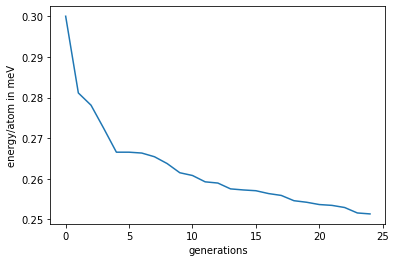

In [6]:
import matplotlib.pyplot as plt

plt.plot(range(25), lowest_energies)
plt.xlabel('generations')
plt.ylabel('energy/atom in meV')
plt.show()



In [ ]:
print(best_individual.getNumberOfHeteroatomicBonds('Ag', 'Cu'))